In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter
from scipy.signal import argrelextrema
from sklearn.metrics import mean_absolute_error

In [ ]:
%matplotlib inline

In [ ]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df =pd.read_pickle("../../data/interim/01_data_processed.pkl")

In [ ]:
df

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -1.041500 -0.076500 -0.048000  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -1.030333 -0.053333 -0.037000 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -1.031000 -0.082000 -0.060000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -1.025667 -0.044667 -0.038667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -1.034000 -0.059000 -0.044000  1.0980 -4.0240  0.9760   

                        participant  label category  set  
epoch (ms)                                                
2019-01-11 15:08:05.200           B  bench    heavy   30  
2019-01-11 15:08:05.400           B  bench    heavy   30  
2019-01-11 15:08:05.600           B  bench    heavy   30  
2019-01-11 15:08:05.800           B  bench    heavy   30  
2019-01-11 15:08:06.000           B  bench    heavy   30  
...                             ...    ...      ...  ...  
2019-01-20 17:33:27.000           E    row   medium   90  
2019-01-20 17:33:27.200           E    row   medium   90  
2019-01-20 17:33:27.400           E    row   medium   90  
2019-01-20 17:33:27.600           E    row   medium   90  
2019-01-20 17:33:27.800           E    row   medium   90  

[9009 rows x 10 columns]

In [ ]:
df[df["label"] != "rest"]

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -1.041500 -0.076500 -0.048000  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -1.030333 -0.053333 -0.037000 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -1.031000 -0.082000 -0.060000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -1.025667 -0.044667 -0.038667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -1.034000 -0.059000 -0.044000  1.0980 -4.0240  0.9760   

                        participant  label category  set  
epoch (ms)                                                
2019-01-11 15:08:05.200           B  bench    heavy   30  
2019-01-11 15:08:05.400           B  bench    heavy   30  
2019-01-11 15:08:05.600           B  bench    heavy   30  
2019-01-11 15:08:05.800           B  bench    heavy   30  
2019-01-11 15:08:06.000           B  bench    heavy   30  
...                             ...    ...      ...  ...  
2019-01-20 17:33:27.000           E    row   medium   90  
2019-01-20 17:33:27.200           E    row   medium   90  
2019-01-20 17:33:27.400           E    row   medium   90  
2019-01-20 17:33:27.600           E    row   medium   90  
2019-01-20 17:33:27.800           E    row   medium   90  

[7899 rows x 10 columns]

In [ ]:
df = df[df["label"] != "rest"]

In [ ]:
df

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -1.041500 -0.076500 -0.048000  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -1.030333 -0.053333 -0.037000 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -1.031000 -0.082000 -0.060000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -1.025667 -0.044667 -0.038667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -1.034000 -0.059000 -0.044000  1.0980 -4.0240  0.9760   

                        participant  label category  set  
epoch (ms)                                                
2019-01-11 15:08:05.200           B  bench    heavy   30  
2019-01-11 15:08:05.400           B  bench    heavy   30  
2019-01-11 15:08:05.600           B  bench    heavy   30  
2019-01-11 15:08:05.800           B  bench    heavy   30  
2019-01-11 15:08:06.000           B  bench    heavy   30  
...                             ...    ...      ...  ...  
2019-01-20 17:33:27.000           E    row   medium   90  
2019-01-20 17:33:27.200           E    row   medium   90  
2019-01-20 17:33:27.400           E    row   medium   90  
2019-01-20 17:33:27.600           E    row   medium   90  
2019-01-20 17:33:27.800           E    row   medium   90  

[7899 rows x 10 columns]

In [ ]:
acc_r = df["acc_x"] ** 2 + df["acc_y"] ** 2 + df["acc_z"] ** 2

In [ ]:
gyr_r = df["gyr_x"] ** 2 + df["gyr_y"] ** 2 + df["gyr_z"] ** 2

In [ ]:
df["acc_r"] = np.sqrt(acc_r)

In [ ]:
df["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
df["acc_r"]

epoch (ms)
2019-01-11 15:08:05.200    0.979669
2019-01-11 15:08:05.400    0.973752
2019-01-11 15:08:05.600    0.973795
2019-01-11 15:08:05.800    0.960118
2019-01-11 15:08:06.000    0.964953
                             ...   
2019-01-20 17:33:27.000    1.045408
2019-01-20 17:33:27.200    1.032376
2019-01-20 17:33:27.400    1.035995
2019-01-20 17:33:27.600    1.027367
2019-01-20 17:33:27.800    1.036616
Name: acc_r, Length: 7899, dtype: float64

In [ ]:
df["gyr_r"]

epoch (ms)
2019-01-11 15:08:05.200    3.225625
2019-01-11 15:08:05.400    2.887270
2019-01-11 15:08:05.600    2.936720
2019-01-11 15:08:05.800    9.473502
2019-01-11 15:08:06.000    4.623585
                             ...   
2019-01-20 17:33:27.000    5.804424
2019-01-20 17:33:27.200    3.611408
2019-01-20 17:33:27.400    5.869377
2019-01-20 17:33:27.600    1.173990
2019-01-20 17:33:27.800    4.283778
Name: gyr_r, Length: 7899, dtype: float64

In [ ]:
bench_df = df[df["label"] == "bench"]
squat_df = df[df["label"] == "squat"]
row_df = df[df["label"] == "row"]
ohp_df = df[df["label"] == "ohp"]
dead_df = df[df["label"] == "dead"]

In [ ]:
bench_df

acc_y     acc_z     acc_x     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.890400  2.439200   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.682600 -0.890400   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.560800 -0.256000   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.061000 -4.524400   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.439000 -1.548600   
...                           ...       ...       ...       ...       ...   
2019-01-19 17:24:41.800  1.026667 -0.096333  0.013000 -1.268400  2.841600   
2019-01-19 17:24:42.000  0.955000 -0.075000  0.017500  0.451200  0.024400   
2019-01-19 17:24:42.200  0.964000 -0.086333  0.023667  1.475600 -0.024200   
2019-01-19 17:24:42.400  0.989000 -0.097000  0.026000  2.756400 -3.121600   
2019-01-19 17:24:42.600  0.978000 -0.092500  0.025000  1.971333 -2.357667   

                          gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                   
2019-01-11 15:08:05.200  0.9388           B  bench    heavy   30  0.979669   
2019-01-11 15:08:05.400  2.1708           B  bench    heavy   30  0.973752   
2019-01-11 15:08:05.600 -1.4146           B  bench    heavy   30  0.973795   
2019-01-11 15:08:05.800 -2.0730           B  bench    heavy   30  0.960118   
2019-01-11 15:08:06.000 -3.6098           B  bench    heavy   30  0.964953   
...                         ...         ...    ...      ...  ...       ...   
2019-01-19 17:24:41.800  2.0610           E  bench   medium   71  1.031258   
2019-01-19 17:24:42.000  0.5242           E  bench   medium   71  0.958100   
2019-01-19 17:24:42.200  1.5974           E  bench   medium   71  0.968147   
2019-01-19 17:24:42.400 -0.8416           E  bench   medium   71  0.994086   
2019-01-19 17:24:42.600  1.8090           E  bench   medium   71  0.982683   

                            gyr_r  
epoch (ms)                         
2019-01-11 15:08:05.200  3.225625  
2019-01-11 15:08:05.400  2.887270  
2019-01-11 15:08:05.600  2.936720  
2019-01-11 15:08:05.800  9.473502  
2019-01-11 15:08:06.000  4.623585  
...                           ...  
2019-01-19 17:24:41.800  3.732459  
2019-01-19 17:24:42.000  0.692071  
2019-01-19 17:24:42.200  2.174780  
2019-01-19 17:24:42.400  4.248578  
2019-01-19 17:24:42.600  3.566122  

[1665 rows x 12 columns]

In [ ]:
squat_df

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 16:05:44.600  0.694667  0.735333  0.135333  2.5366 -0.6220  1.6098   
2019-01-11 16:05:44.800  0.651500  0.658000  0.097500  2.0854  0.0366  0.1952   
2019-01-11 16:05:45.000  0.719667  0.694333  0.148667 -0.0364  1.2562  0.0242   
2019-01-11 16:05:45.200  0.692000  0.632000  0.138000  5.9878 -4.5734  1.0976   
2019-01-11 16:05:45.400  0.716000  0.658000  0.131667 -4.1586 -2.9636 -0.5852   
...                           ...       ...       ...     ...     ...     ...   
2019-01-18 17:04:06.800  0.802333  0.541333  0.123000  3.9510 -1.1220  0.4634   
2019-01-18 17:04:07.000  0.812500  0.535000  0.118500 -3.4390 -0.8536  0.6222   
2019-01-18 17:04:07.200  0.801000  0.543333  0.116000 -1.3172 -0.7806  1.4754   
2019-01-18 17:04:07.400  0.801500  0.554000  0.117000  0.3658 -1.2802  1.2924   
2019-01-18 17:04:07.600  0.801500  0.547000  0.114500  1.8292 -1.5852  1.0610   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 16:05:44.600           A  squat   medium   27  1.020584  3.068009  
2019-01-11 16:05:44.800           A  squat   medium   27  0.931087  2.094835  
2019-01-11 16:05:45.000           A  squat   medium   27  1.011000  1.256960  
2019-01-11 16:05:45.200           A  squat   medium   27  0.947276  7.614096  
2019-01-11 16:05:45.400           A  squat   medium   27  0.981303  5.139975  
...                             ...    ...      ...  ...       ...       ...  
2019-01-18 17:04:06.800           D  squat    heavy   62  0.975659  4.133283  
2019-01-18 17:04:07.000           D  squat    heavy   62  0.980012  3.597567  
2019-01-18 17:04:07.200           D  squat    heavy   62  0.974817  2.126301  
2019-01-18 17:04:07.400           D  squat    heavy   62  0.981329  1.855538  
2019-01-18 17:04:07.600           D  squat    heavy   62  0.977099  2.642830  

[1610 rows x 12 columns]

In [ ]:
row_df

acc_y     acc_z     acc_x    gyr_x   gyr_y  \
epoch (ms)                                                               
2019-01-14 14:01:40.000 -0.854000  0.271000 -0.037000 -31.8172 -1.6830   
2019-01-14 14:01:40.200 -0.884000  0.174000 -0.042500 -56.3416 -8.3172   
2019-01-14 14:01:40.400 -0.967667  0.030333 -0.008333 -31.4388 -3.0732   
2019-01-14 14:01:40.600 -1.046500 -0.042500 -0.018500  -4.5244 -4.9632   
2019-01-14 14:01:40.800 -1.098667 -0.062333 -0.031000   7.7318  1.9634   
...                           ...       ...       ...      ...     ...   
2019-01-20 17:33:27.000 -1.041500 -0.076500 -0.048000   1.4146 -5.6218   
2019-01-20 17:33:27.200 -1.030333 -0.053333 -0.037000  -2.7684 -0.5854   
2019-01-20 17:33:27.400 -1.031000 -0.082000 -0.060000   2.8416 -5.1342   
2019-01-20 17:33:27.600 -1.025667 -0.044667 -0.038667  -0.2318  0.2562   
2019-01-20 17:33:27.800 -1.034000 -0.059000 -0.044000   1.0980 -4.0240   

                          gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                  
2019-01-14 14:01:40.000 -6.3660           C   row   medium   51  0.896731   
2019-01-14 14:01:40.200 -9.9388           C   row   medium   51  0.901964   
2019-01-14 14:01:40.400  0.9266           C   row   medium   51  0.968178   
2019-01-14 14:01:40.600  1.3536           C   row   medium   51  1.047526   
2019-01-14 14:01:40.800  4.4878           C   row   medium   51  1.100870   
...                         ...         ...   ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.2926           E   row   medium   90  1.045408   
2019-01-20 17:33:27.200  2.2440           E   row   medium   90  1.032376   
2019-01-20 17:33:27.400 -0.1220           E   row   medium   90  1.035995   
2019-01-20 17:33:27.600  1.1220           E   row   medium   90  1.027367   
2019-01-20 17:33:27.800  0.9760           E   row   medium   90  1.036616   

                             gyr_r  
epoch (ms)                          
2019-01-14 14:01:40.000  32.491424  
2019-01-14 14:01:40.200  57.812900  
2019-01-14 14:01:40.400  31.602236  
2019-01-14 14:01:40.600   6.850969  
2019-01-14 14:01:40.800   9.152924  
...                            ...  
2019-01-20 17:33:27.000   5.804424  
2019-01-20 17:33:27.200   3.611408  
2019-01-20 17:33:27.400   5.869377  
2019-01-20 17:33:27.600   1.173990  
2019-01-20 17:33:27.800   4.283778  

[1417 rows x 12 columns]

In [ ]:
ohp_df

acc_y     acc_z     acc_x    gyr_x    gyr_y  \
epoch (ms)                                                                
2019-01-11 15:38:55.000  0.901000  0.047000 -0.062500   0.4390  -6.5000   
2019-01-11 15:38:55.200  1.080667  0.060333 -0.080667   5.5976  -3.2196   
2019-01-11 15:38:55.400  1.314000  0.024000 -0.137500  20.8534   7.7562   
2019-01-11 15:38:55.600  0.910333 -0.007000 -0.234667  17.7684  11.4880   
2019-01-11 15:38:55.800  0.861000 -0.095500 -0.337000   2.3778   2.2682   
...                           ...       ...       ...      ...      ...   
2019-01-15 13:55:56.600  1.206667 -0.129333 -0.218667 -32.1462 -11.7194   
2019-01-15 13:55:56.800  1.135500 -0.097000 -0.095500  27.0488  -2.8536   
2019-01-15 13:55:57.000  0.944000 -0.114000 -0.122667 -15.6584  -3.2318   
2019-01-15 13:55:57.200  0.973000 -0.066000 -0.114500  -7.3414  -0.7194   
2019-01-15 13:55:57.400  0.963667 -0.037000 -0.134000  -3.1344   1.3048   

                           gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                   
2019-01-11 15:38:55.000  -0.0854           A   ohp    heavy    9  0.904387   
2019-01-11 15:38:55.200  -1.4266           A   ohp    heavy    9  1.085351   
2019-01-11 15:38:55.400 -44.1340           A   ohp    heavy    9  1.321393   
2019-01-11 15:38:55.600 -35.0002           A   ohp    heavy    9  0.940119   
2019-01-11 15:38:55.800  -4.6220           A   ohp    heavy    9  0.929522   
...                          ...         ...   ...      ...  ...       ...   
2019-01-15 13:55:56.600  35.2438           E   ohp    heavy   78  1.233121   
2019-01-15 13:55:56.800  -0.0976           E   ohp    heavy   78  1.143630   
2019-01-15 13:55:57.000  -4.2560           E   ohp    heavy   78  0.958738   
2019-01-15 13:55:57.200  -4.2196           E   ohp    heavy   78  0.981934   
2019-01-15 13:55:57.400   0.1706           E   ohp    heavy   78  0.973642   

                             gyr_r  
epoch (ms)                          
2019-01-11 15:38:55.000   6.515368  
2019-01-11 15:38:55.200   6.613179  
2019-01-11 15:38:55.400  49.425023  
2019-01-11 15:38:55.600  40.898706  
2019-01-11 15:38:55.800   5.671115  
...                            ...  
2019-01-15 13:55:56.600  49.120749  
2019-01-15 13:55:56.800  27.199083  
2019-01-15 13:55:57.000  16.545197  
2019-01-15 13:55:57.200   8.498159  
2019-01-15 13:55:57.400   3.399422  

[1676 rows x 12 columns]

In [ ]:
dead_df

acc_y     acc_z     acc_x      gyr_x    gyr_y  \
epoch (ms)                                                                  
2019-01-11 16:24:24.800 -1.027000 -0.165500  0.056500   3.231667  -2.6830   
2019-01-11 16:24:25.000 -1.025000 -0.155333  0.073333  12.853600 -30.9024   
2019-01-11 16:24:25.200 -1.022000 -0.125500  0.059000   2.073200  -1.2316   
2019-01-11 16:24:25.400 -1.031667 -0.114667  0.030667  -0.329600   3.1098   
2019-01-11 16:24:25.600 -1.025500 -0.124500  0.046500  -0.975600   9.7682   
...                           ...       ...       ...        ...      ...   
2019-01-16 19:35:42.800 -1.083000 -0.164500  0.015000  -0.341600  -6.3658   
2019-01-16 19:35:43.000 -1.308000 -0.209333 -0.007000   4.939000  31.2440   
2019-01-16 19:35:43.200 -1.003000 -0.113500  0.161500  -4.427000   7.7680   
2019-01-16 19:35:43.400 -1.001333 -0.138667  0.040667   3.256000   3.8050   
2019-01-16 19:35:43.600 -1.046000 -0.148000 -0.018000   3.658750   1.4635   

                             gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                     
2019-01-11 16:24:24.800   2.418667           A  dead   medium    6  1.041783   
2019-01-11 16:24:25.000   4.487800           A  dead   medium    6  1.039294   
2019-01-11 16:24:25.200   3.170800           A  dead   medium    6  1.031366   
2019-01-11 16:24:25.400   1.817000           A  dead   medium    6  1.038472   
2019-01-11 16:24:25.600  -2.219400           A  dead   medium    6  1.034076   
...                            ...         ...   ...      ...  ...       ...   
2019-01-16 19:35:42.800   2.390200           E  dead    heavy   72  1.095525   
2019-01-16 19:35:43.000 -21.219400           E  dead    heavy   72  1.324664   
2019-01-16 19:35:43.200  12.585400           E  dead    heavy   72  1.022239   
2019-01-16 19:35:43.400  17.926600           E  dead    heavy   72  1.011707   
2019-01-16 19:35:43.600  11.158500           E  dead    heavy   72  1.056572   

                             gyr_r  
epoch (ms)                          
2019-01-11 16:24:24.800   4.846866  
2019-01-11 16:24:25.000  33.768531  
2019-01-11 16:24:25.200   3.983588  
2019-01-11 16:24:25.400   3.616764  
2019-01-11 16:24:25.600  10.064555  
...                            ...  
2019-01-16 19:35:42.800   6.808315  
2019-01-16 19:35:43.000  38.089949  
2019-01-16 19:35:43.200  15.438020  
2019-01-16 19:35:43.400  18.612967  
2019-01-16 19:35:43.600  11.833867  

[1531 rows x 12 columns]

<AxesSubplot: xlabel='epoch (ms)'>

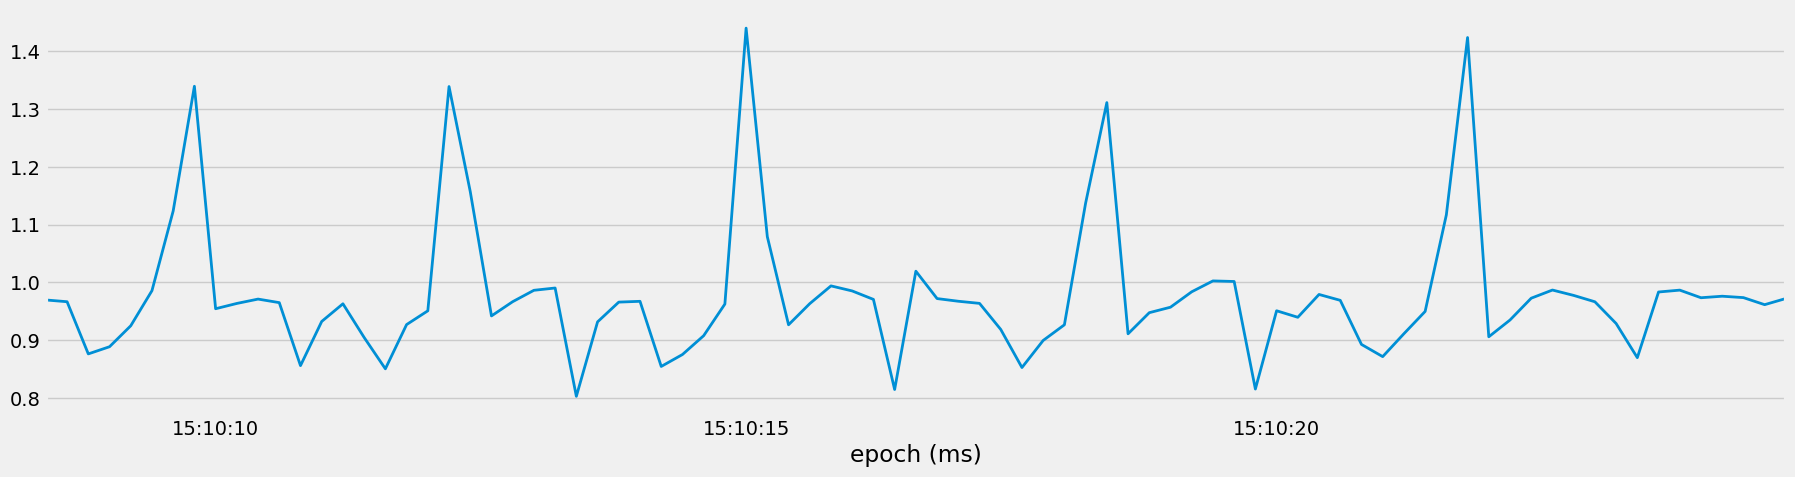

In [ ]:
df[df["set"] == 1]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

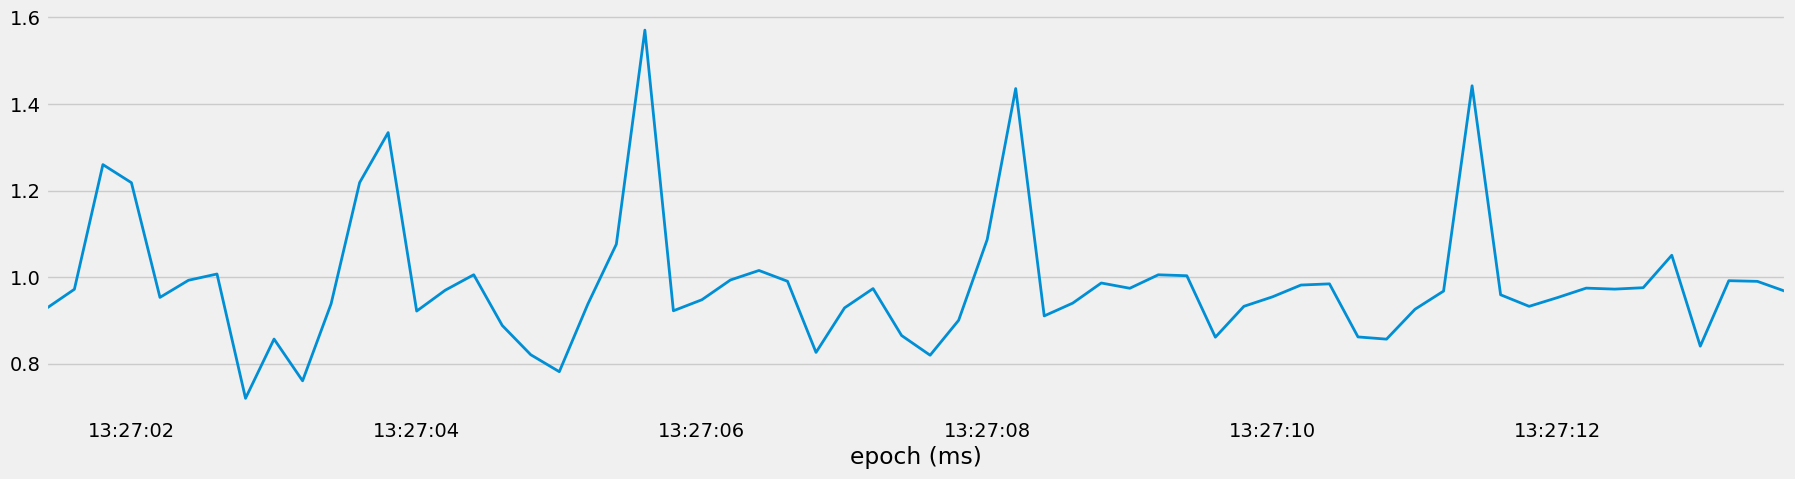

In [ ]:
df[df["set"] == 2]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

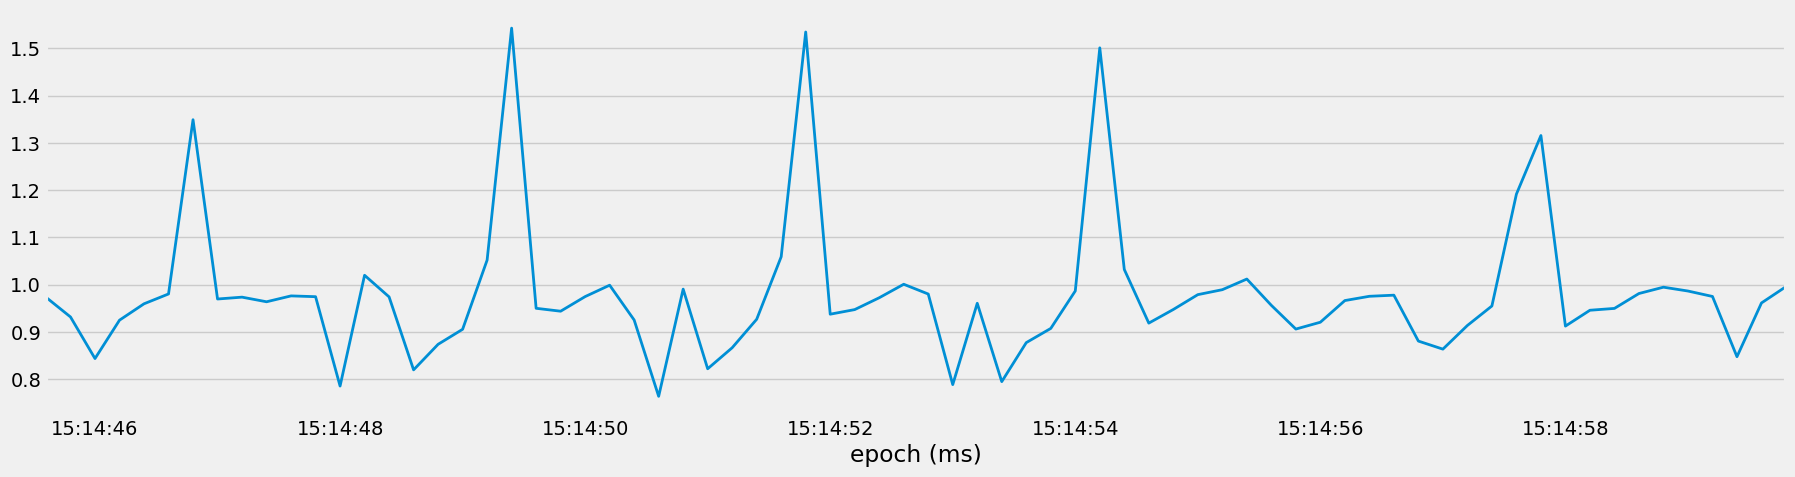

In [ ]:
df[df["set"] == 3]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

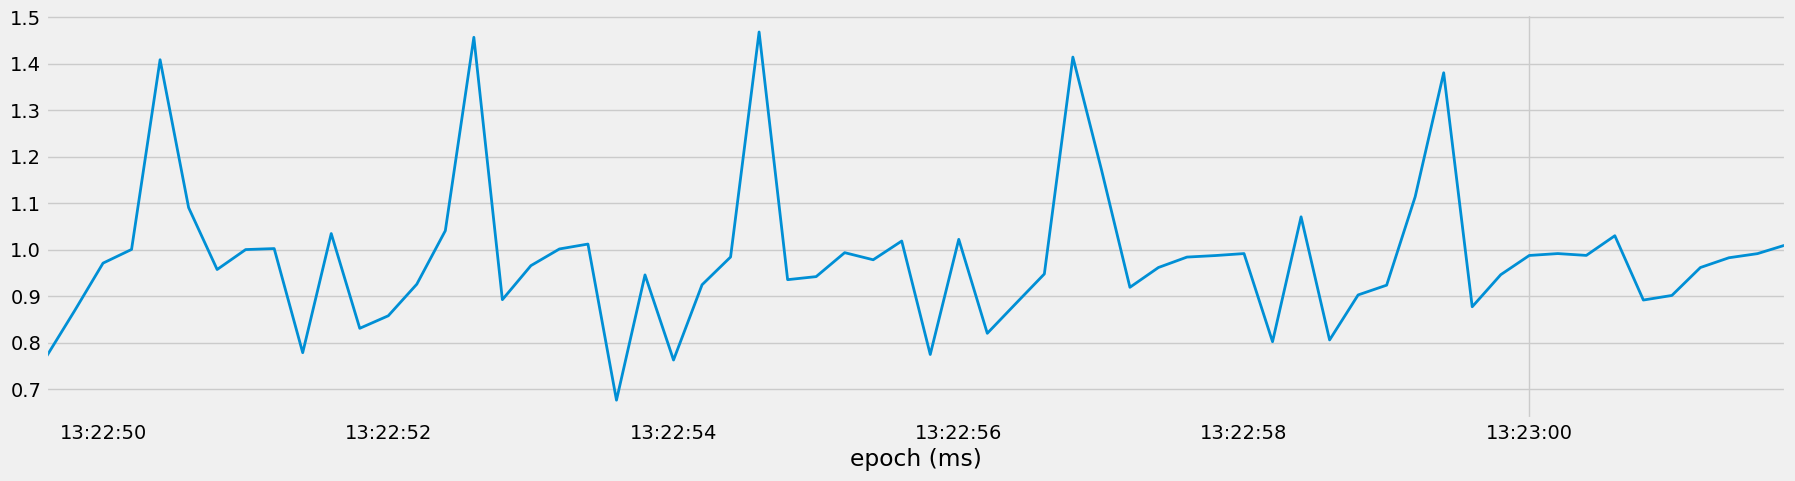

In [ ]:
df[df["set"] == 4]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

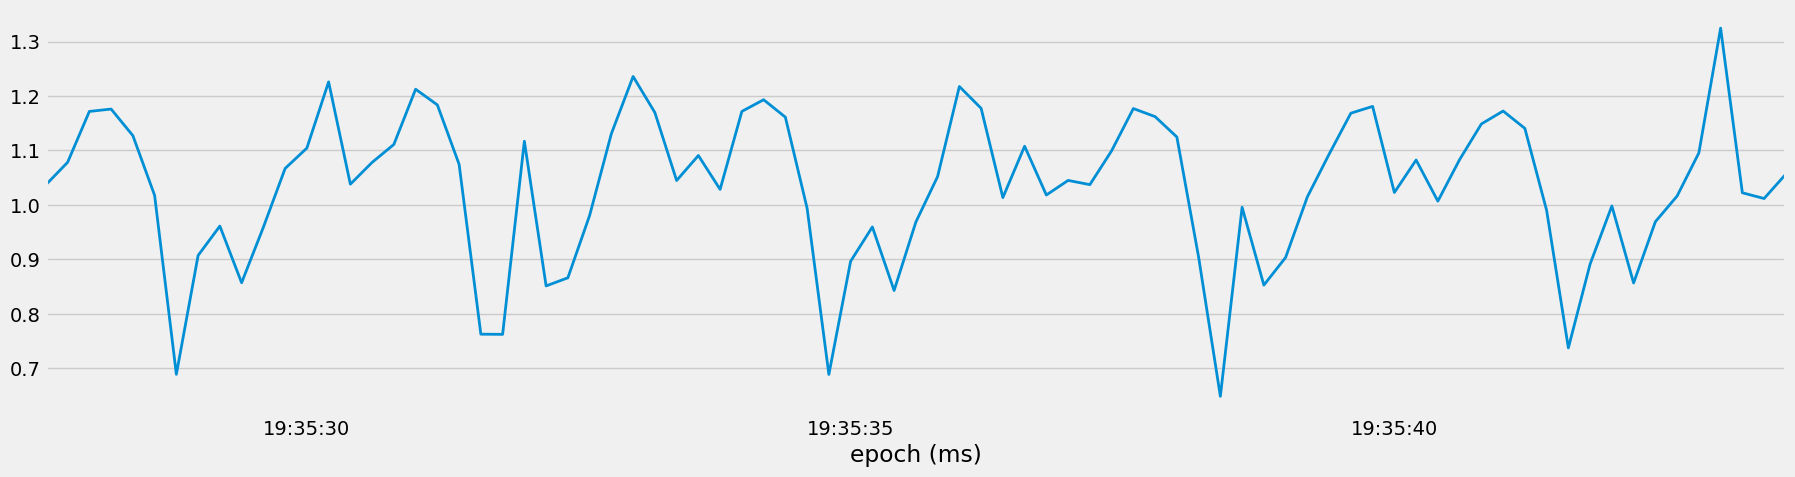

In [ ]:
df[df["set"] == 5]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

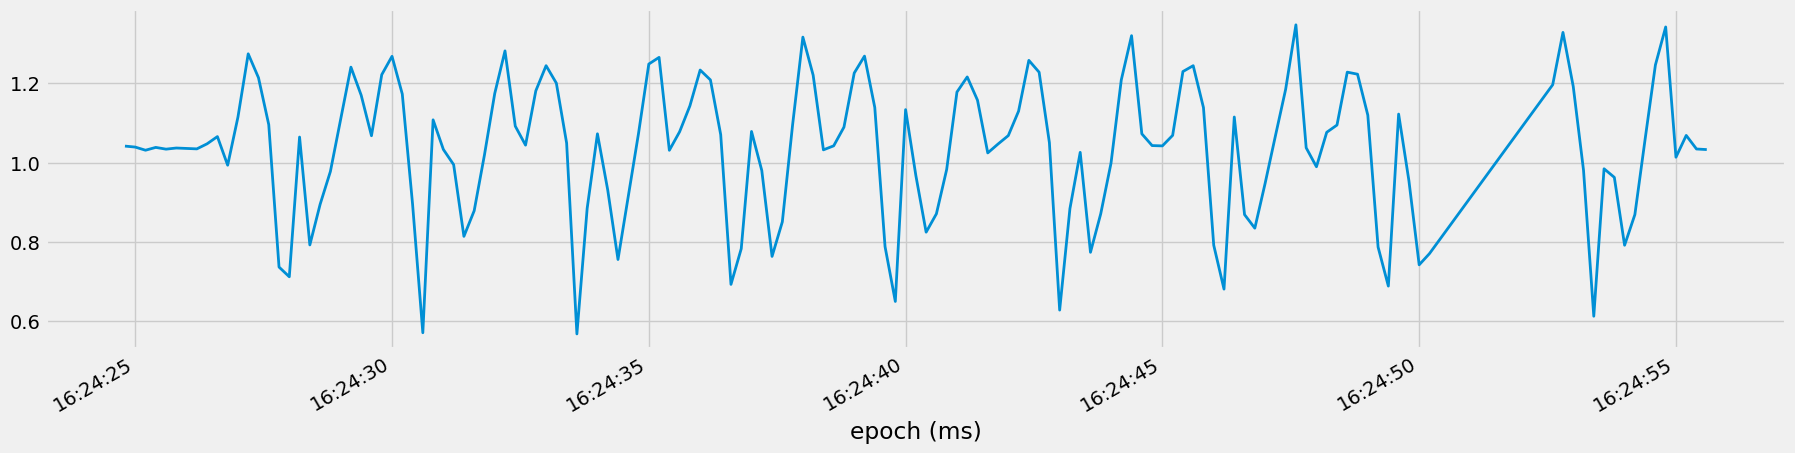

In [ ]:
df[df["set"] == 6]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

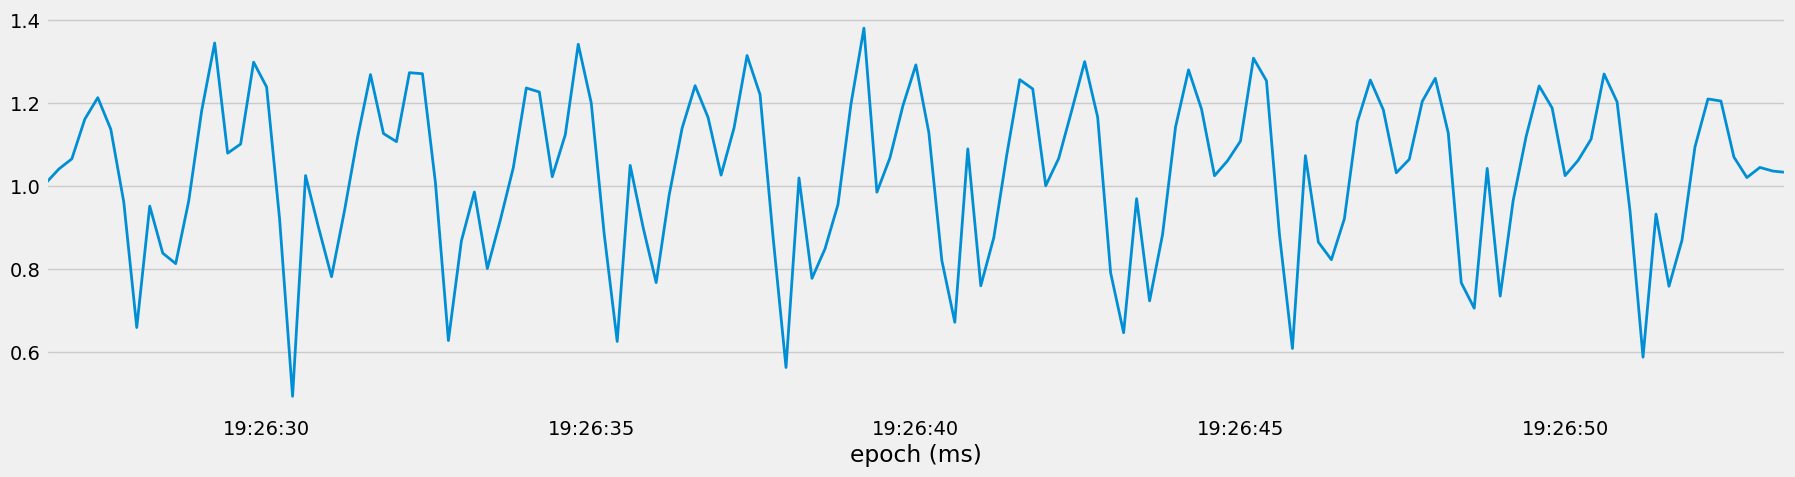

In [ ]:
df[df["set"] == 7]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

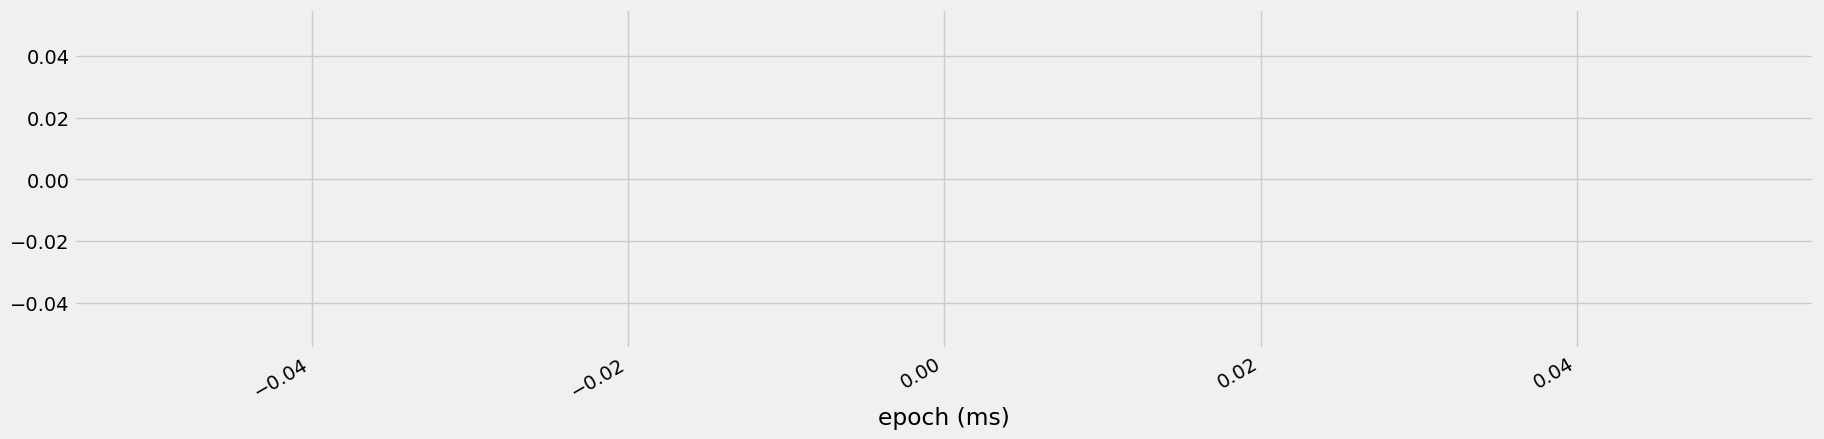

In [ ]:
df[df["set"] == 100]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

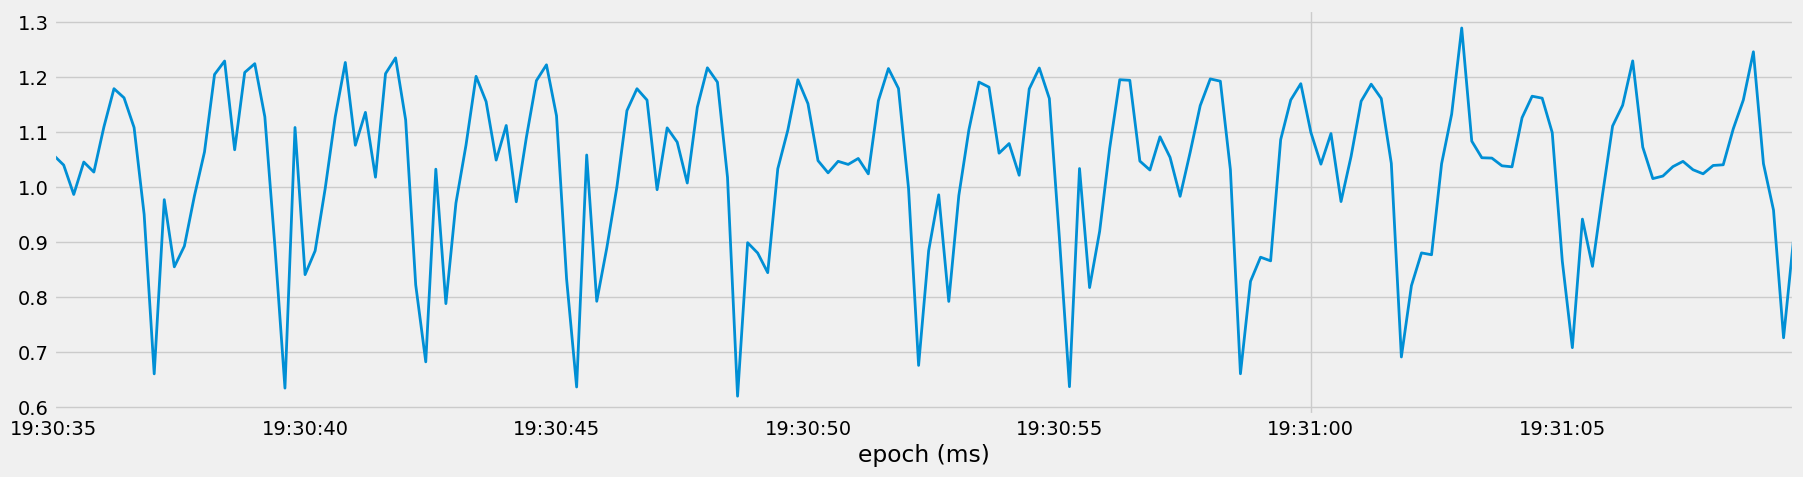

In [ ]:
df[df["set"] == 8]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

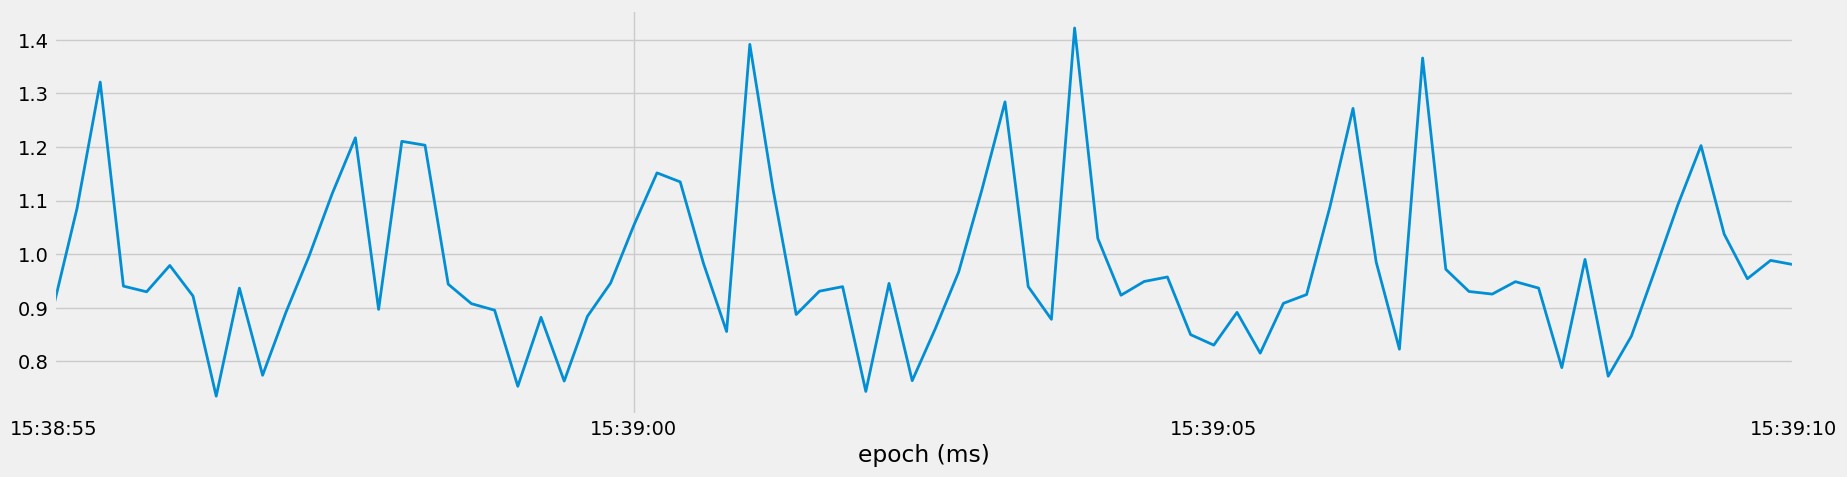

In [ ]:
df[df["set"] == 9]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

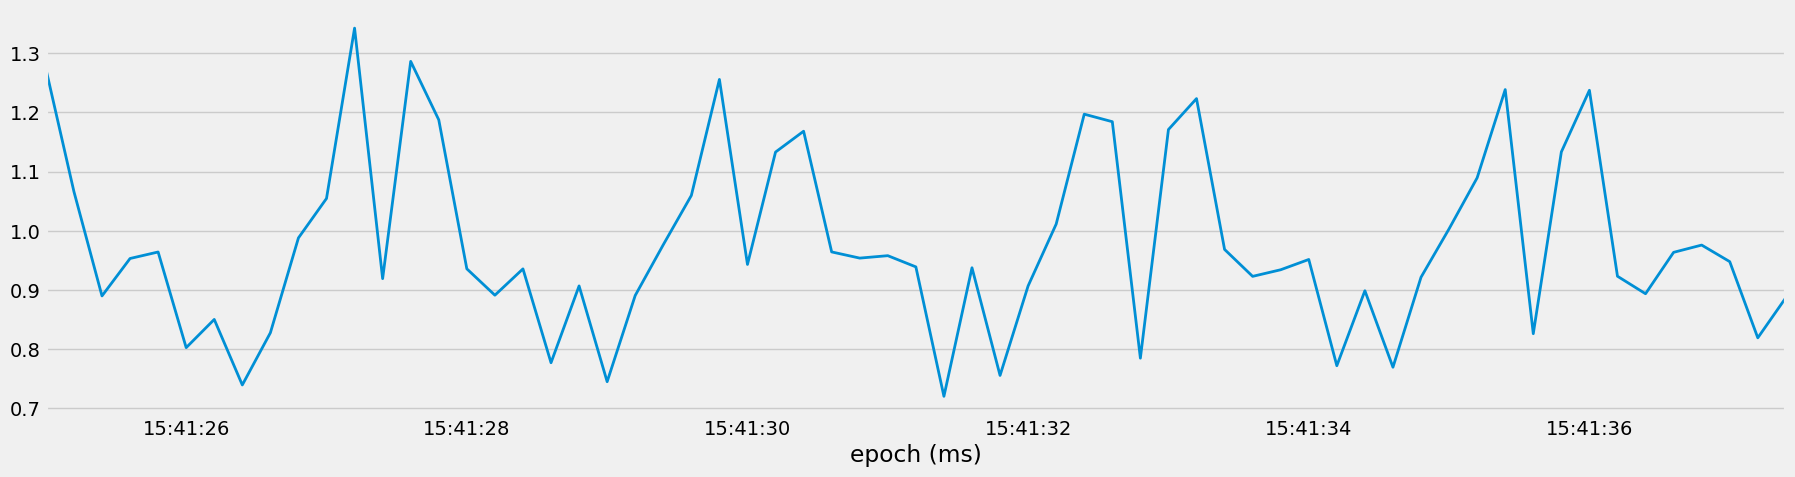

In [ ]:
df[df["set"] == 10]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

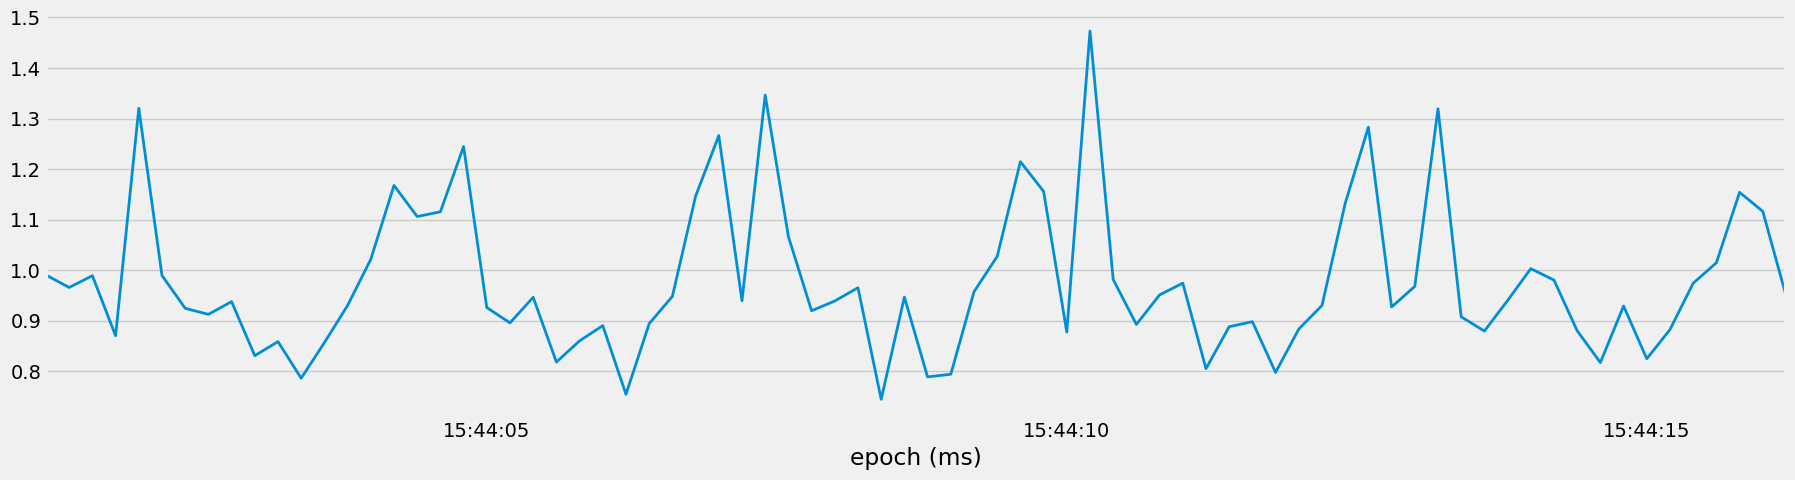

In [ ]:
df[df["set"] == 11]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

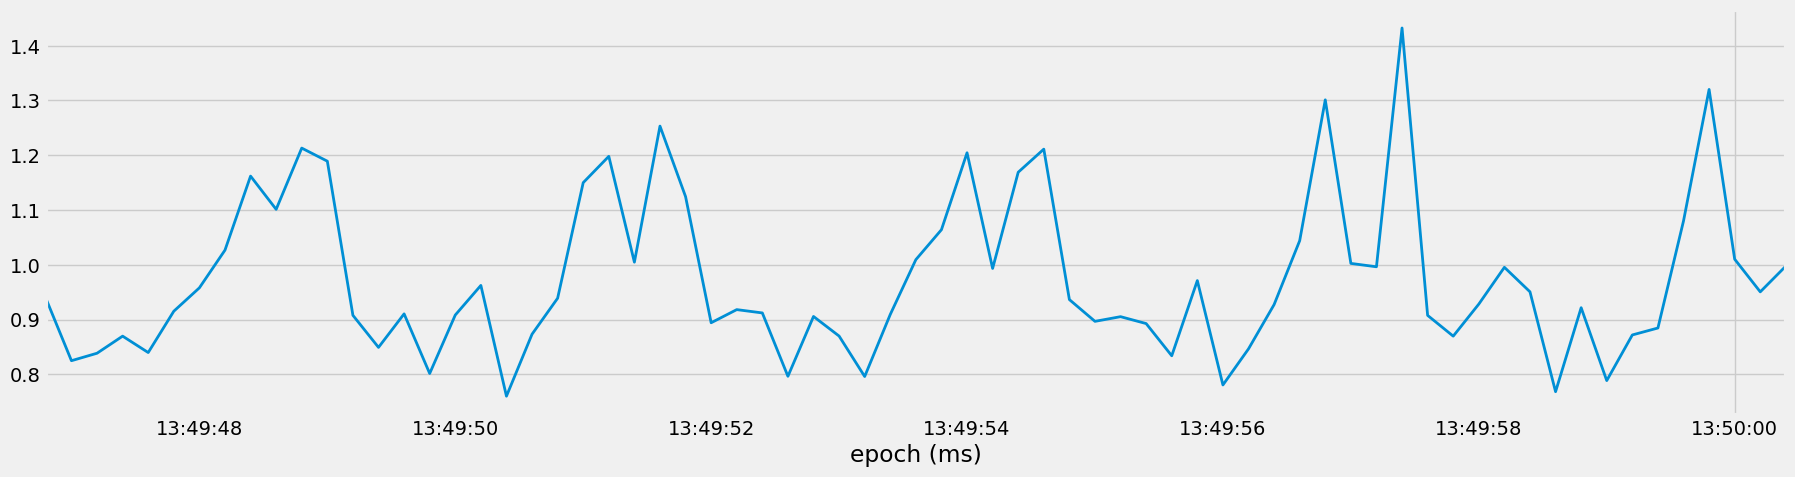

In [ ]:
df[df["set"] == 12]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

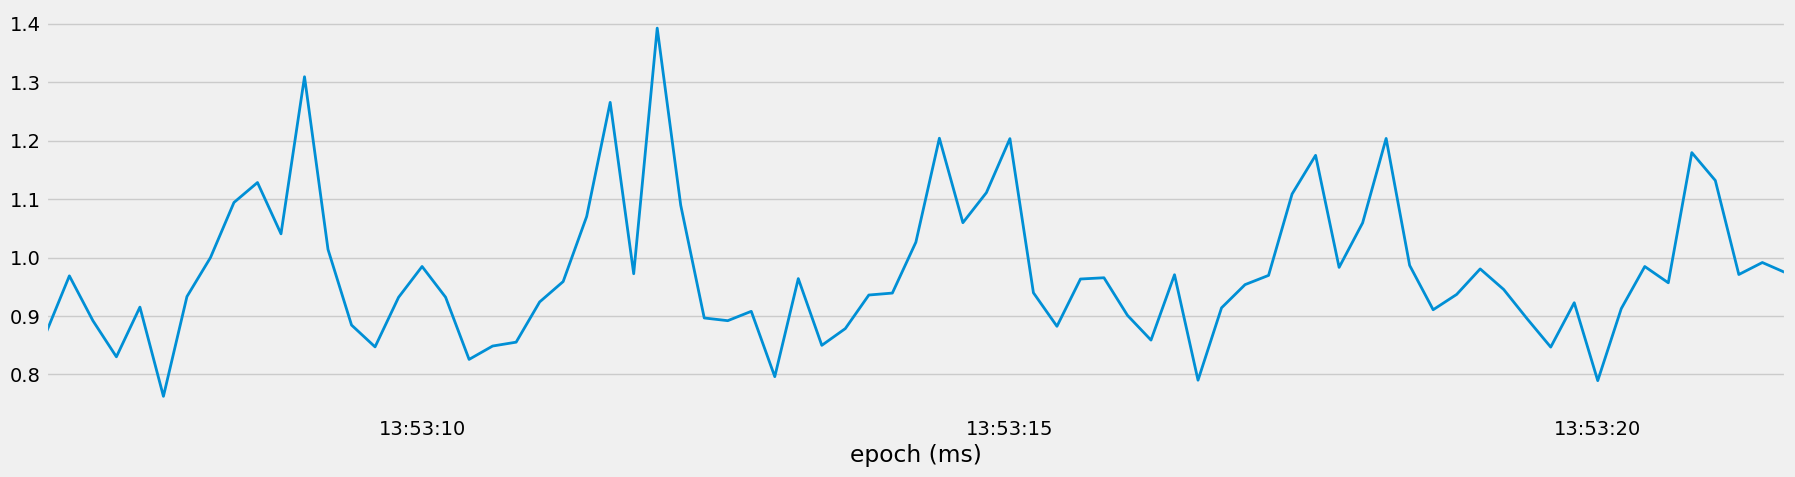

In [ ]:
df[df["set"] == 13]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

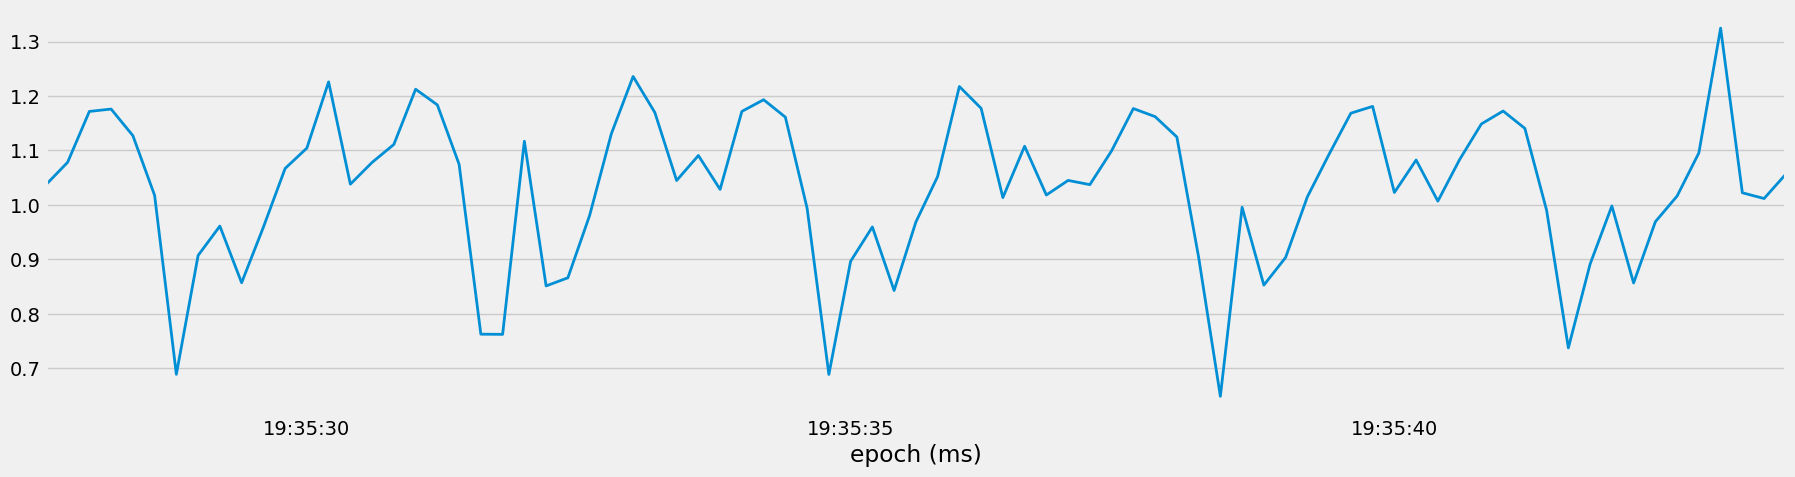

In [ ]:
df[df["set"] == 5]["acc_r"].plot()

In [ ]:
plot_df = bench_df

In [ ]:
plot_df["set"].unique()

array([30,  1, 31,  3, 65, 67,  4,  2, 39, 40, 41, 68, 66, 56, 57, 58, 69,
       70, 71])

In [ ]:
plot_df["set"].unique()[0]

30

<AxesSubplot: xlabel='epoch (ms)'>

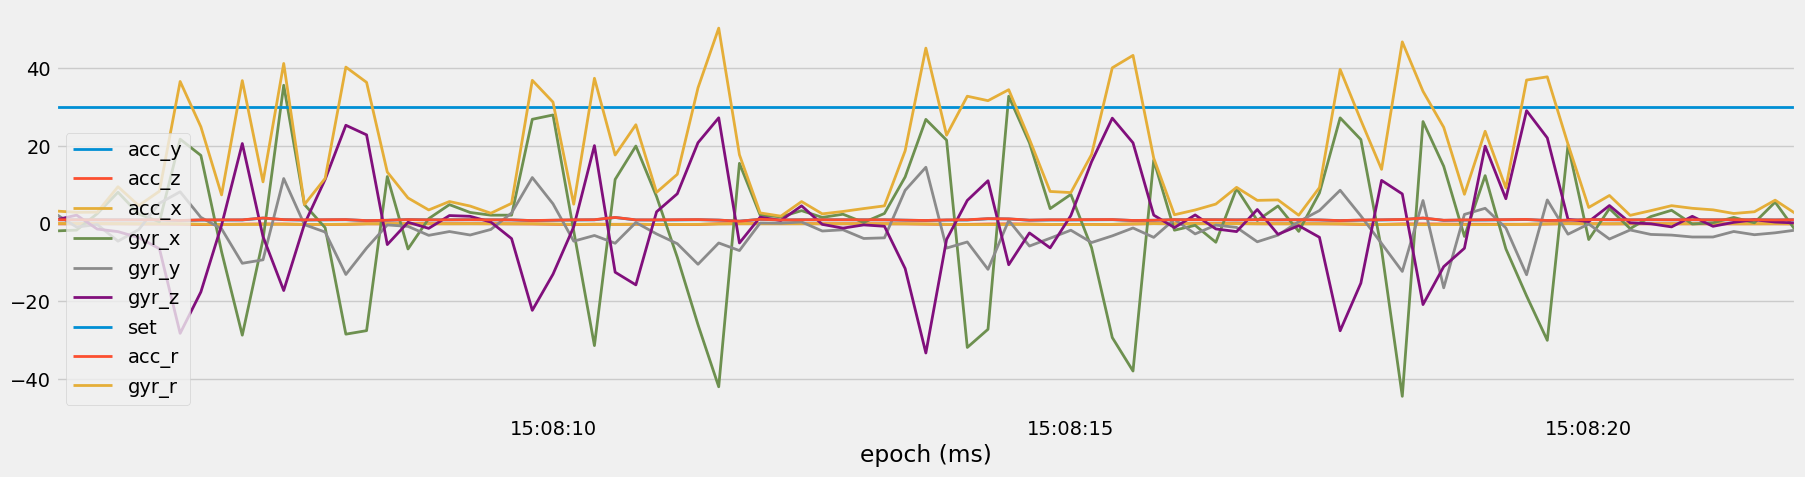

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]].plot()

<AxesSubplot: xlabel='epoch (ms)'>

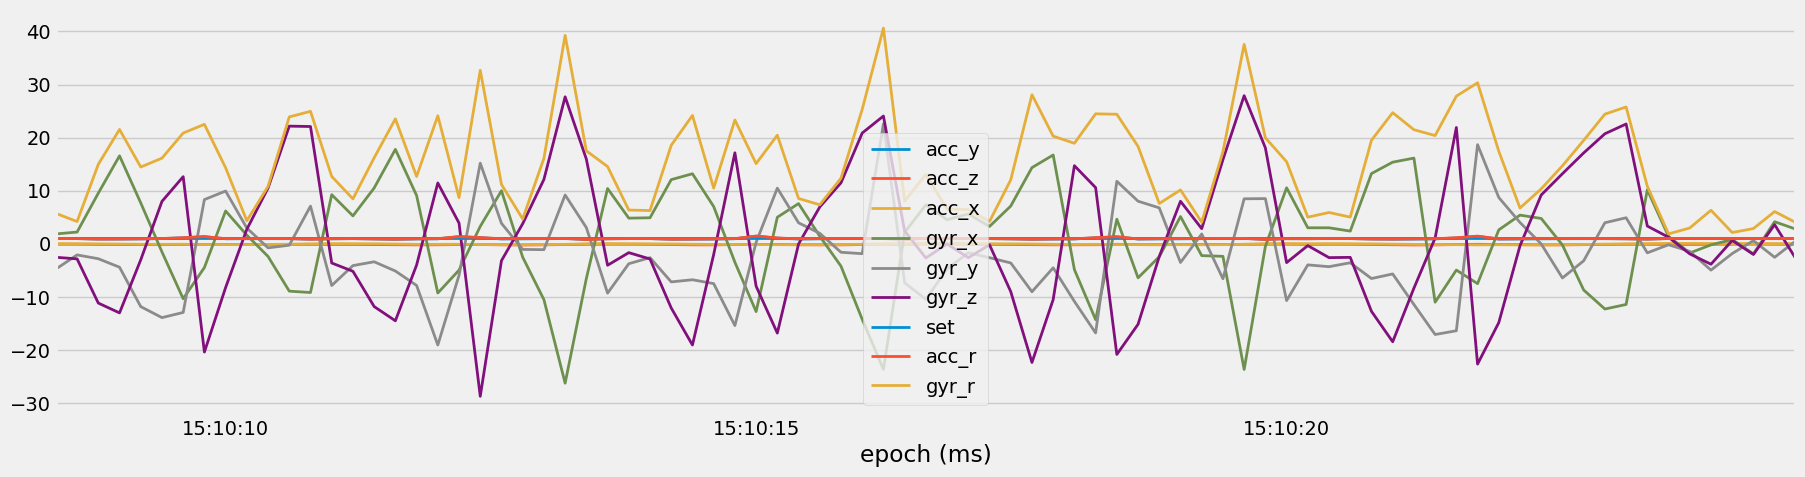

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[1]].plot()

<AxesSubplot: xlabel='epoch (ms)'>

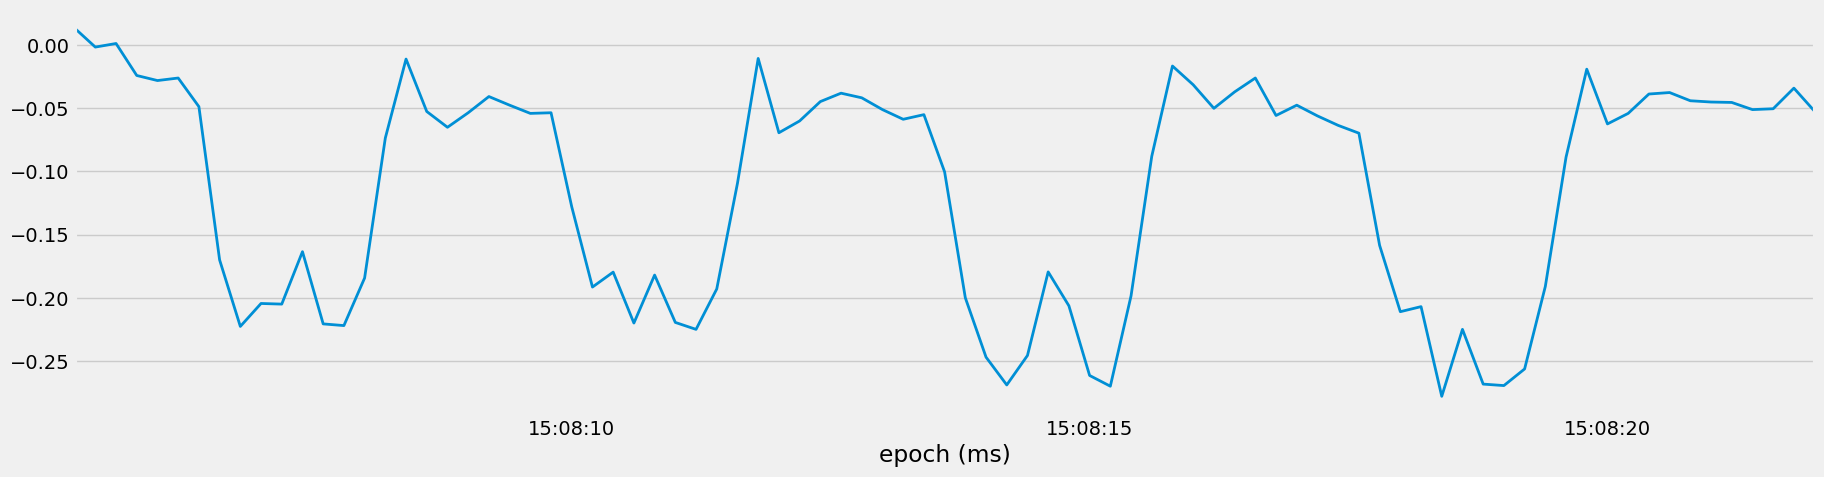

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

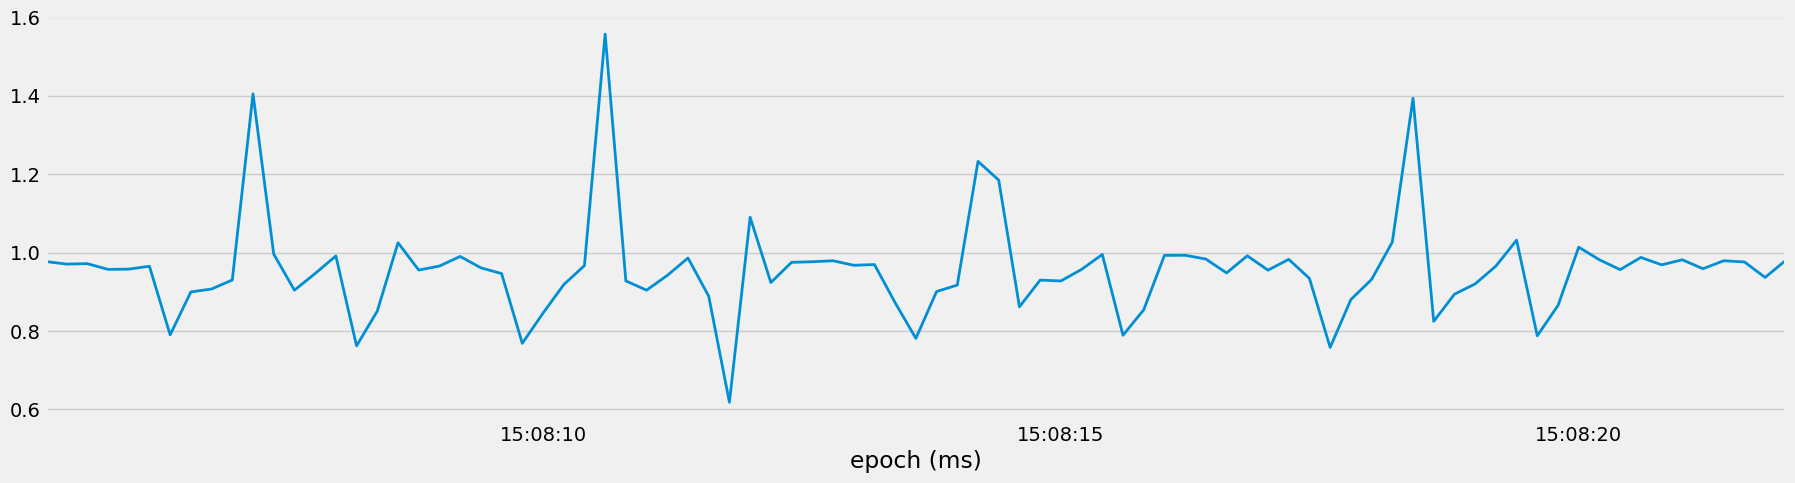

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

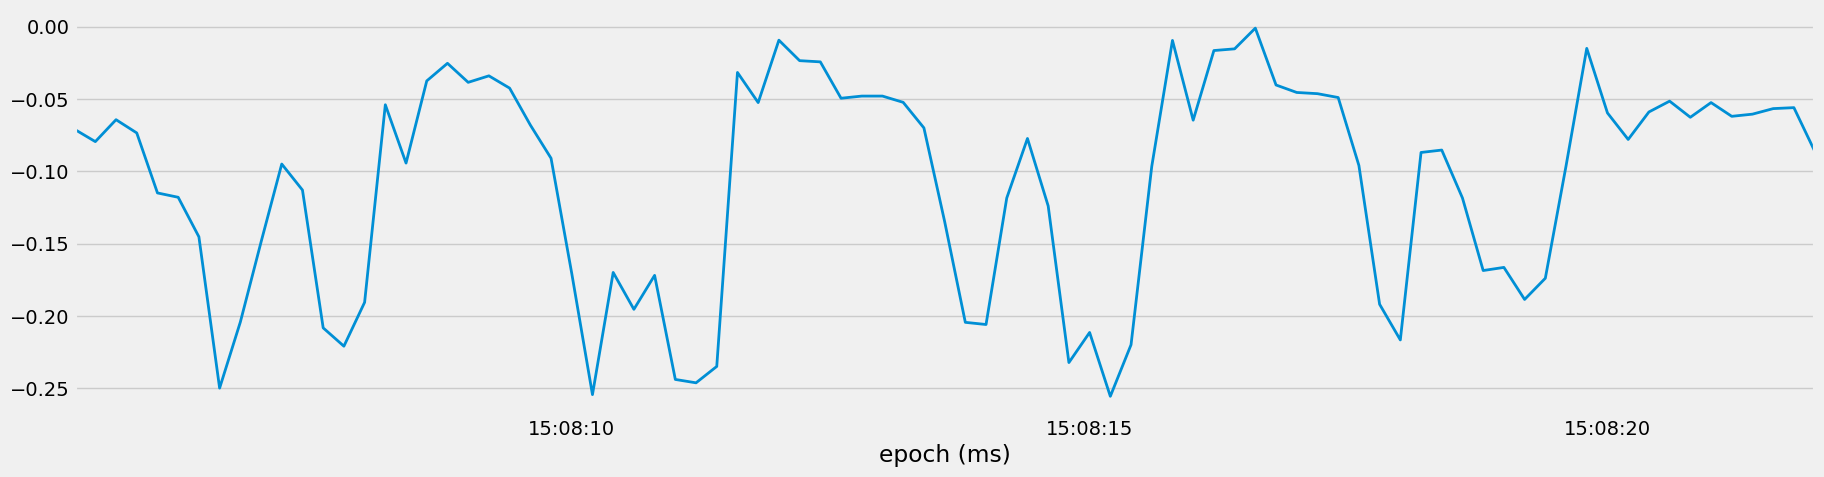

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

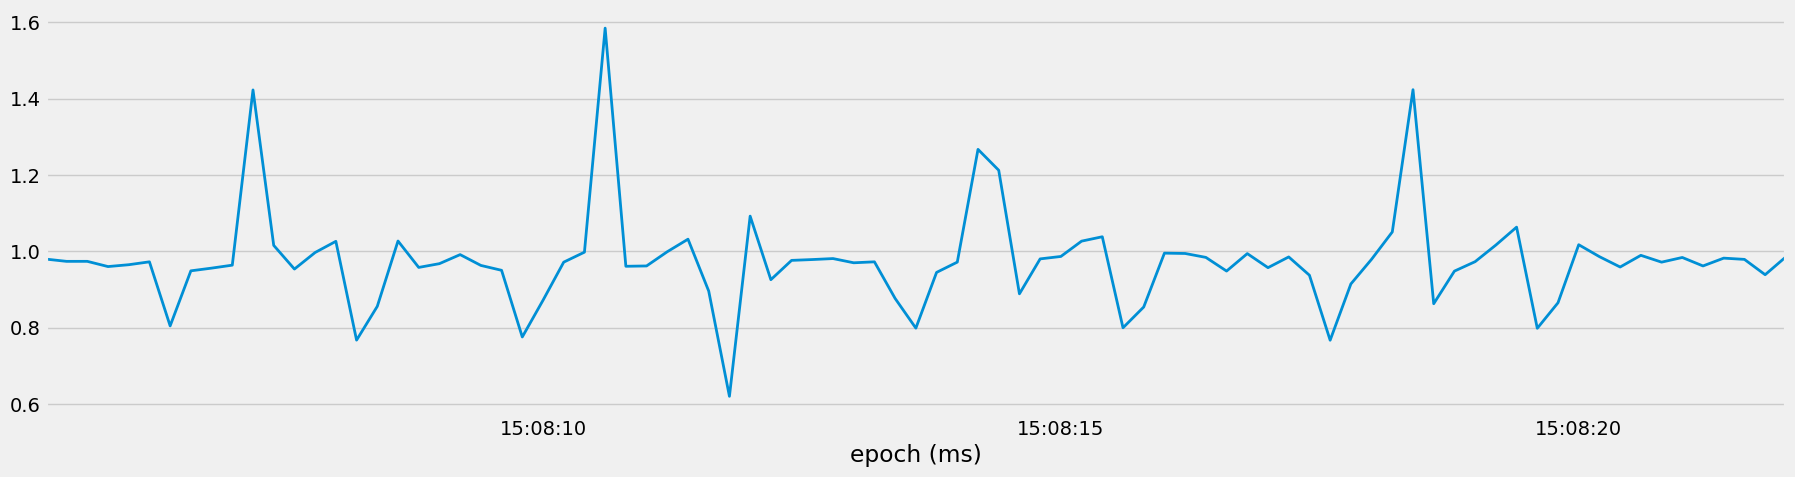

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200  0.958667 -0.062000 -0.045333  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400  0.979000 -0.060500 -0.051000  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600  0.976000 -0.056667 -0.050333  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800  0.936500 -0.056000 -0.034000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000  0.980333 -0.086000 -0.052333 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625  
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270  
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720  
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502  
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585  
...                             ...    ...      ...  ...       ...       ...  
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012  
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911  
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609  
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949  
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656  

[85 rows x 12 columns]

<AxesSubplot: xlabel='epoch (ms)'>

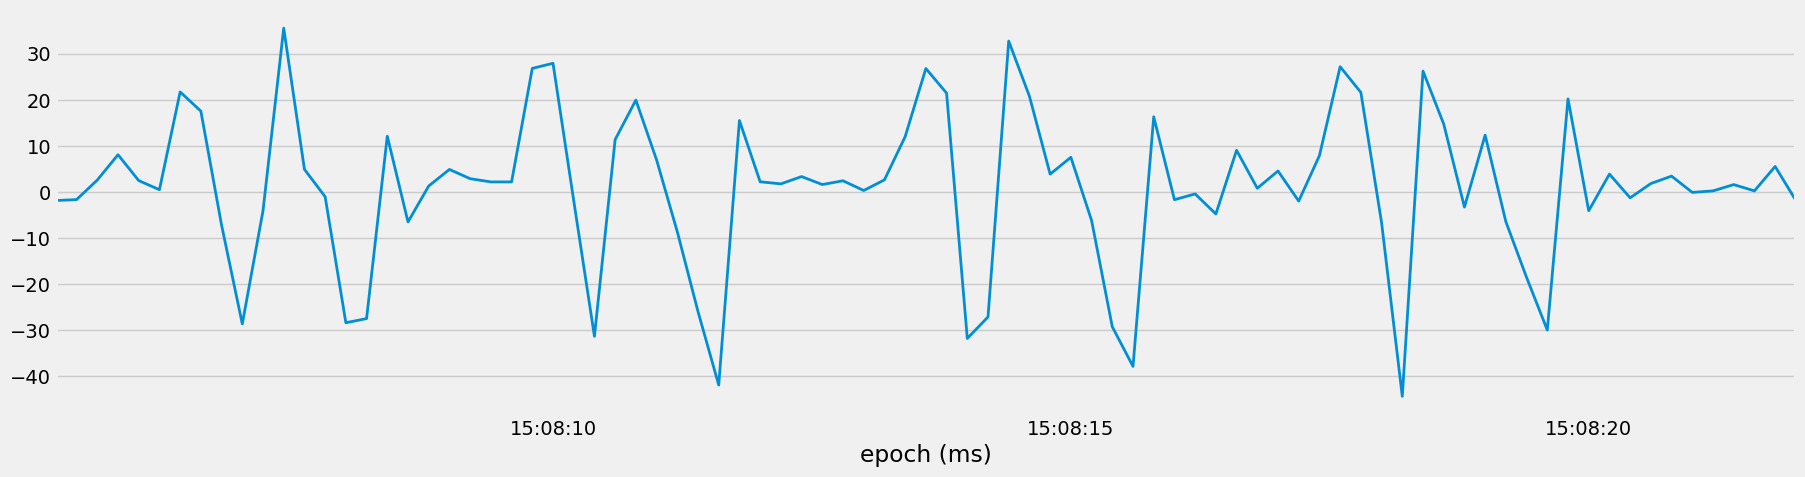

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_x"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

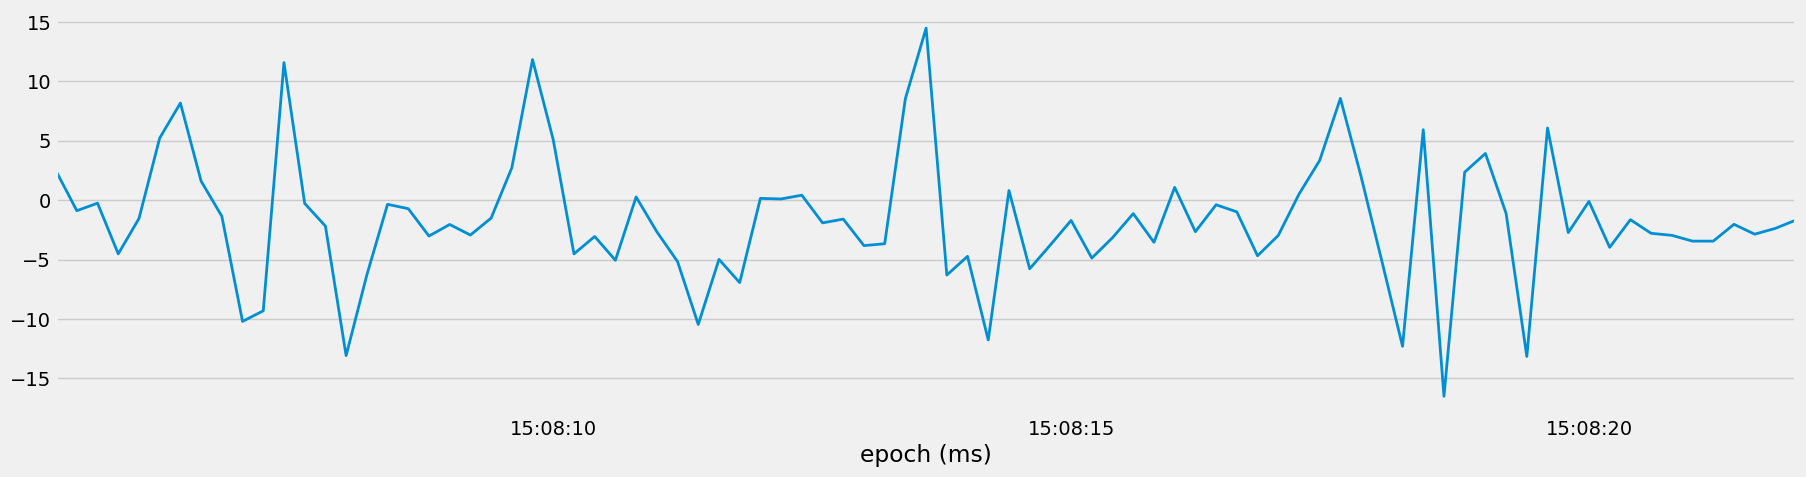

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_y"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

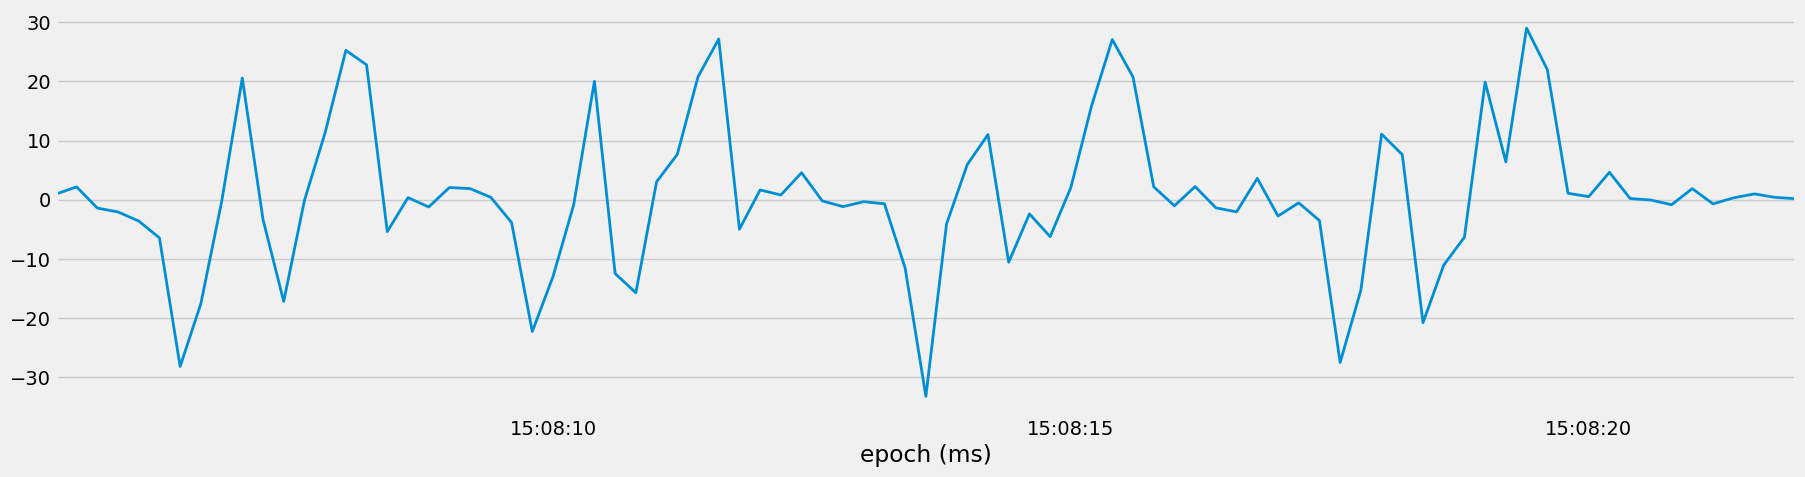

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_z"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

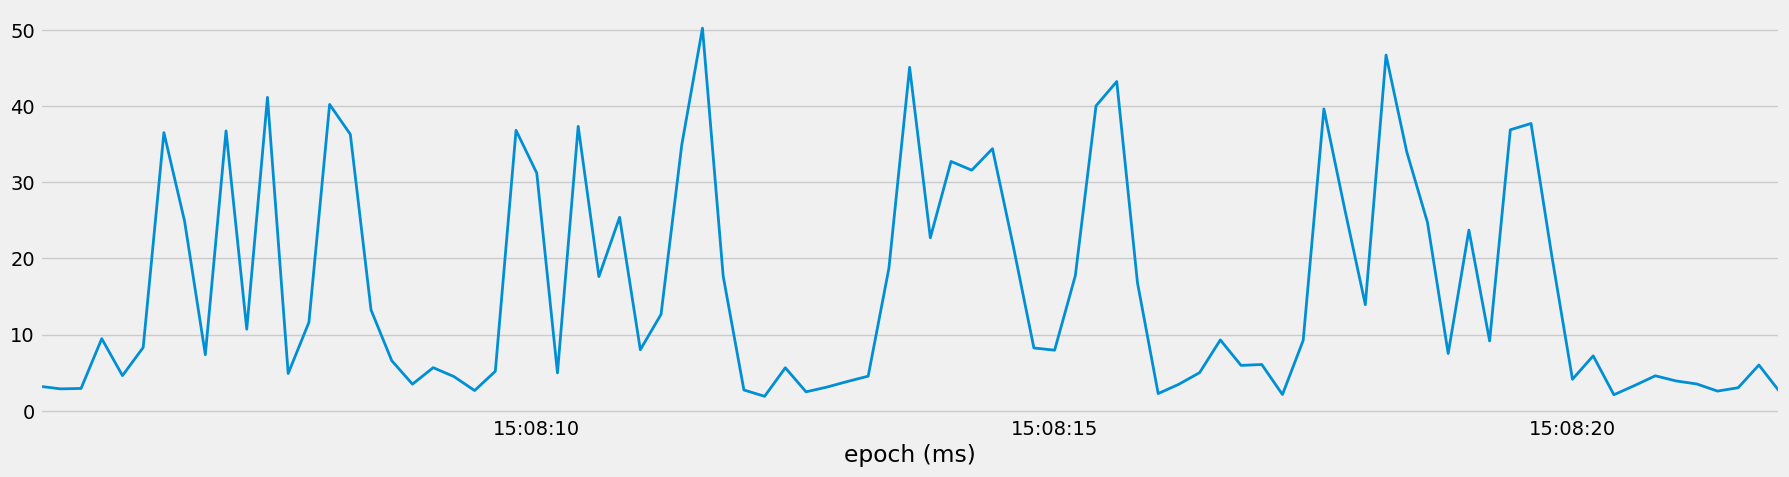

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_r"].plot()

In [ ]:
# Better to look at the Acceleration data for the Bench-press

In [ ]:
plot_df = squat_df

<AxesSubplot: xlabel='epoch (ms)'>

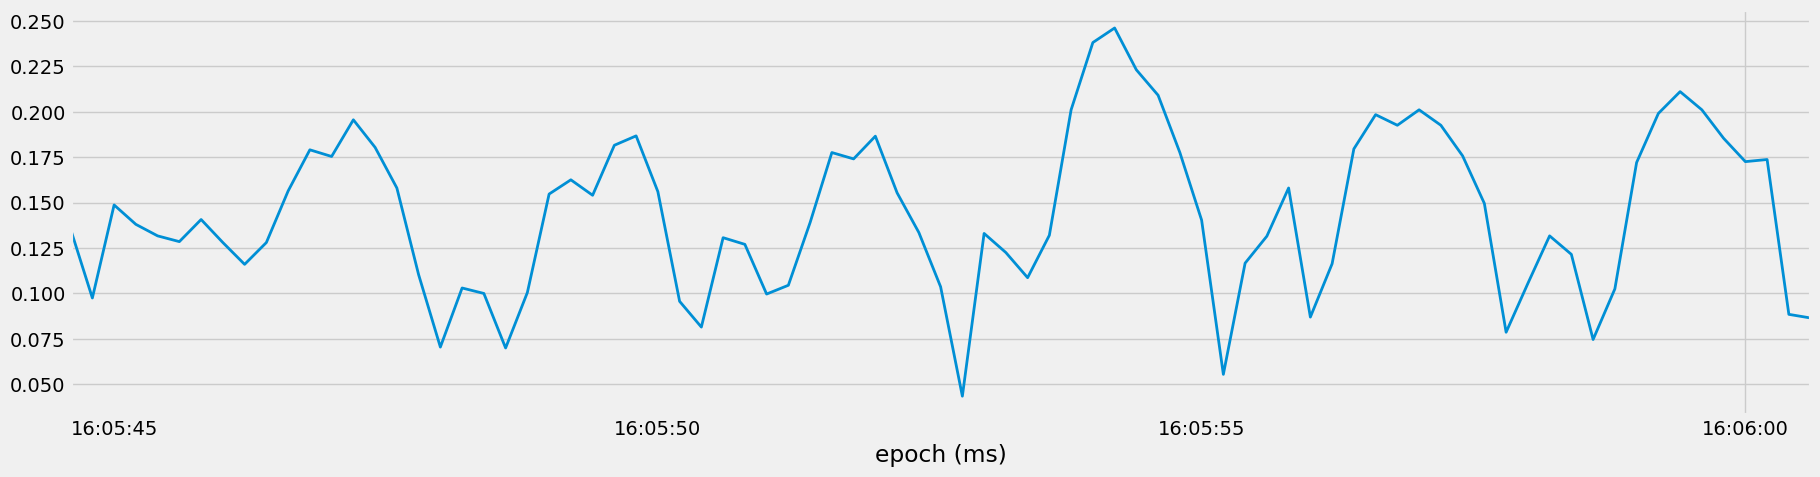

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

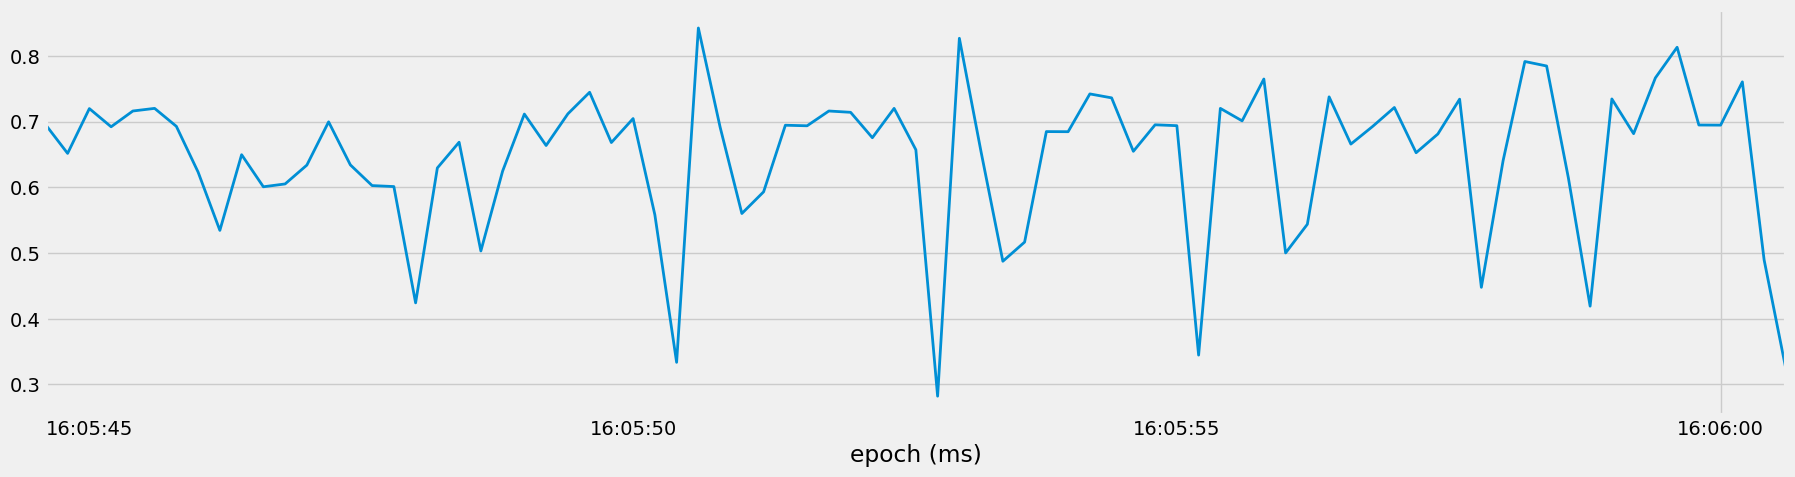

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

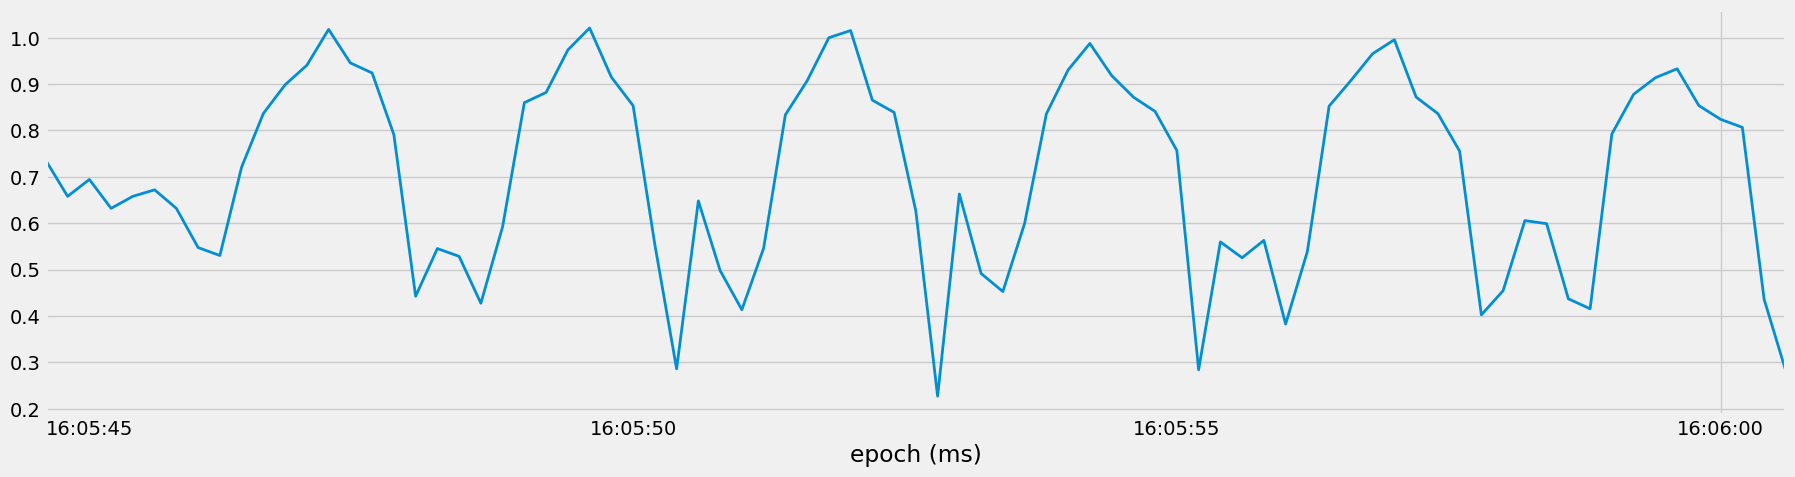

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

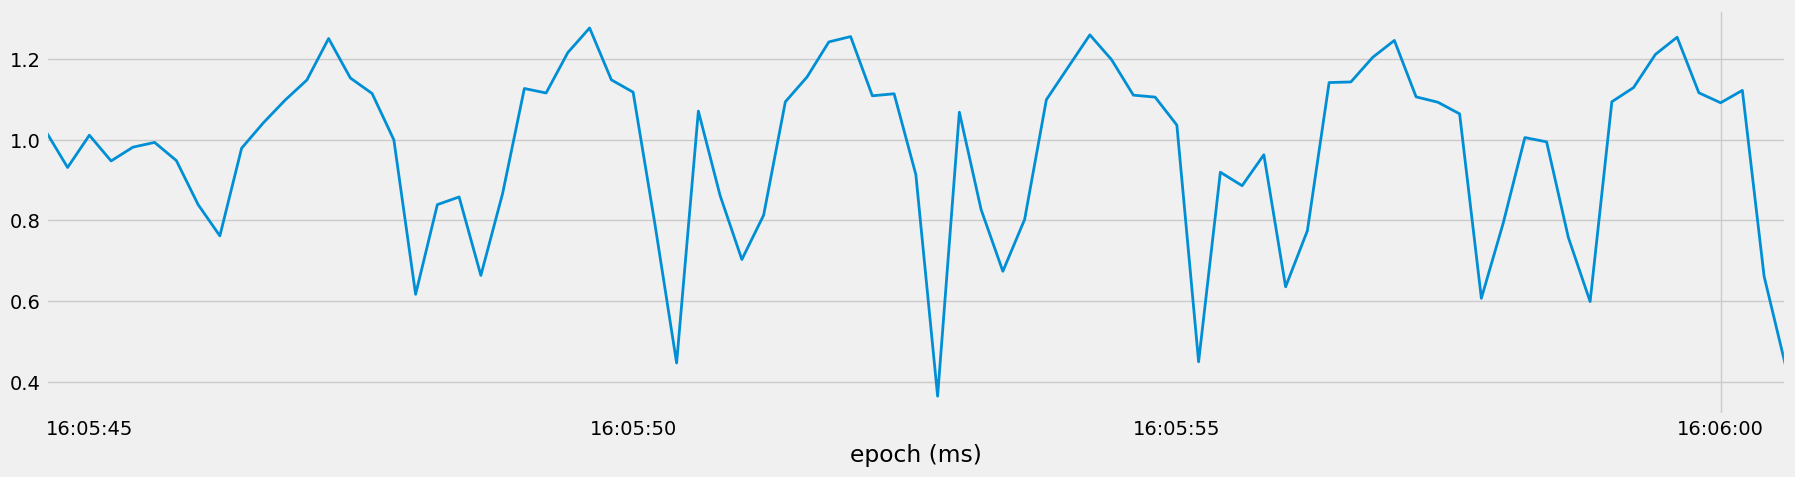

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

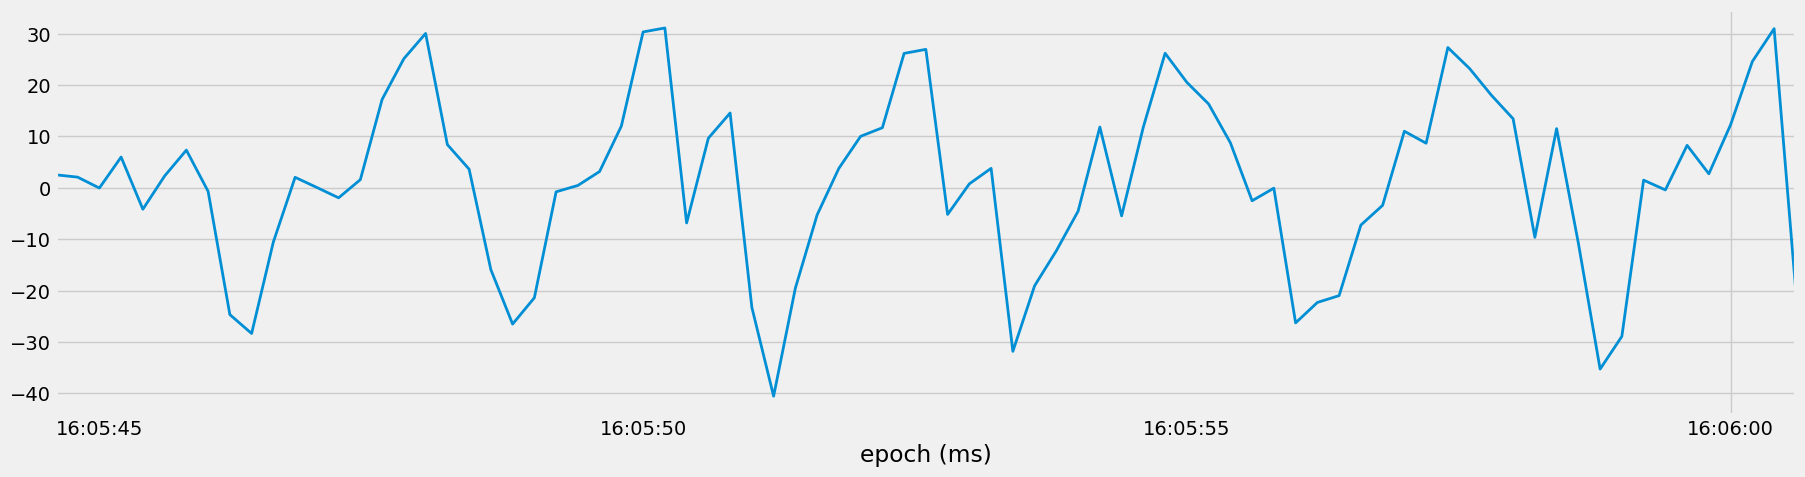

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_x"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

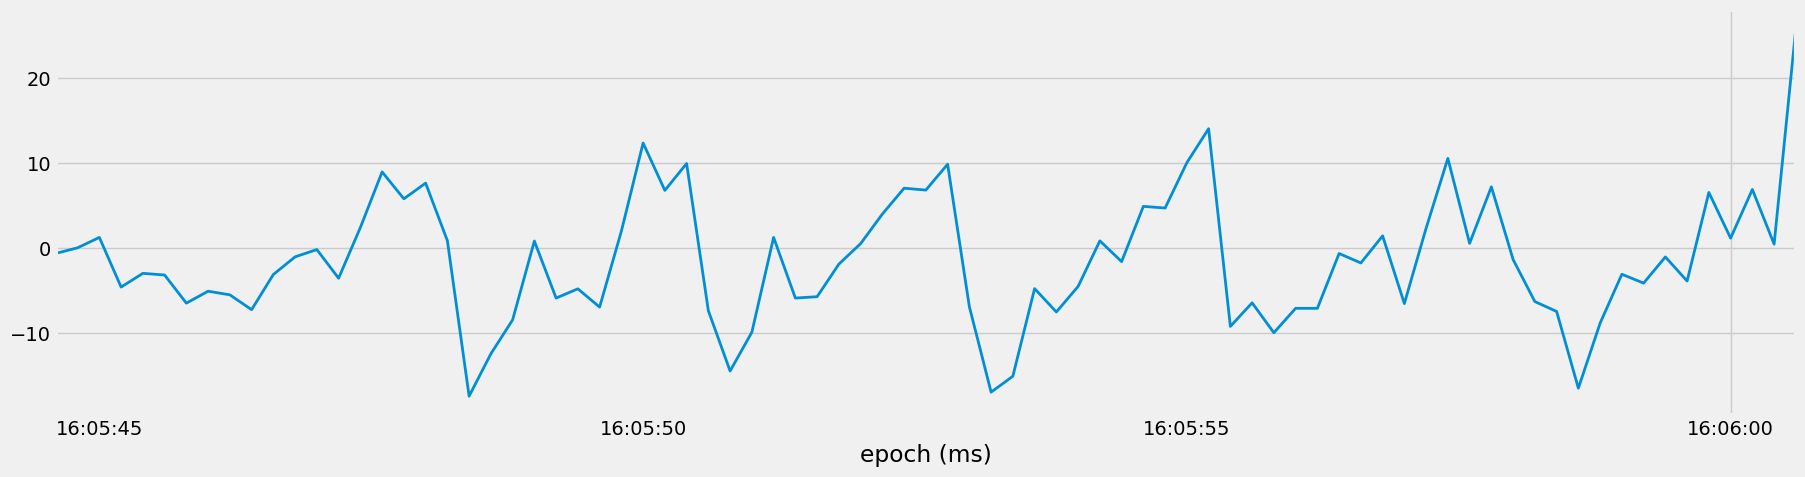

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_y"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

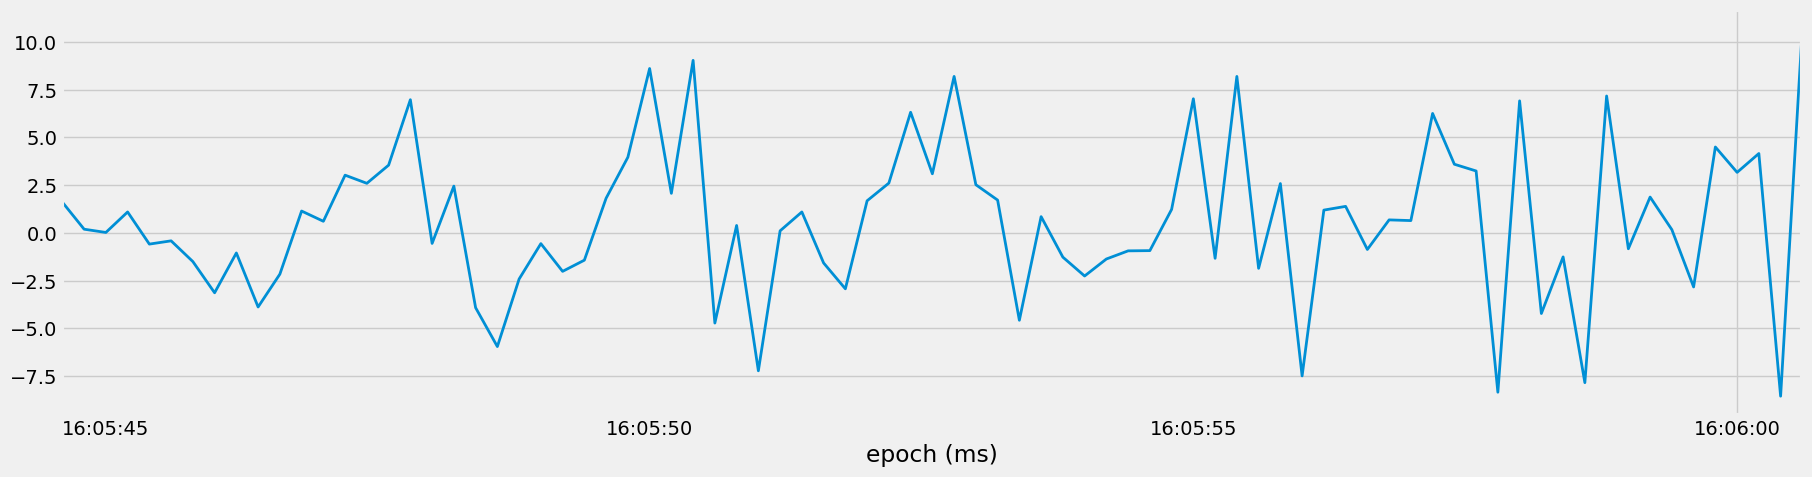

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_z"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

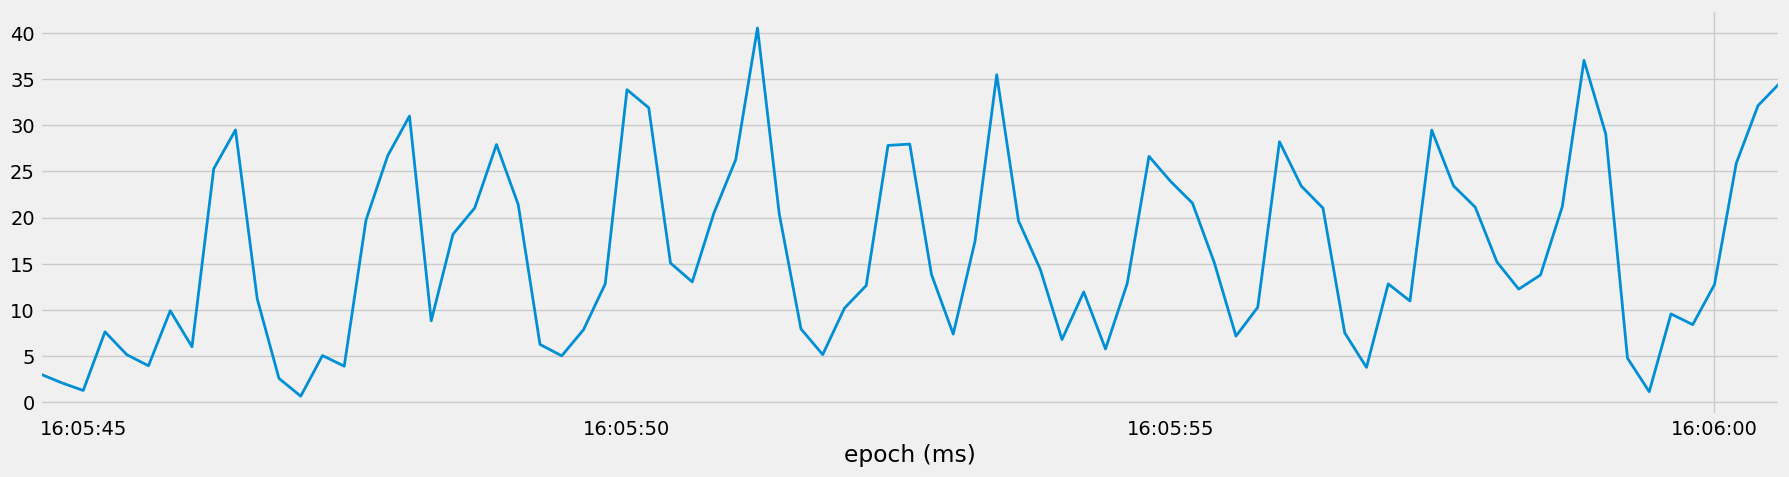

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_r"].plot()

In [ ]:
fs = 1000 / 200

In [ ]:
from DataTransformation import LowPassFilter

In [ ]:
LowPass = LowPassFilter()

In [ ]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]
squat_set = squat_df[squat_df["set"] == squat_df["set"].unique()[0]]
row_set = row_df[row_df["set"] == row_df["set"].unique()[0]]
ohp_set = ohp_df[ohp_df["set"] == ohp_df["set"].unique()[0]]
dead_set = dead_df[dead_df["set"] == dead_df["set"].unique()[0]]

In [ ]:
bench_set

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200  0.958667 -0.062000 -0.045333  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400  0.979000 -0.060500 -0.051000  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600  0.976000 -0.056667 -0.050333  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800  0.936500 -0.056000 -0.034000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000  0.980333 -0.086000 -0.052333 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625  
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270  
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720  
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502  
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585  
...                             ...    ...      ...  ...       ...       ...  
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012  
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911  
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609  
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949  
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656  

[85 rows x 12 columns]

In [ ]:
squat_set

acc_y     acc_z     acc_x    gyr_x    gyr_y  \
epoch (ms)                                                                
2019-01-11 16:05:44.600  0.694667  0.735333  0.135333   2.5366  -0.6220   
2019-01-11 16:05:44.800  0.651500  0.658000  0.097500   2.0854   0.0366   
2019-01-11 16:05:45.000  0.719667  0.694333  0.148667  -0.0364   1.2562   
2019-01-11 16:05:45.200  0.692000  0.632000  0.138000   5.9878  -4.5734   
2019-01-11 16:05:45.400  0.716000  0.658000  0.131667  -4.1586  -2.9636   
...                           ...       ...       ...      ...      ...   
2019-01-11 16:05:59.800  0.694667  0.853667  0.185333   2.7318   6.5366   
2019-01-11 16:06:00.000  0.694500  0.824000  0.172500  12.2806   1.1708   
2019-01-11 16:06:00.200  0.760333  0.806667  0.173667  24.5852   6.8902   
2019-01-11 16:06:00.400  0.489500  0.436000  0.088500  30.9636   0.4634   
2019-01-11 16:06:00.600  0.323500  0.281000  0.086500 -20.2745  25.8540   

                           gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                    
2019-01-11 16:05:44.600   1.6098           A  squat   medium   27  1.020584   
2019-01-11 16:05:44.800   0.1952           A  squat   medium   27  0.931087   
2019-01-11 16:05:45.000   0.0242           A  squat   medium   27  1.011000   
2019-01-11 16:05:45.200   1.0976           A  squat   medium   27  0.947276   
2019-01-11 16:05:45.400  -0.5852           A  squat   medium   27  0.981303   
...                          ...         ...    ...      ...  ...       ...   
2019-01-11 16:05:59.800   4.4998           A  squat   medium   27  1.116090   
2019-01-11 16:06:00.000   3.1710           A  squat   medium   27  1.091358   
2019-01-11 16:06:00.200   4.1584           A  squat   medium   27  1.122042   
2019-01-11 16:06:00.400  -8.5486           A  squat   medium   27  0.661467   
2019-01-11 16:06:00.600  10.7315           A  squat   medium   27  0.437145   

                             gyr_r  
epoch (ms)                          
2019-01-11 16:05:44.600   3.068009  
2019-01-11 16:05:44.800   2.094835  
2019-01-11 16:05:45.000   1.256960  
2019-01-11 16:05:45.200   7.614096  
2019-01-11 16:05:45.400   5.139975  
...                            ...  
2019-01-11 16:05:59.800   8.392739  
2019-01-11 16:06:00.000  12.737313  
2019-01-11 16:06:00.200  25.868885  
2019-01-11 16:06:00.400  32.125346  
2019-01-11 16:06:00.600  34.563706  

[81 rows x 12 columns]

In [ ]:
row_set

acc_y     acc_z     acc_x    gyr_x     gyr_y  \
epoch (ms)                                                                 
2019-01-14 14:01:40.000 -0.854000  0.271000 -0.037000 -31.8172 -1.683000   
2019-01-14 14:01:40.200 -0.884000  0.174000 -0.042500 -56.3416 -8.317200   
2019-01-14 14:01:40.400 -0.967667  0.030333 -0.008333 -31.4388 -3.073200   
2019-01-14 14:01:40.600 -1.046500 -0.042500 -0.018500  -4.5244 -4.963200   
2019-01-14 14:01:40.800 -1.098667 -0.062333 -0.031000   7.7318  1.963400   
...                           ...       ...       ...      ...       ...   
2019-01-14 14:01:54.800 -1.138000 -0.129333 -0.063000  -1.0244  1.927000   
2019-01-14 14:01:55.000 -1.150500 -0.147500 -0.046500  -5.9512 -7.097400   
2019-01-14 14:01:55.200 -1.095667 -0.107000 -0.060333  -5.8416 -8.951400   
2019-01-14 14:01:55.400 -1.028000 -0.118500 -0.061000  -5.0242  1.524400   
2019-01-14 14:01:55.600 -0.991000 -0.125000 -0.071000  -6.6260  5.040667   

                          gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                  
2019-01-14 14:01:40.000 -6.3660           C   row   medium   51  0.896731   
2019-01-14 14:01:40.200 -9.9388           C   row   medium   51  0.901964   
2019-01-14 14:01:40.400  0.9266           C   row   medium   51  0.968178   
2019-01-14 14:01:40.600  1.3536           C   row   medium   51  1.047526   
2019-01-14 14:01:40.800  4.4878           C   row   medium   51  1.100870   
...                         ...         ...   ...      ...  ...       ...   
2019-01-14 14:01:54.800 -0.2194           C   row   medium   51  1.147057   
2019-01-14 14:01:55.000  0.7318           C   row   medium   51  1.160848   
2019-01-14 14:01:55.200 -0.7438           C   row   medium   51  1.102531   
2019-01-14 14:01:55.400  0.5366           C   row   medium   51  1.036604   
2019-01-14 14:01:55.600  5.7110           C   row   medium   51  1.001373   

                             gyr_r  
epoch (ms)                          
2019-01-14 14:01:40.000  32.491424  
2019-01-14 14:01:40.200  57.812900  
2019-01-14 14:01:40.400  31.602236  
2019-01-14 14:01:40.600   6.850969  
2019-01-14 14:01:40.800   9.152924  
...                            ...  
2019-01-14 14:01:54.800   2.193367  
2019-01-14 14:01:55.000   9.291146  
2019-01-14 14:01:55.200  10.714714  
2019-01-14 14:01:55.400   5.277719  
2019-01-14 14:01:55.600  10.095926  

[79 rows x 12 columns]

In [ ]:
ohp_set

acc_y     acc_z     acc_x      gyr_x      gyr_y  \
epoch (ms)                                                                    
2019-01-11 15:38:55.000  0.901000  0.047000 -0.062500   0.439000  -6.500000   
2019-01-11 15:38:55.200  1.080667  0.060333 -0.080667   5.597600  -3.219600   
2019-01-11 15:38:55.400  1.314000  0.024000 -0.137500  20.853400   7.756200   
2019-01-11 15:38:55.600  0.910333 -0.007000 -0.234667  17.768400  11.488000   
2019-01-11 15:38:55.800  0.861000 -0.095500 -0.337000   2.377800   2.268200   
...                           ...       ...       ...        ...        ...   
2019-01-11 15:39:09.200  1.201000 -0.006000 -0.062333 -13.475600   0.841400   
2019-01-11 15:39:09.400  1.036500  0.028500  0.022500   3.097400  -2.256000   
2019-01-11 15:39:09.600  0.953667  0.022333  0.000000  -4.634200  -4.353600   
2019-01-11 15:39:09.800  0.986500  0.056500 -0.011000  -1.329200  -3.707400   
2019-01-11 15:39:10.000  0.977000  0.068000 -0.039000  -7.215333  -3.922667   

                             gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                     
2019-01-11 15:38:55.000  -0.085400           A   ohp    heavy    9  0.904387   
2019-01-11 15:38:55.200  -1.426600           A   ohp    heavy    9  1.085351   
2019-01-11 15:38:55.400 -44.134000           A   ohp    heavy    9  1.321393   
2019-01-11 15:38:55.600 -35.000200           A   ohp    heavy    9  0.940119   
2019-01-11 15:38:55.800  -4.622000           A   ohp    heavy    9  0.929522   
...                            ...         ...   ...      ...  ...       ...   
2019-01-11 15:39:09.200  27.244000           A   ohp    heavy    9  1.202631   
2019-01-11 15:39:09.400  -3.670600           A   ohp    heavy    9  1.037136   
2019-01-11 15:39:09.600  -3.378200           A   ohp    heavy    9  0.953928   
2019-01-11 15:39:09.800  -5.122000           A   ohp    heavy    9  0.988178   
2019-01-11 15:39:10.000  -9.390333           A   ohp    heavy    9  0.980140   

                             gyr_r  
epoch (ms)                          
2019-01-11 15:38:55.000   6.515368  
2019-01-11 15:38:55.200   6.613179  
2019-01-11 15:38:55.400  49.425023  
2019-01-11 15:38:55.600  40.898706  
2019-01-11 15:38:55.800   5.671115  
...                            ...  
2019-01-11 15:39:09.200  30.406172  
2019-01-11 15:39:09.400   5.306291  
2019-01-11 15:39:09.600   7.200130  
2019-01-11 15:39:09.800   6.461151  
2019-01-11 15:39:10.000  12.475043  

[76 rows x 12 columns]

In [ ]:
dead_set

acc_y     acc_z     acc_x      gyr_x    gyr_y  \
epoch (ms)                                                                  
2019-01-11 16:24:24.800 -1.027000 -0.165500  0.056500   3.231667  -2.6830   
2019-01-11 16:24:25.000 -1.025000 -0.155333  0.073333  12.853600 -30.9024   
2019-01-11 16:24:25.200 -1.022000 -0.125500  0.059000   2.073200  -1.2316   
2019-01-11 16:24:25.400 -1.031667 -0.114667  0.030667  -0.329600   3.1098   
2019-01-11 16:24:25.600 -1.025500 -0.124500  0.046500  -0.975600   9.7682   
...                           ...       ...       ...        ...      ...   
2019-01-11 16:24:54.800 -1.337500 -0.105500  0.039000 -19.000000  18.5000   
2019-01-11 16:24:55.000 -1.006000 -0.094667  0.081667 -15.719600  24.2926   
2019-01-11 16:24:55.200 -1.052000 -0.185000  0.033500  -0.060800  -4.8294   
2019-01-11 16:24:55.400 -1.019333 -0.176333 -0.003000   0.951000   5.3048   
2019-01-11 16:24:55.600 -1.018500 -0.172000  0.010000  -3.439200  -1.7560   

                             gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                     
2019-01-11 16:24:24.800   2.418667           A  dead   medium    6  1.041783   
2019-01-11 16:24:25.000   4.487800           A  dead   medium    6  1.039294   
2019-01-11 16:24:25.200   3.170800           A  dead   medium    6  1.031366   
2019-01-11 16:24:25.400   1.817000           A  dead   medium    6  1.038472   
2019-01-11 16:24:25.600  -2.219400           A  dead   medium    6  1.034076   
...                            ...         ...   ...      ...  ...       ...   
2019-01-11 16:24:54.800  -3.829400           A  dead   medium    6  1.342221   
2019-01-11 16:24:55.000  13.695200           A  dead   medium    6  1.013739   
2019-01-11 16:24:55.200   7.317200           A  dead   medium    6  1.068668   
2019-01-11 16:24:55.400   3.670600           A  dead   medium    6  1.034477   
2019-01-11 16:24:55.600   2.768200           A  dead   medium    6  1.032970   

                             gyr_r  
epoch (ms)                          
2019-01-11 16:24:24.800   4.846866  
2019-01-11 16:24:25.000  33.768531  
2019-01-11 16:24:25.200   3.983588  
2019-01-11 16:24:25.400   3.616764  
2019-01-11 16:24:25.600  10.064555  
...                            ...  
2019-01-11 16:24:54.800  26.793923  
2019-01-11 16:24:55.000  32.012415  
2019-01-11 16:24:55.200   8.767452  
2019-01-11 16:24:55.400   6.520629  
2019-01-11 16:24:55.600   4.751270  

[144 rows x 12 columns]

In [ ]:
dead_df

acc_y     acc_z     acc_x      gyr_x    gyr_y  \
epoch (ms)                                                                  
2019-01-11 16:24:24.800 -1.027000 -0.165500  0.056500   3.231667  -2.6830   
2019-01-11 16:24:25.000 -1.025000 -0.155333  0.073333  12.853600 -30.9024   
2019-01-11 16:24:25.200 -1.022000 -0.125500  0.059000   2.073200  -1.2316   
2019-01-11 16:24:25.400 -1.031667 -0.114667  0.030667  -0.329600   3.1098   
2019-01-11 16:24:25.600 -1.025500 -0.124500  0.046500  -0.975600   9.7682   
...                           ...       ...       ...        ...      ...   
2019-01-16 19:35:42.800 -1.083000 -0.164500  0.015000  -0.341600  -6.3658   
2019-01-16 19:35:43.000 -1.308000 -0.209333 -0.007000   4.939000  31.2440   
2019-01-16 19:35:43.200 -1.003000 -0.113500  0.161500  -4.427000   7.7680   
2019-01-16 19:35:43.400 -1.001333 -0.138667  0.040667   3.256000   3.8050   
2019-01-16 19:35:43.600 -1.046000 -0.148000 -0.018000   3.658750   1.4635   

                             gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                     
2019-01-11 16:24:24.800   2.418667           A  dead   medium    6  1.041783   
2019-01-11 16:24:25.000   4.487800           A  dead   medium    6  1.039294   
2019-01-11 16:24:25.200   3.170800           A  dead   medium    6  1.031366   
2019-01-11 16:24:25.400   1.817000           A  dead   medium    6  1.038472   
2019-01-11 16:24:25.600  -2.219400           A  dead   medium    6  1.034076   
...                            ...         ...   ...      ...  ...       ...   
2019-01-16 19:35:42.800   2.390200           E  dead    heavy   72  1.095525   
2019-01-16 19:35:43.000 -21.219400           E  dead    heavy   72  1.324664   
2019-01-16 19:35:43.200  12.585400           E  dead    heavy   72  1.022239   
2019-01-16 19:35:43.400  17.926600           E  dead    heavy   72  1.011707   
2019-01-16 19:35:43.600  11.158500           E  dead    heavy   72  1.056572   

                             gyr_r  
epoch (ms)                          
2019-01-11 16:24:24.800   4.846866  
2019-01-11 16:24:25.000  33.768531  
2019-01-11 16:24:25.200   3.983588  
2019-01-11 16:24:25.400   3.616764  
2019-01-11 16:24:25.600  10.064555  
...                            ...  
2019-01-16 19:35:42.800   6.808315  
2019-01-16 19:35:43.000  38.089949  
2019-01-16 19:35:43.200  15.438020  
2019-01-16 19:35:43.400  18.612967  
2019-01-16 19:35:43.600  11.833867  

[1531 rows x 12 columns]

<AxesSubplot: xlabel='epoch (ms)'>

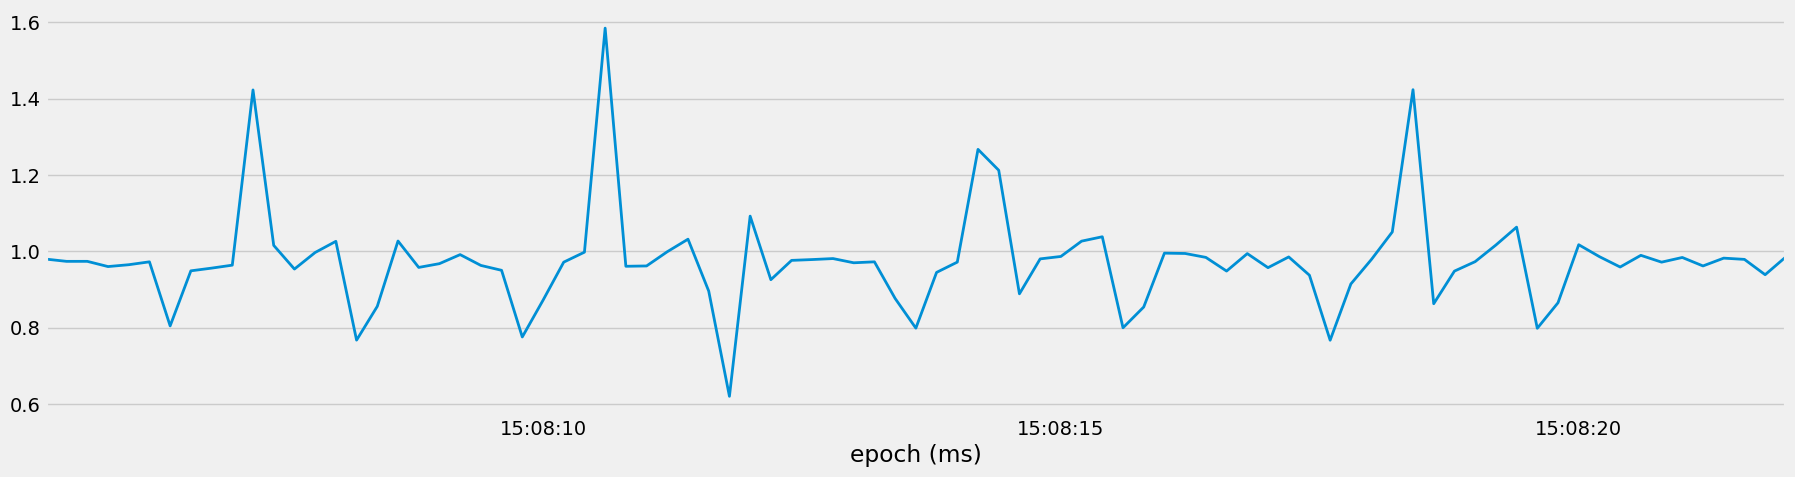

In [ ]:
bench_set["acc_r"].plot()

In [ ]:
column = "acc_r"

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=5
)

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200  0.958667 -0.062000 -0.045333  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400  0.979000 -0.060500 -0.051000  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600  0.976000 -0.056667 -0.050333  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800  0.936500 -0.056000 -0.034000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000  0.980333 -0.086000 -0.052333 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012   
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911   
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609   
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949   
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656   

                         acc_r_lowpass  
epoch (ms)                              
2019-01-11 15:08:05.200       0.978693  
2019-01-11 15:08:05.400       0.957044  
2019-01-11 15:08:05.600       0.938474  
2019-01-11 15:08:05.800       0.926091  
2019-01-11 15:08:06.000       0.923252  
...                                ...  
2019-01-11 15:08:21.200       0.980273  
2019-01-11 15:08:21.400       0.977390  
2019-01-11 15:08:21.600       0.976406  
2019-01-11 15:08:21.800       0.978322  
2019-01-11 15:08:22.000       0.982682  

[85 rows x 13 columns]

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

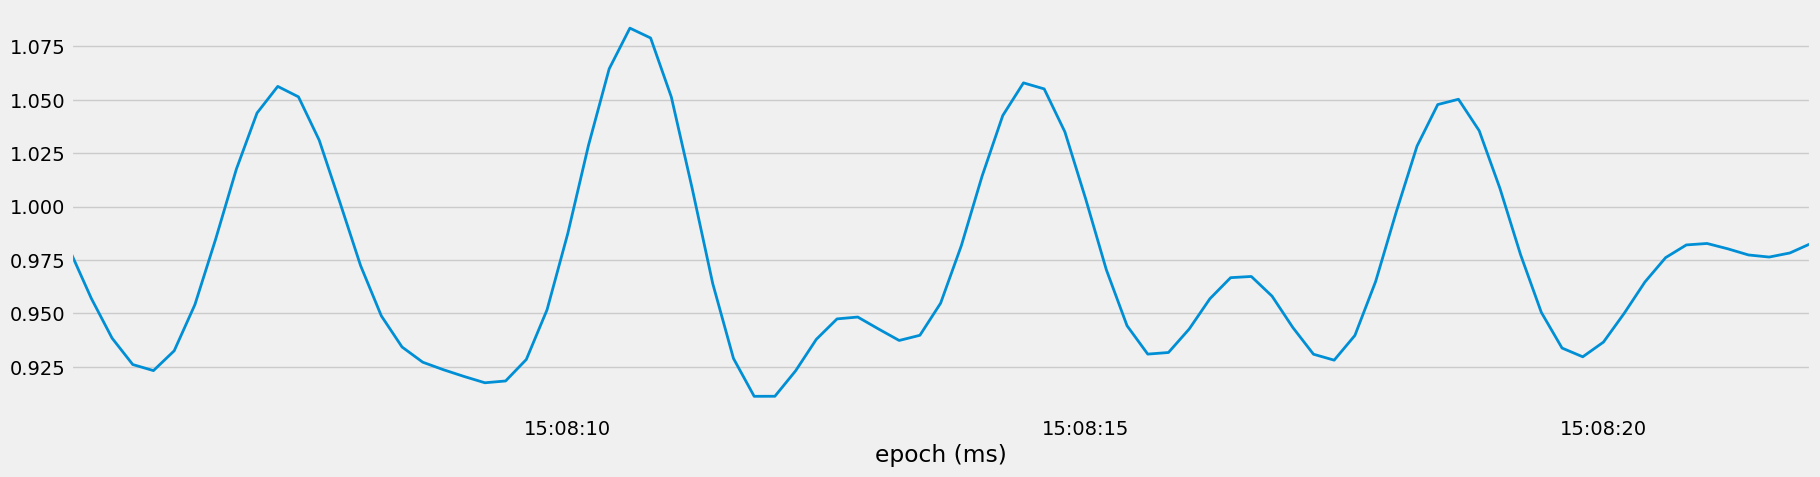

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

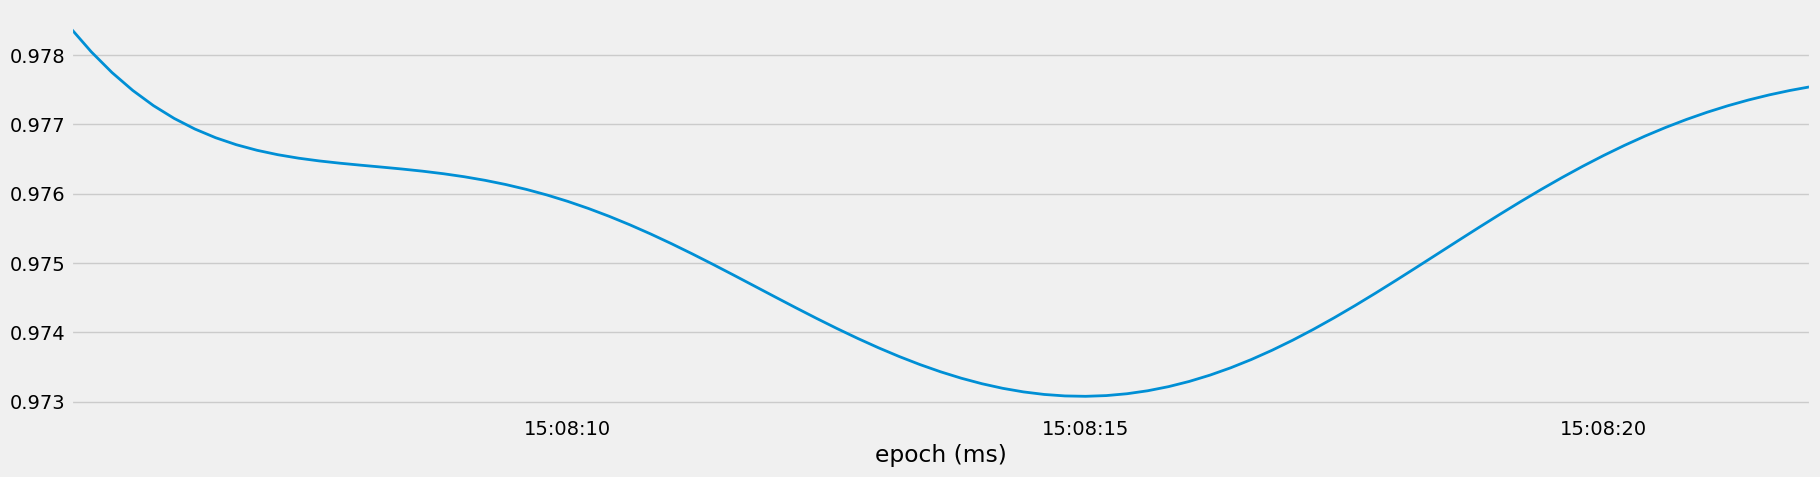

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.1, order=5
)[column+"_lowpass"].plot()

In [ ]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[5]]

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

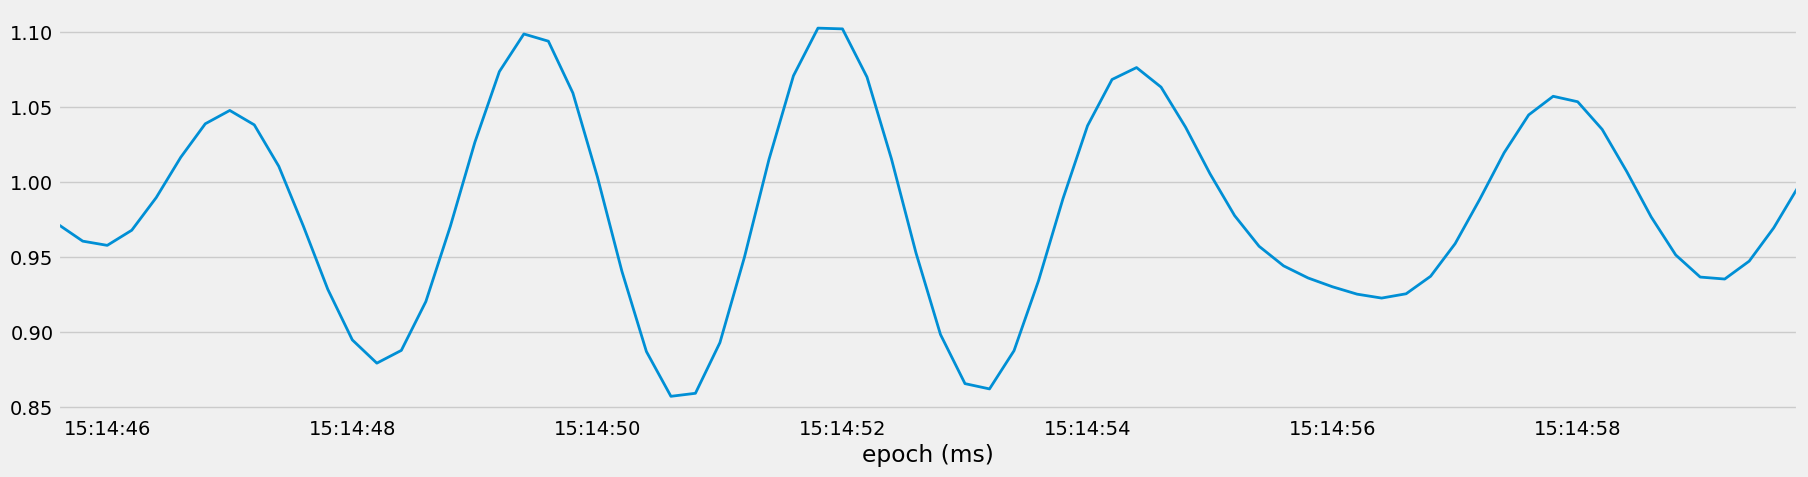

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

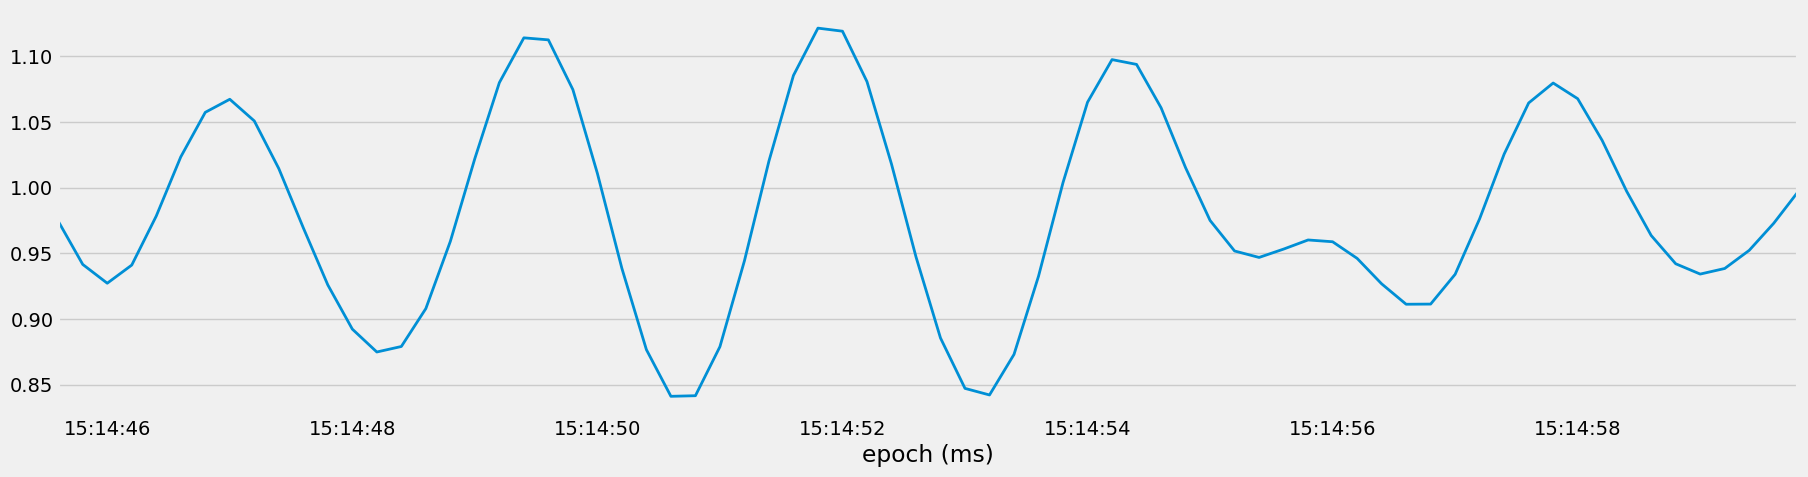

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.6, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

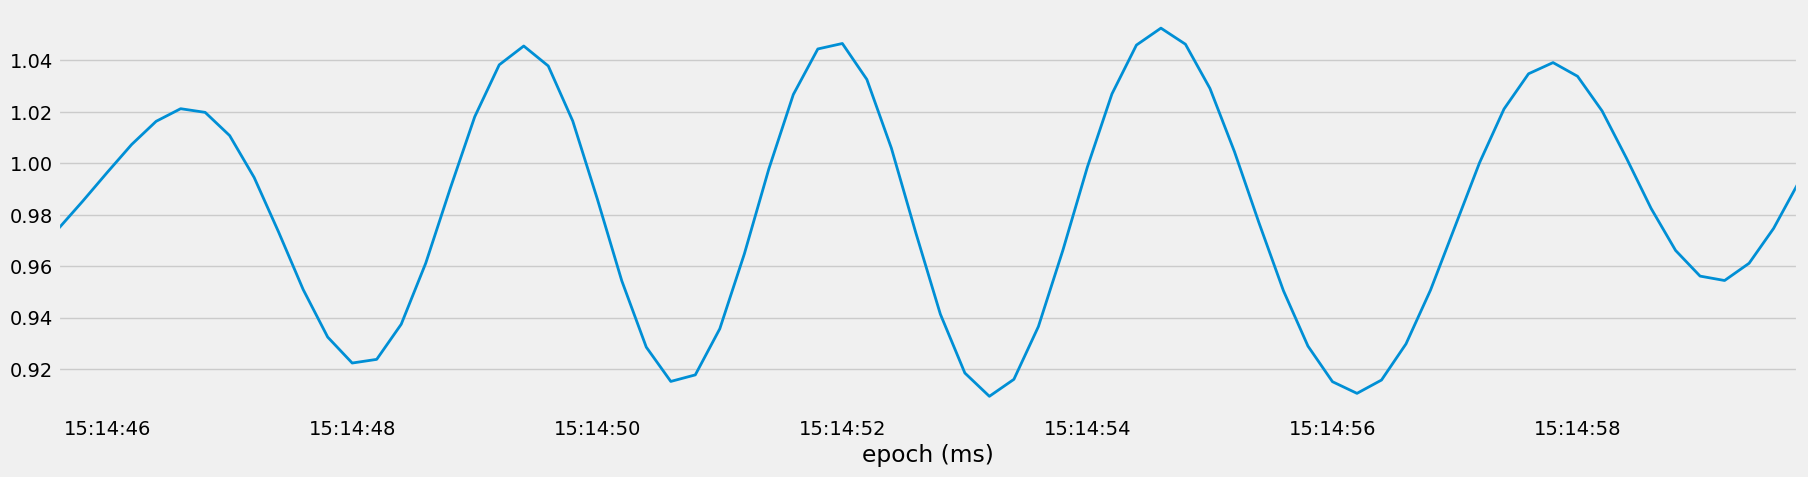

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.4, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

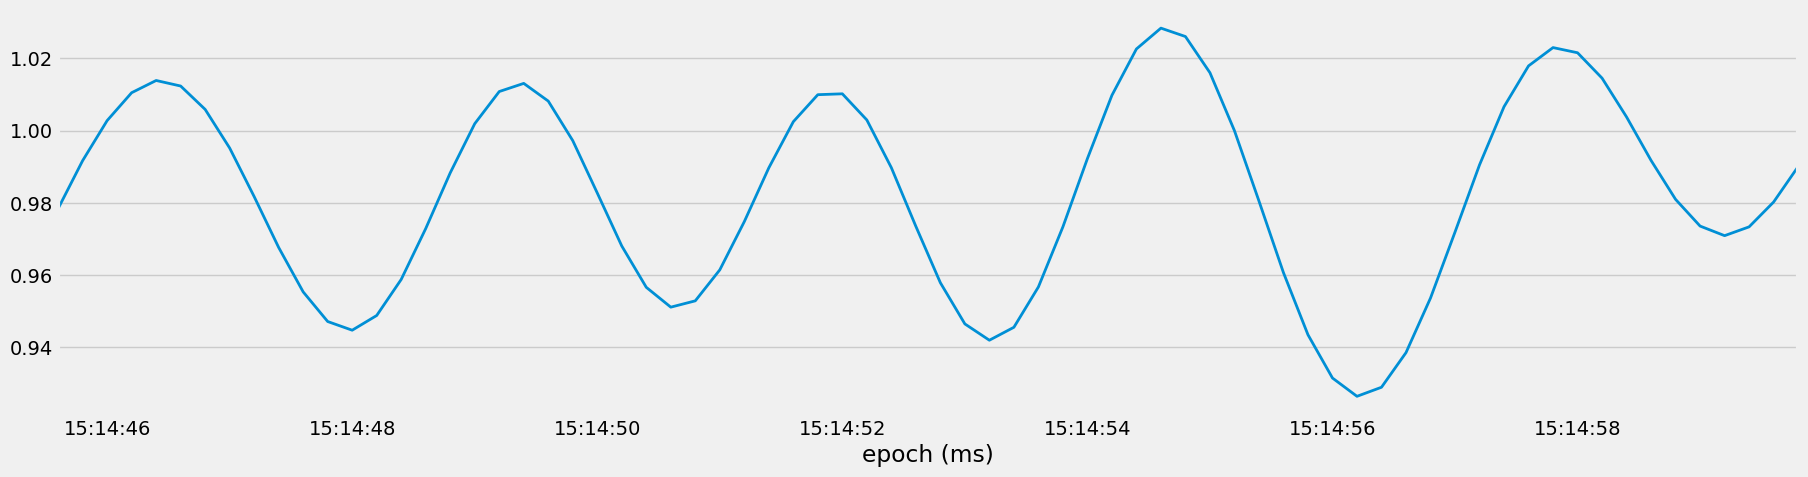

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.35, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

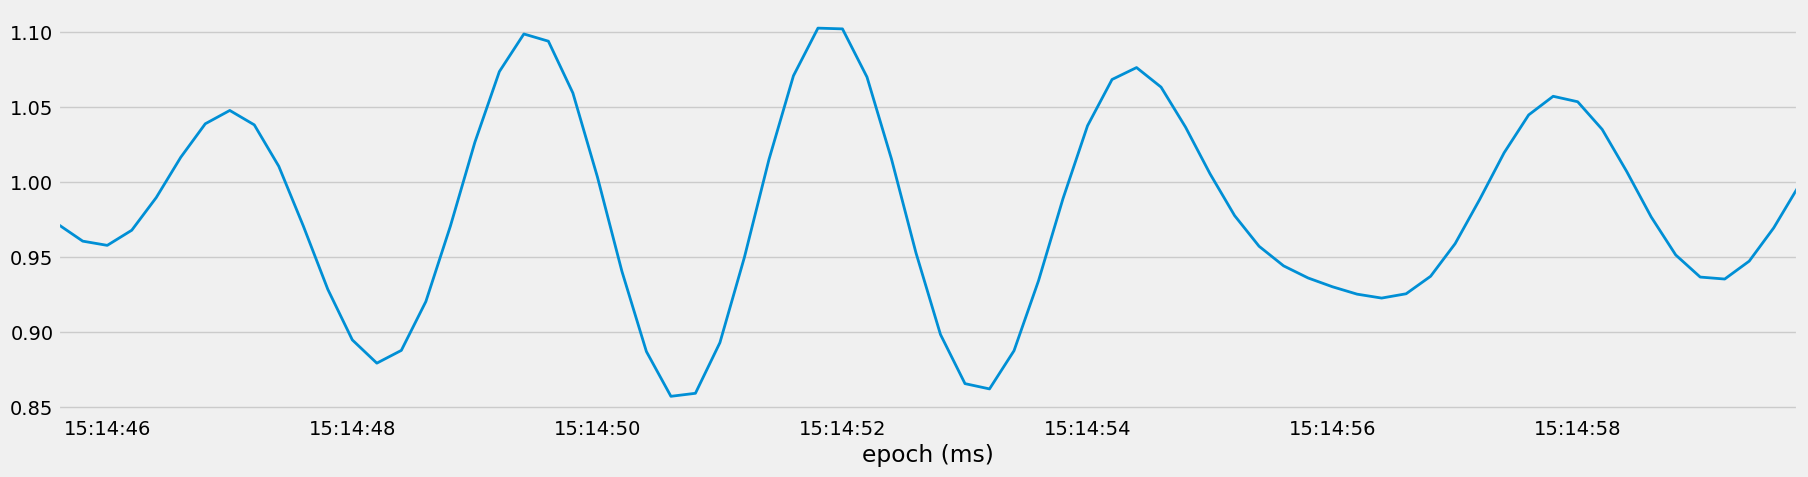

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

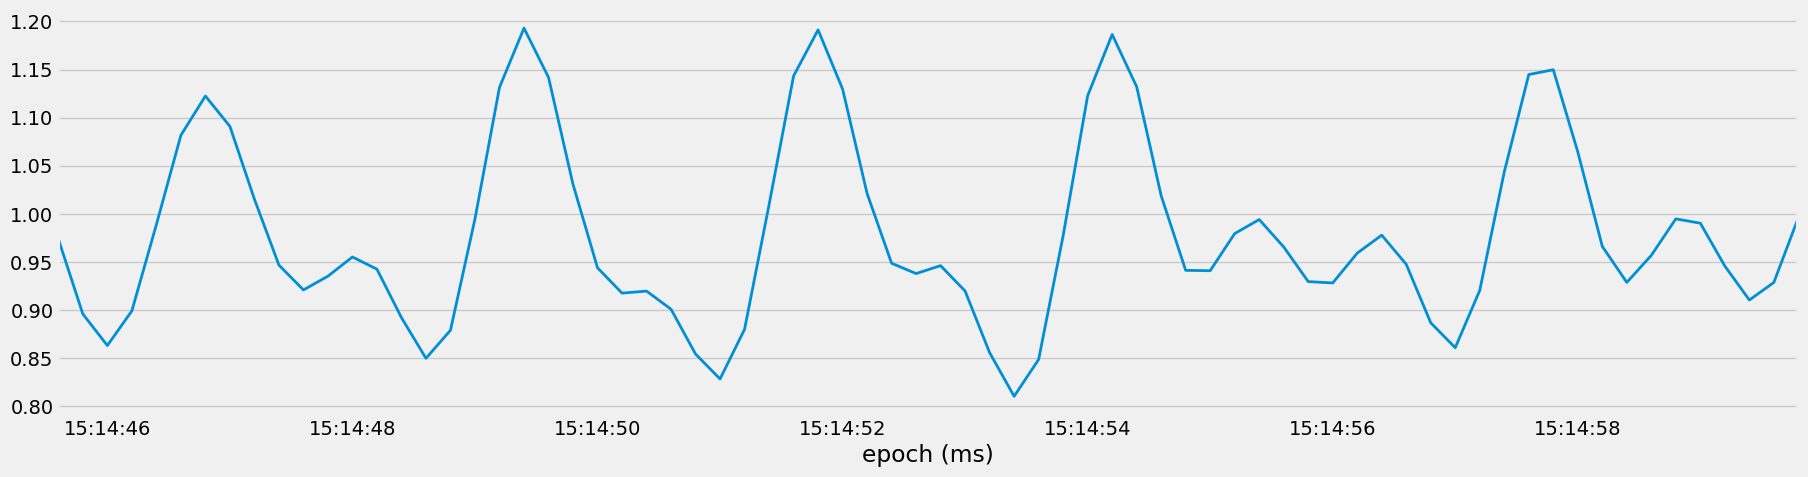

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.9, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

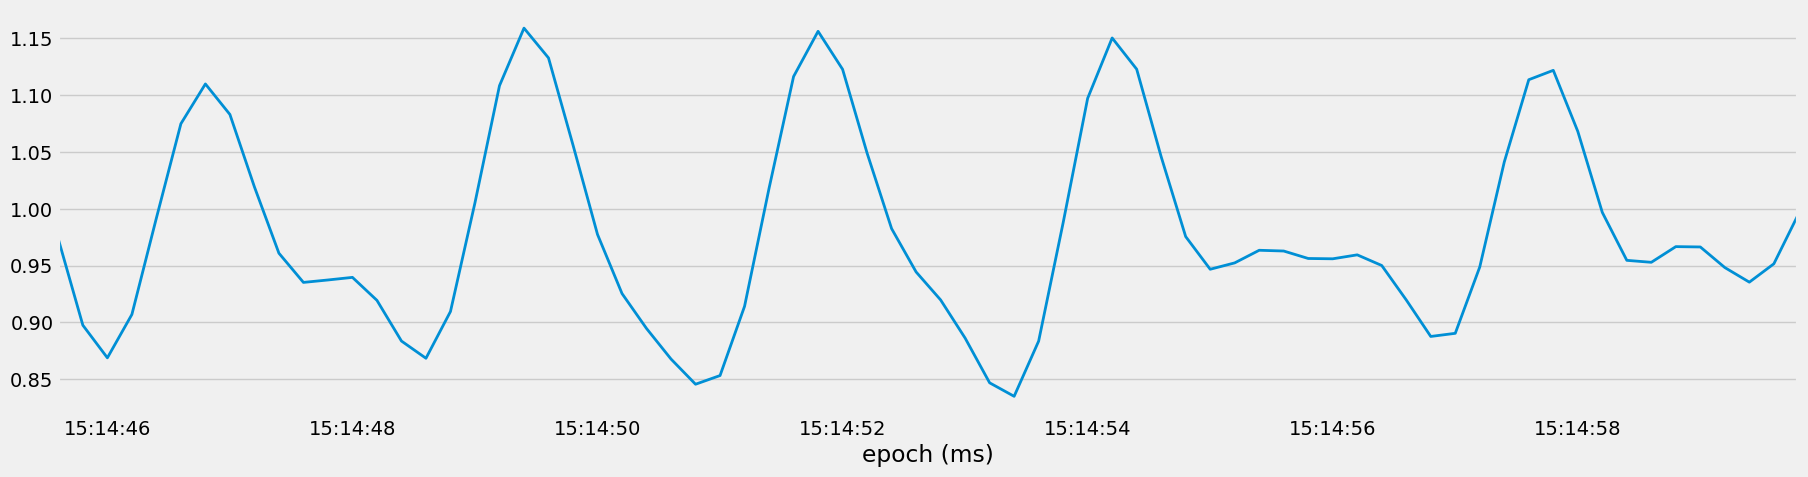

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.8, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

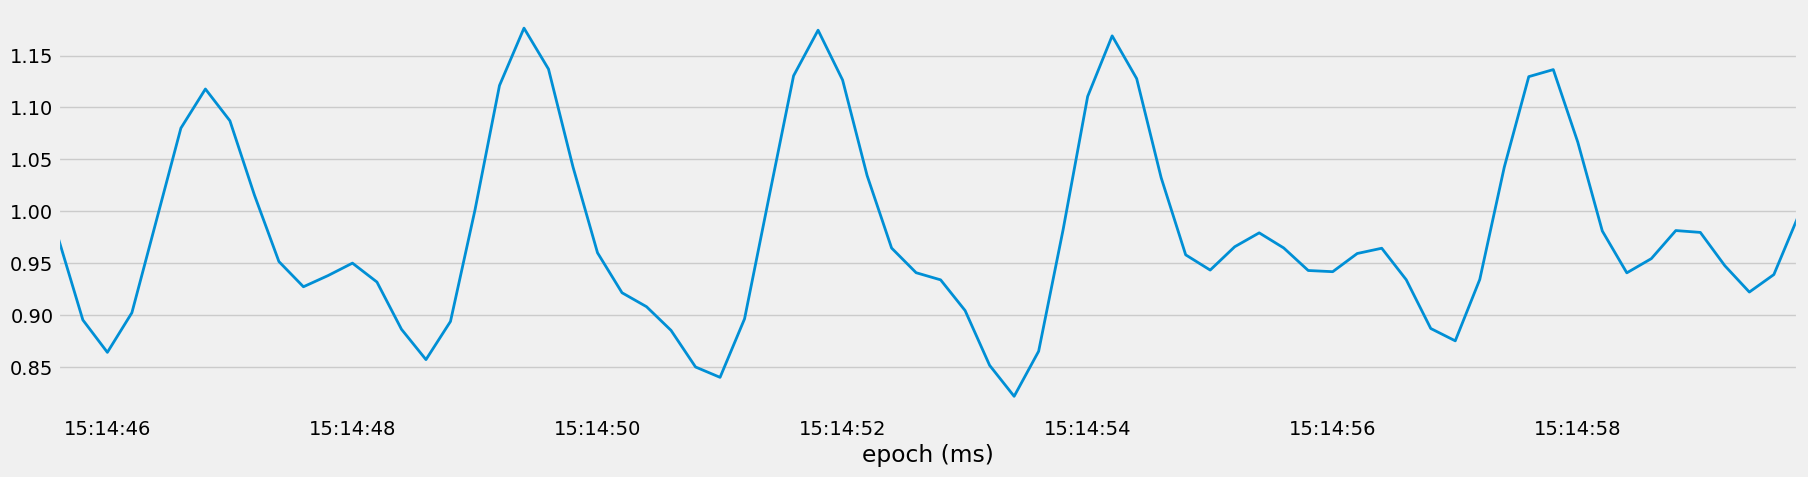

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.85, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

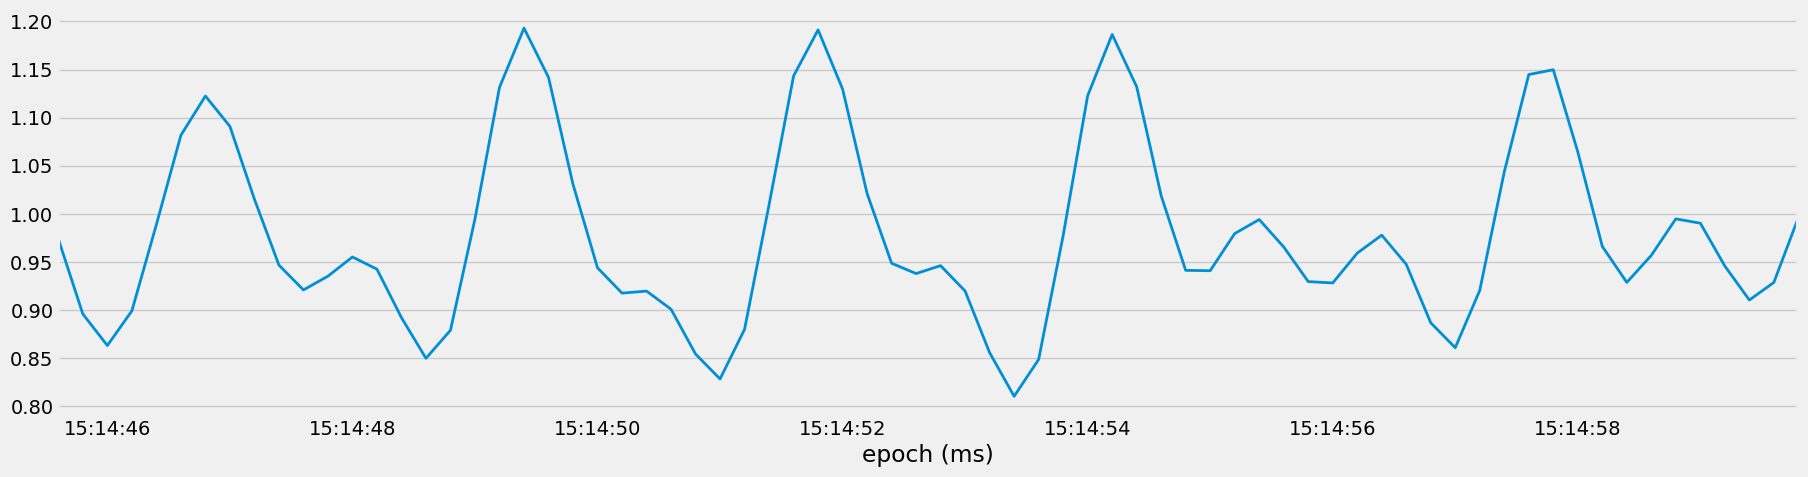

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.9, order=5
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

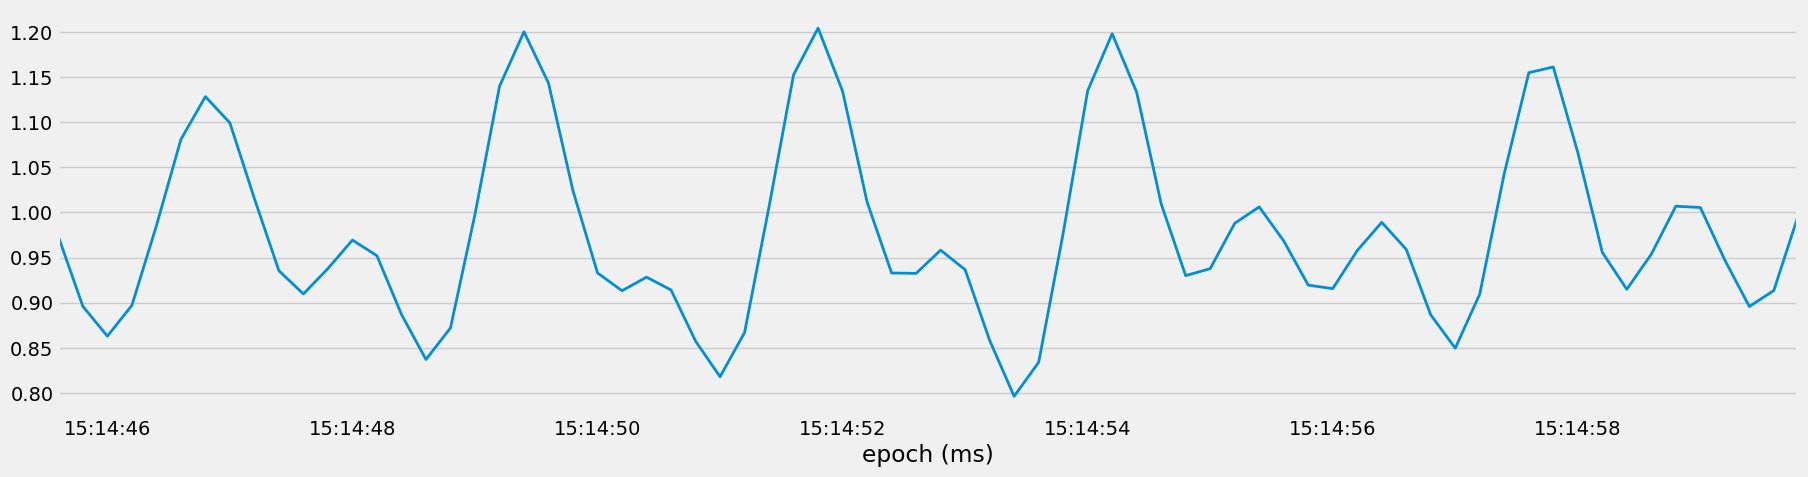

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.9, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

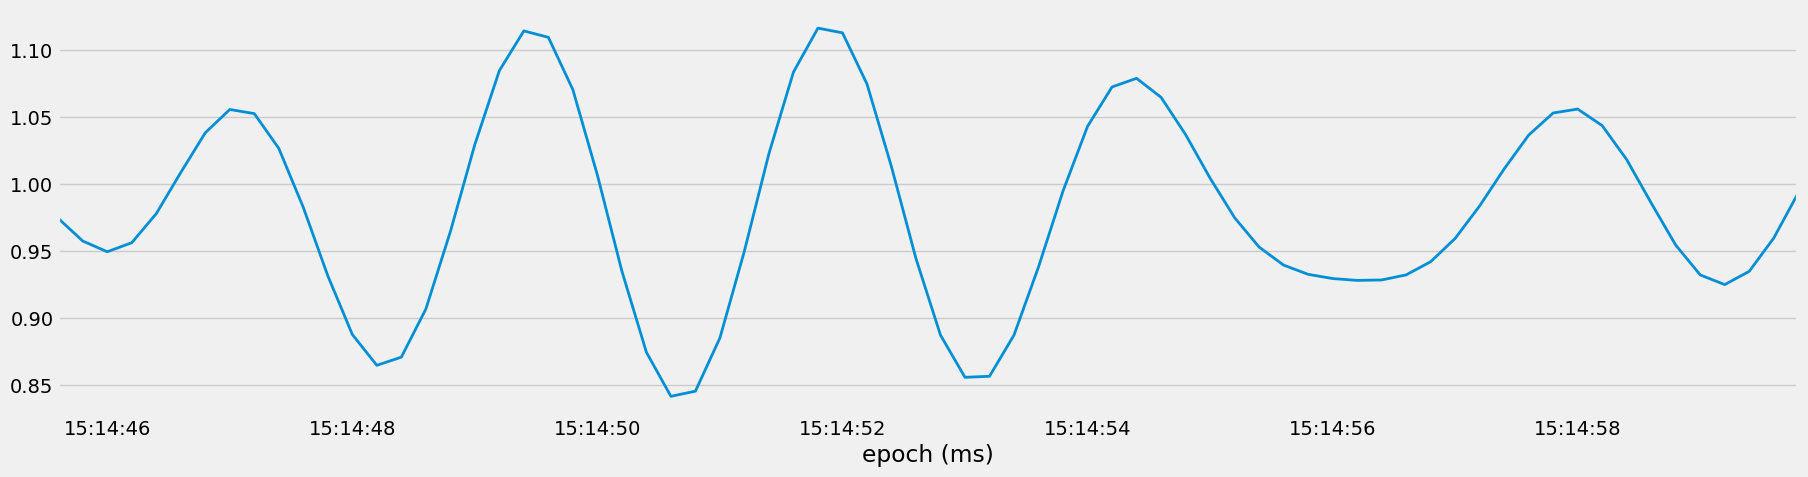

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

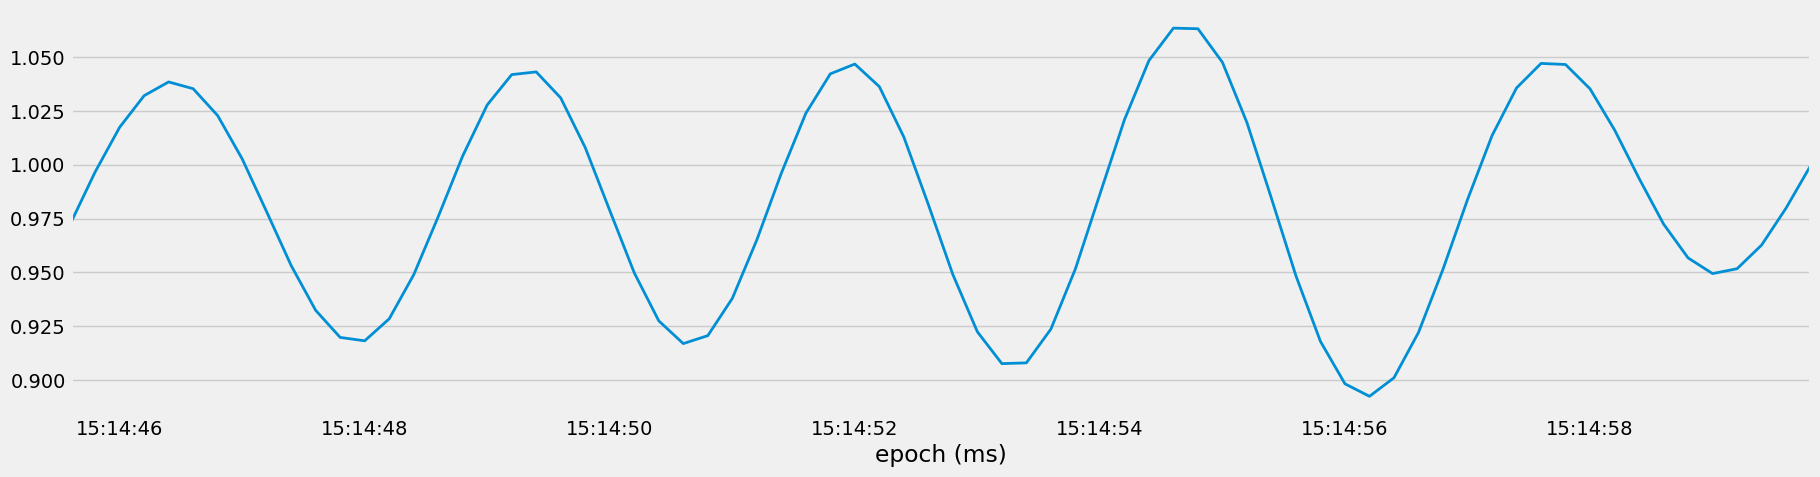

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.4, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

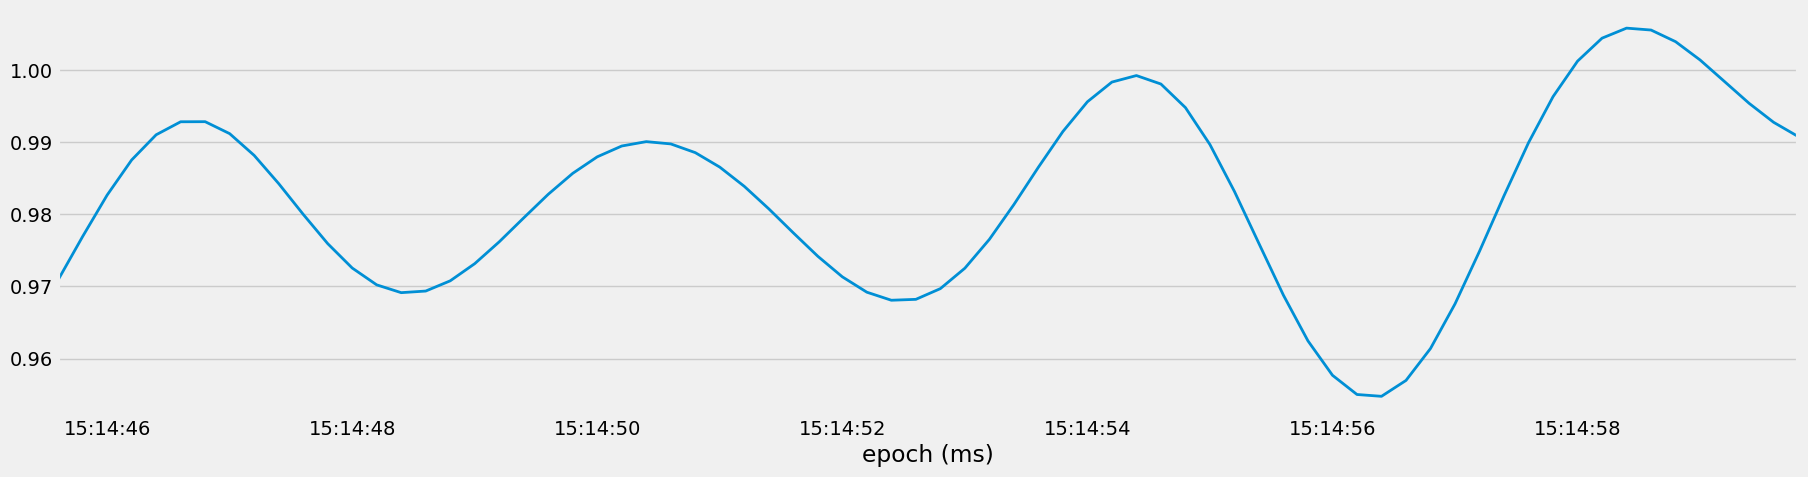

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.3, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

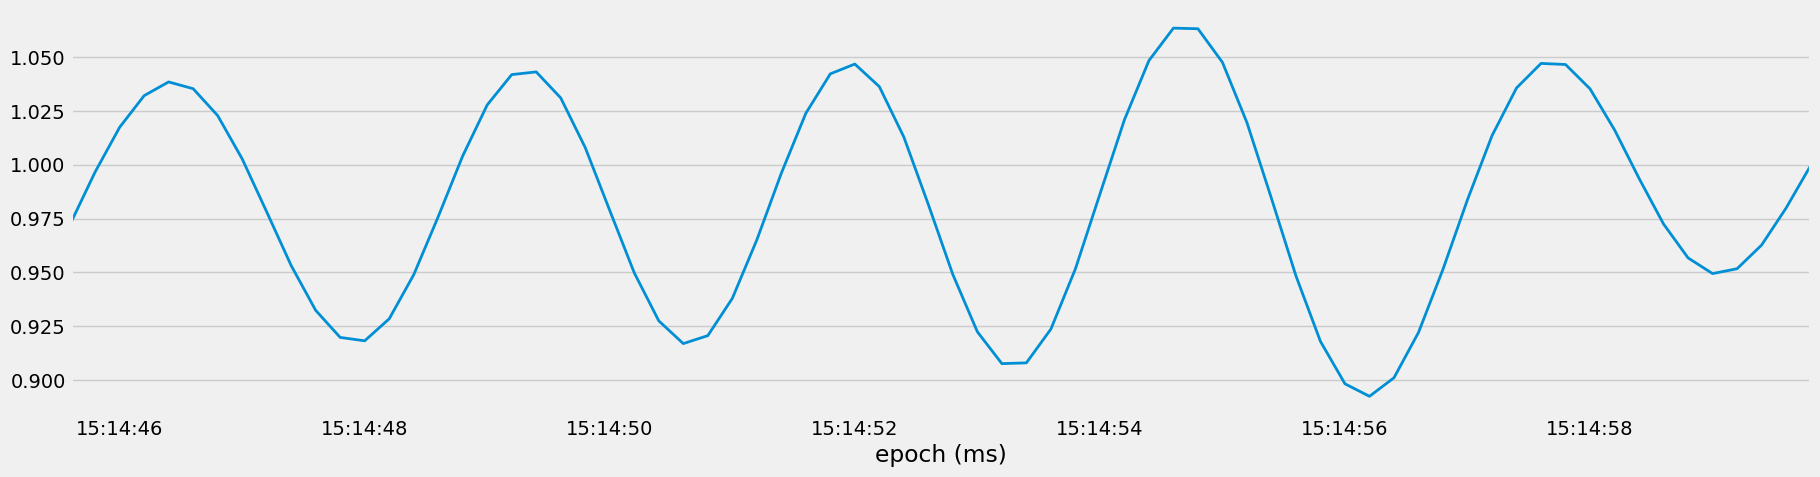

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.4, order=10
)[column+"_lowpass"].plot()

In [ ]:
column = "acc_y"

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

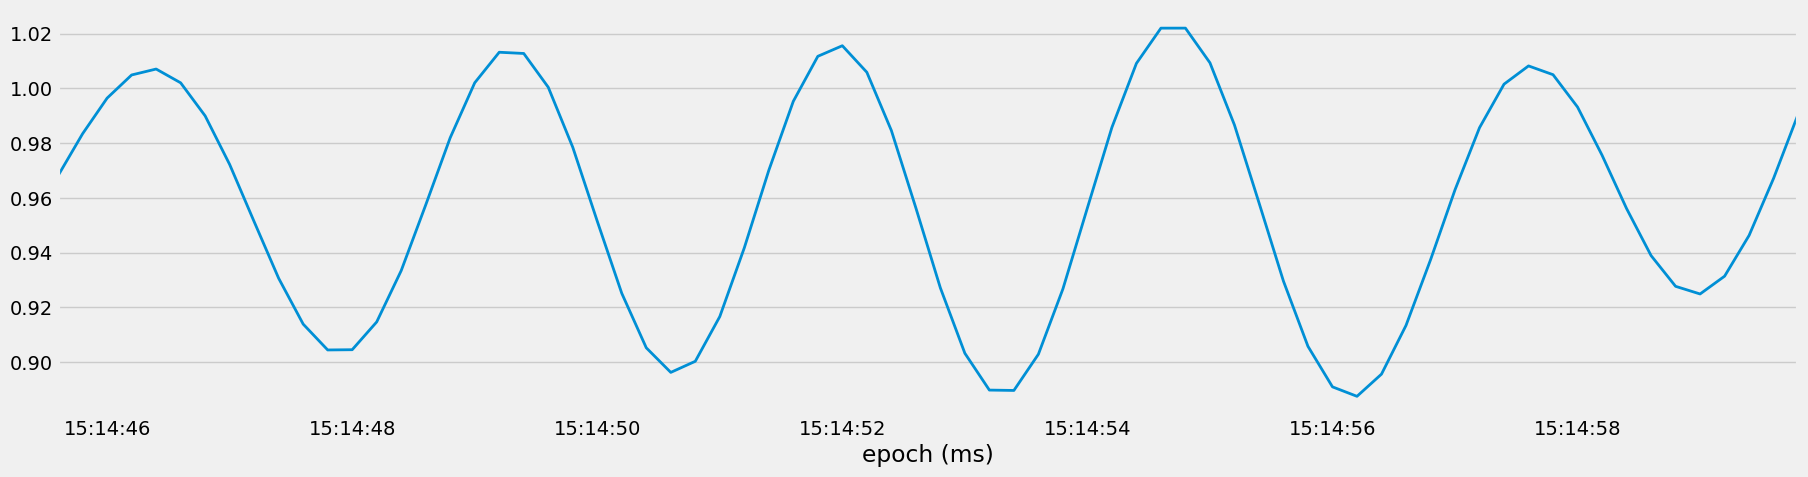

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.4, order=10
)[column+"_lowpass"].plot()

In [ ]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

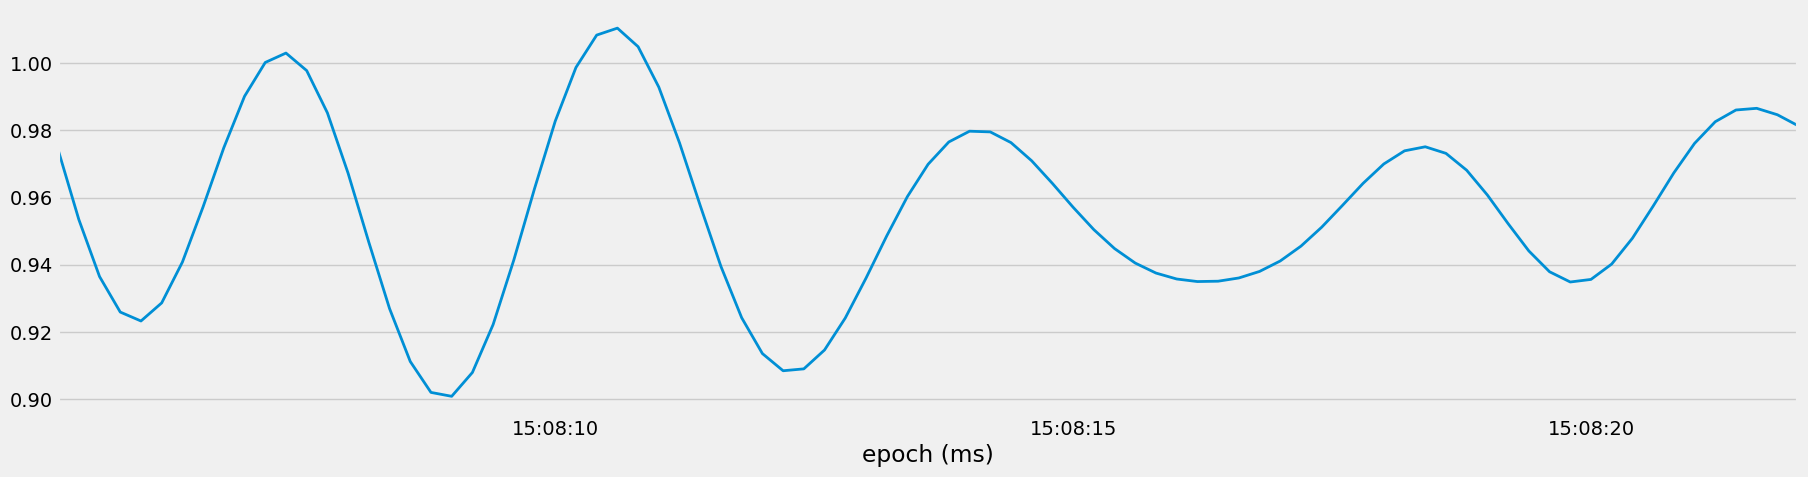

In [ ]:
LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.4, order=10
)[column+"_lowpass"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

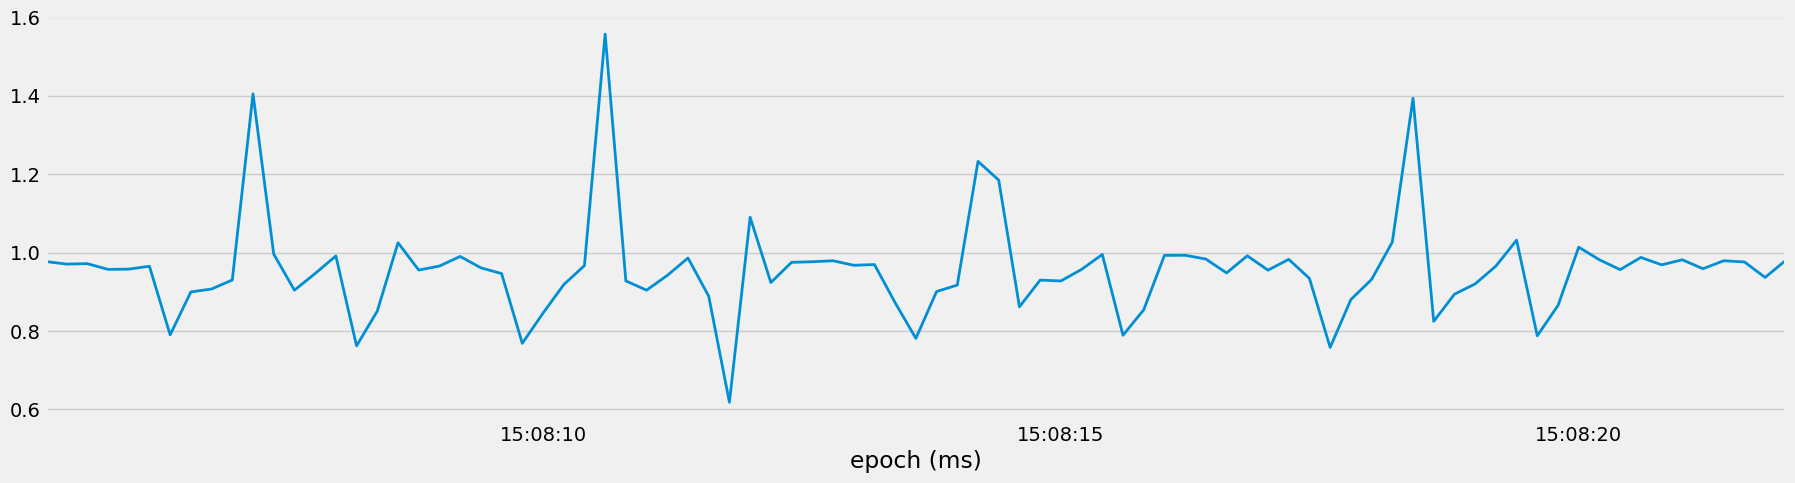

In [ ]:
bench_set["acc_y"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

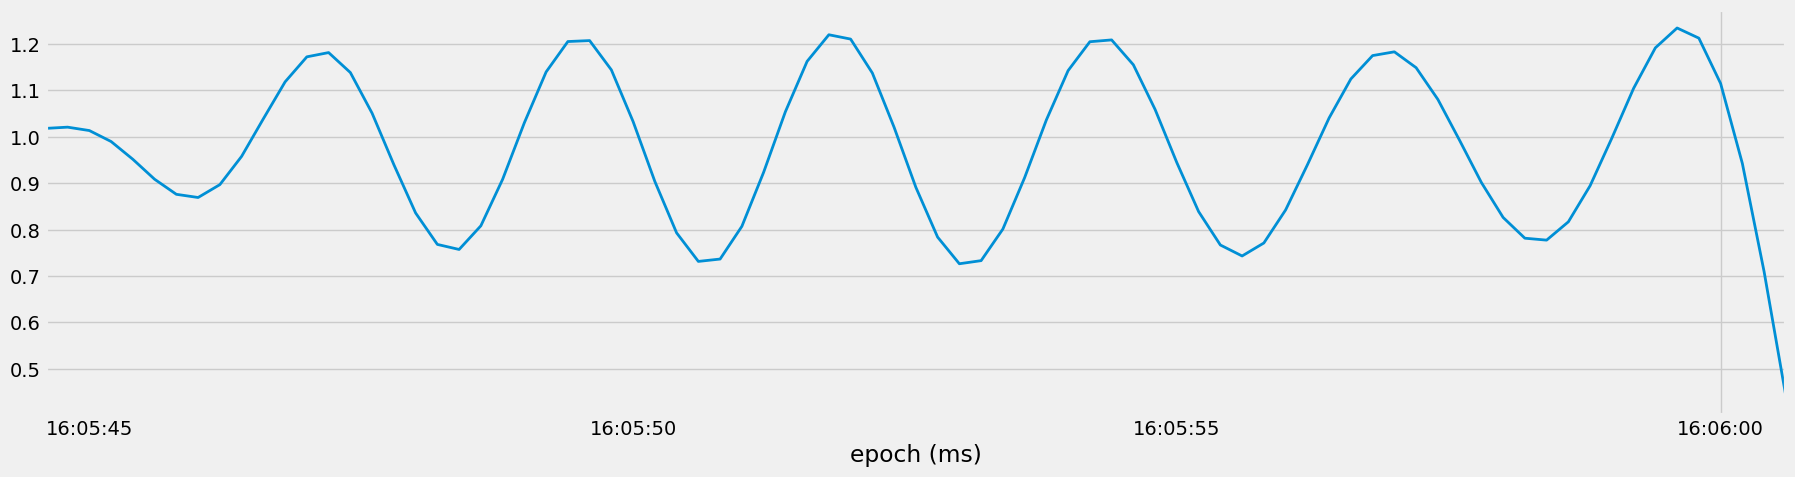

In [ ]:
column = "acc_r"
LowPass.low_pass_filter(
    squat_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

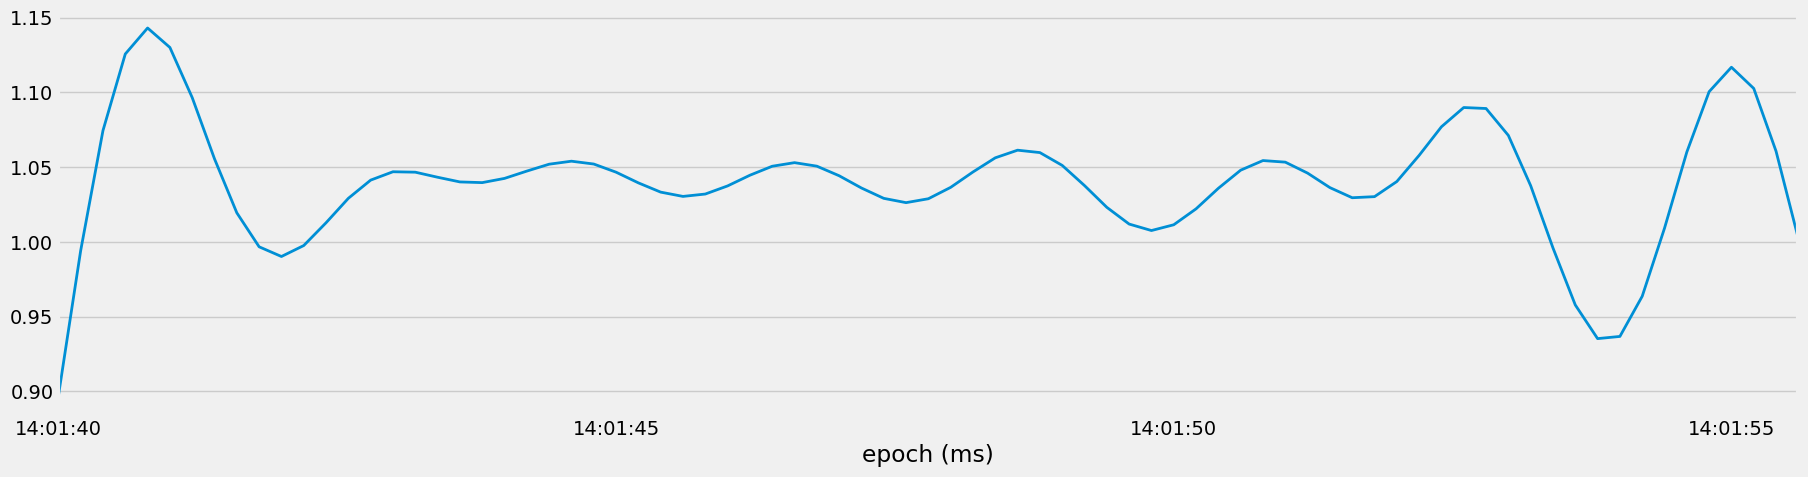

In [ ]:
column = "acc_r"
LowPass.low_pass_filter(
    row_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

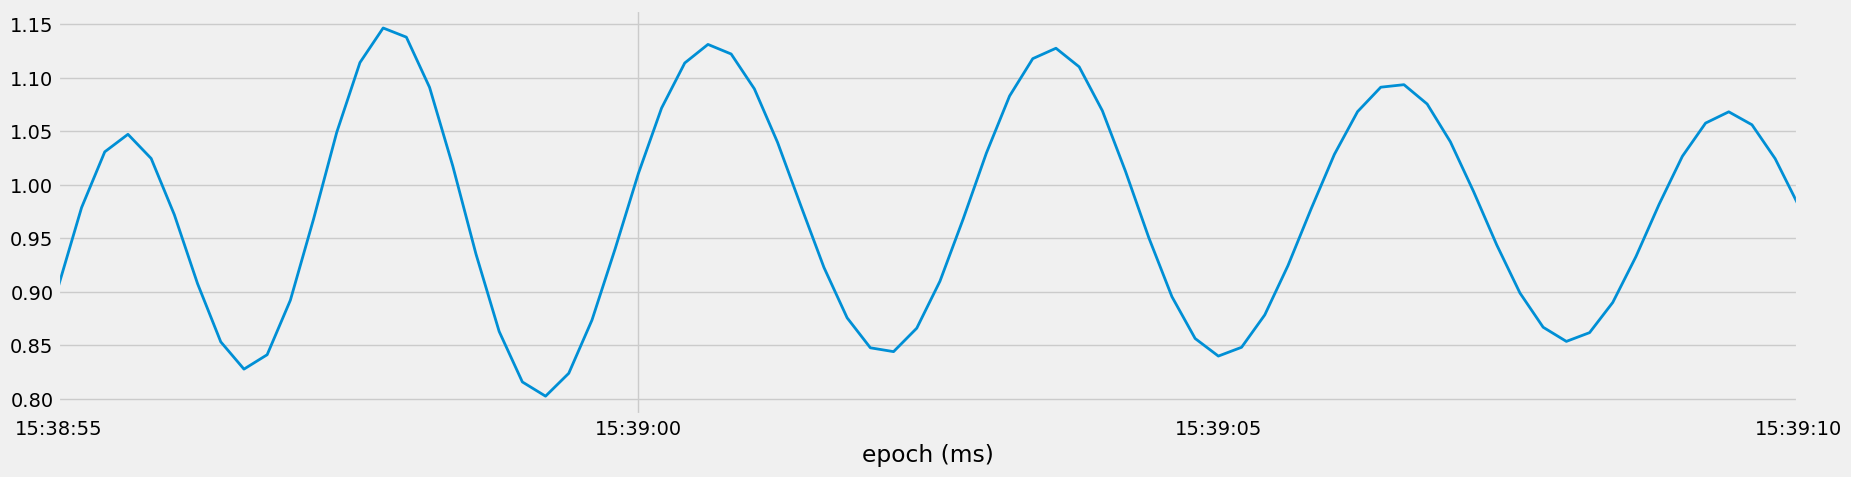

In [ ]:
column = "acc_r"
LowPass.low_pass_filter(
    ohp_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

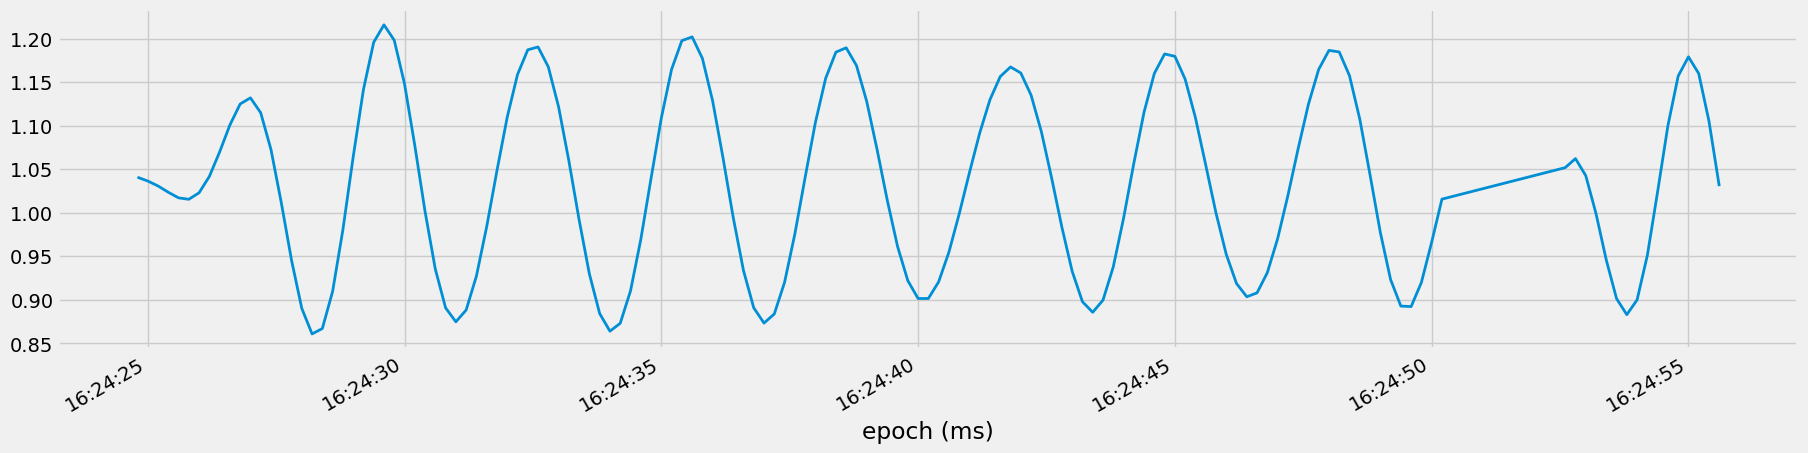

In [ ]:
column = "acc_r"
LowPass.low_pass_filter(
    dead_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

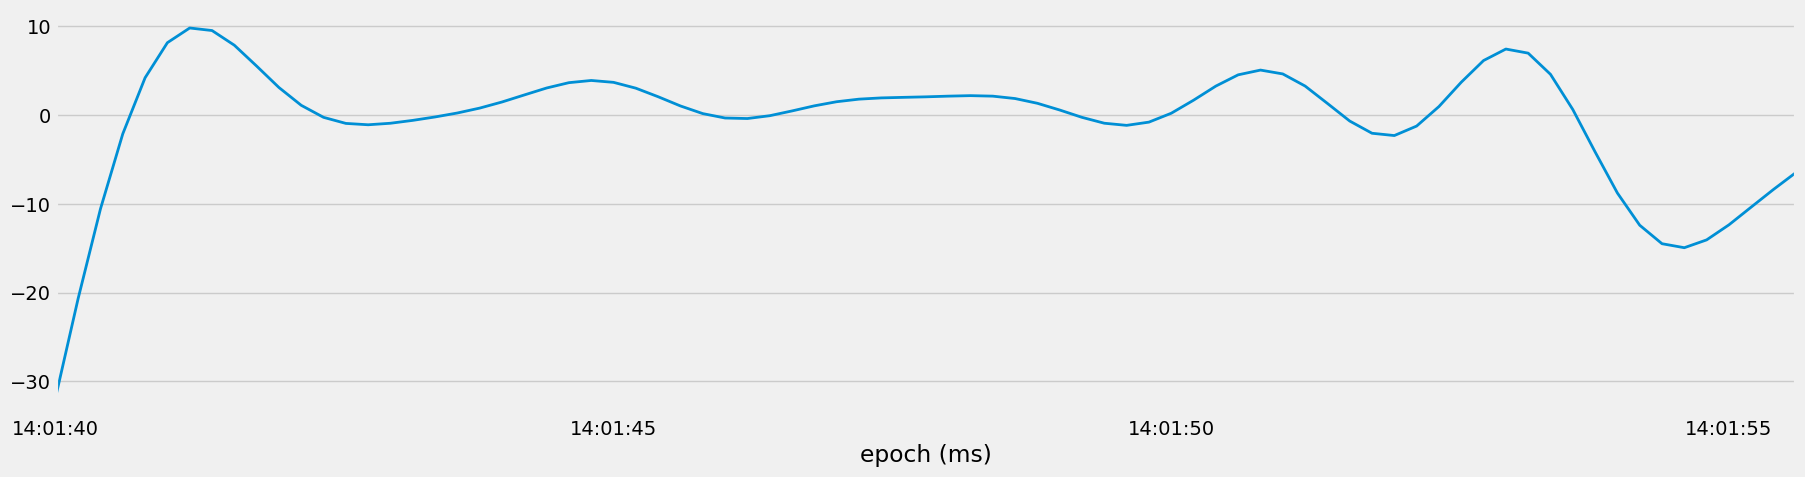

In [ ]:
column = "gyr_x" # for row
LowPass.low_pass_filter(
    row_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


<AxesSubplot: xlabel='epoch (ms)'>

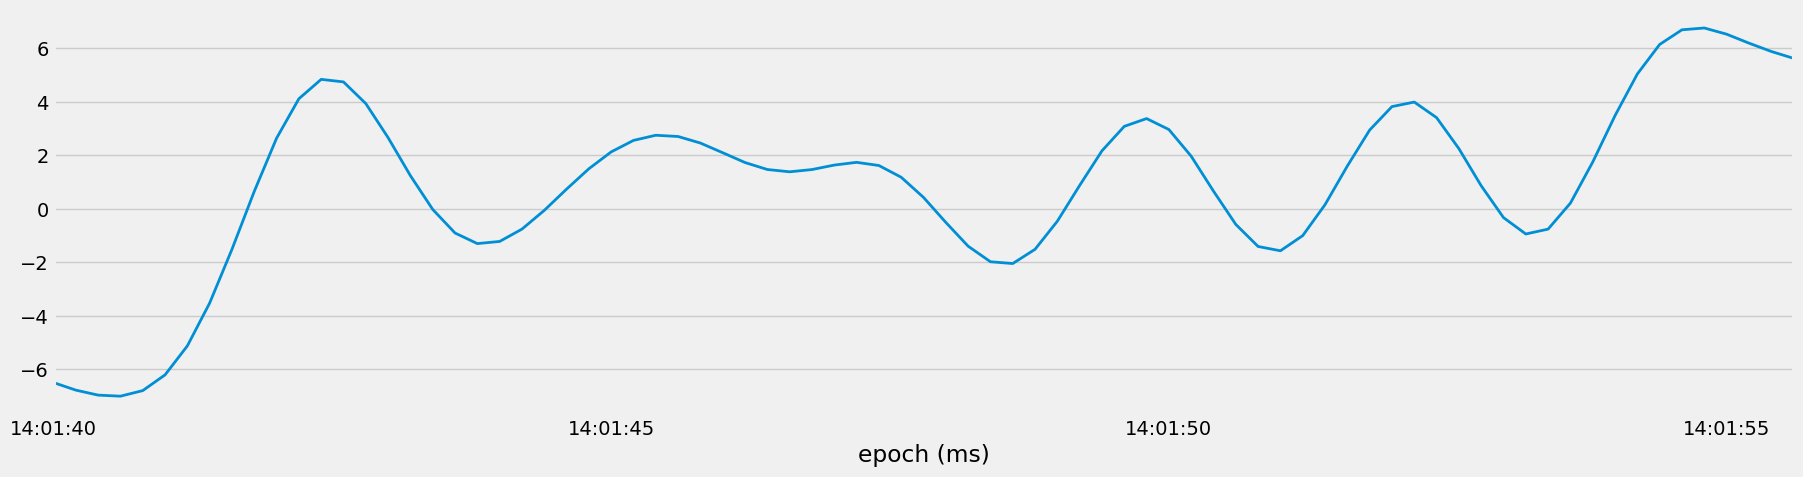

In [ ]:
column = "gyr_z" # for row
LowPass.low_pass_filter(
    row_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)[column+"_lowpass"].plot()

In [ ]:
bench_set["acc_r"]

epoch (ms)
2019-01-11 15:08:05.200    0.979669
2019-01-11 15:08:05.400    0.973752
2019-01-11 15:08:05.600    0.973795
2019-01-11 15:08:05.800    0.960118
2019-01-11 15:08:06.000    0.964953
                             ...   
2019-01-11 15:08:21.200    0.961738
2019-01-11 15:08:21.400    0.982193
2019-01-11 15:08:21.600    0.978938
2019-01-11 15:08:21.800    0.938789
2019-01-11 15:08:22.000    0.985489
Name: acc_r, Length: 85, dtype: float64

In [ ]:
bench_set["acc_r"].values

array([0.97966946, 0.97375189, 0.97379498, 0.96011835, 0.96495308,
       0.97253535, 0.80472991, 0.94894692, 0.95602383, 0.96380561,
       1.4227222 , 1.01563638, 0.95357881, 0.99698909, 1.0261941 ,
       0.76743876, 0.85595184, 1.02702848, 0.95787711, 0.96774726,
       0.99141806, 0.96311136, 0.95030878, 0.77571612, 0.87183689,
       0.9716823 , 0.99780988, 1.58457226, 0.96087119, 0.96173398,
       0.99902013, 1.03182847, 0.89592689, 0.62031484, 1.09224275,
       0.92574538, 0.97632588, 0.97849195, 0.98106122, 0.97003157,
       0.97251615, 0.87653237, 0.79885098, 0.94483888, 0.97176849,
       1.26706728, 1.21233975, 0.88869483, 0.98022055, 0.98659554,
       1.02670076, 1.03818459, 0.79975587, 0.85421221, 0.99526412,
       0.99439492, 0.98414865, 0.948357  , 0.99404644, 0.9572625 ,
       0.98535098, 0.9374376 , 0.76722451, 0.91454155, 0.97920745,
       1.05077126, 1.42335644, 0.8628253 , 0.94820427, 0.97301208,
       1.01644987, 1.06336694, 0.79847396, 0.86533866, 1.01733

In [ ]:
argrelextrema(bench_set["acc_r"].values, np.greater)

(array([ 2,  5, 10, 14, 17, 20, 27, 31, 34, 38, 40, 45, 51, 54, 58, 60, 66,
        71, 74, 77, 79, 81], dtype=int64),)

In [ ]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]

In [ ]:
column = "acc_r"

In [ ]:
data = LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=5
)

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


In [ ]:
data

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200  0.958667 -0.062000 -0.045333  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400  0.979000 -0.060500 -0.051000  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600  0.976000 -0.056667 -0.050333  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800  0.936500 -0.056000 -0.034000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000  0.980333 -0.086000 -0.052333 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012   
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911   
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609   
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949   
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656   

                         acc_r_lowpass  
epoch (ms)                              
2019-01-11 15:08:05.200       0.978693  
2019-01-11 15:08:05.400       0.957044  
2019-01-11 15:08:05.600       0.938474  
2019-01-11 15:08:05.800       0.926091  
2019-01-11 15:08:06.000       0.923252  
...                                ...  
2019-01-11 15:08:21.200       0.980273  
2019-01-11 15:08:21.400       0.977390  
2019-01-11 15:08:21.600       0.976406  
2019-01-11 15:08:21.800       0.978322  
2019-01-11 15:08:22.000       0.982682  

[85 rows x 13 columns]

In [ ]:
data[column+"_lowpass"]

epoch (ms)
2019-01-11 15:08:05.200    0.978693
2019-01-11 15:08:05.400    0.957044
2019-01-11 15:08:05.600    0.938474
2019-01-11 15:08:05.800    0.926091
2019-01-11 15:08:06.000    0.923252
                             ...   
2019-01-11 15:08:21.200    0.980273
2019-01-11 15:08:21.400    0.977390
2019-01-11 15:08:21.600    0.976406
2019-01-11 15:08:21.800    0.978322
2019-01-11 15:08:22.000    0.982682
Name: acc_r_lowpass, Length: 85, dtype: float64

In [ ]:
argrelextrema(data[column+"_lowpass"].values, np.greater)

(array([10, 27, 38, 46, 57, 67, 79], dtype=int64),)

In [ ]:
indexes = argrelextrema(data[column+"_lowpass"].values, np.greater)

In [ ]:
peaks = data.iloc[indexes]

In [ ]:
peaks

acc_y     acc_z     acc_x    gyr_x    gyr_y  \
epoch (ms)                                                                
2019-01-11 15:08:07.200  1.404667 -0.095000 -0.205000  -4.1098  -9.3172   
2019-01-11 15:08:10.600  1.557000 -0.195500 -0.220000  11.3416  -5.0610   
2019-01-11 15:08:12.800  0.979000 -0.048000 -0.041667   2.4026  -1.5976   
2019-01-11 15:08:14.400  1.184667 -0.077333 -0.245667  32.7318   0.8050   
2019-01-11 15:08:16.600  0.948000 -0.001000 -0.026000   9.0242  -0.9880   
2019-01-11 15:08:18.600  0.824500 -0.118500 -0.225000  14.7196 -16.5122   
2019-01-11 15:08:21.000  0.981500 -0.052500 -0.045000  -0.1218  -3.4512   

                           gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                    
2019-01-11 15:08:07.200  -3.3412           B  bench    heavy   30  1.422722   
2019-01-11 15:08:10.600 -12.4998           B  bench    heavy   30  1.584572   
2019-01-11 15:08:12.800  -1.1708           B  bench    heavy   30  0.981061   
2019-01-11 15:08:14.400 -10.5852           B  bench    heavy   30  1.212340   
2019-01-11 15:08:16.600  -2.0610           B  bench    heavy   30  0.948357   
2019-01-11 15:08:18.600 -11.0732           B  bench    heavy   30  0.862825   
2019-01-11 15:08:21.000   1.8660           B  bench    heavy   30  0.983933   

                             gyr_r  acc_r_lowpass  
epoch (ms)                                         
2019-01-11 15:08:07.200  10.717476       1.056296  
2019-01-11 15:08:10.600  17.620744       1.083572  
2019-01-11 15:08:12.800   3.113773       0.948329  
2019-01-11 15:08:14.400  34.410249       1.057946  
2019-01-11 15:08:16.600   9.309138       0.967317  
2019-01-11 15:08:18.600  24.737323       1.050276  
2019-01-11 15:08:21.000   3.925248       0.982763

In [ ]:
column = "acc_r"

In [ ]:
data = LowPass.low_pass_filter(
    bench_set, col=column, sampling_frequency=fs, cutoff_frequency=0.5, order=10
)

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


In [ ]:
data

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200  0.958667 -0.062000 -0.045333  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400  0.979000 -0.060500 -0.051000  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600  0.976000 -0.056667 -0.050333  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800  0.936500 -0.056000 -0.034000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000  0.980333 -0.086000 -0.052333 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012   
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911   
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609   
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949   
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656   

                         acc_r_lowpass  
epoch (ms)                              
2019-01-11 15:08:05.200       0.978744  
2019-01-11 15:08:05.400       0.947491  
2019-01-11 15:08:05.600       0.924156  
2019-01-11 15:08:05.800       0.914047  
2019-01-11 15:08:06.000       0.919241  
...                                ...  
2019-01-11 15:08:21.200       0.984176  
2019-01-11 15:08:21.400       0.980458  
2019-01-11 15:08:21.600       0.978191  
2019-01-11 15:08:21.800       0.978792  
2019-01-11 15:08:22.000       0.981954  

[85 rows x 13 columns]

In [ ]:
argrelextrema(data[column+"_lowpass"].values, np.greater)

(array([10, 27, 38, 46, 57, 67, 79], dtype=int64),)

In [ ]:
indexes = argrelextrema(data[column+"_lowpass"].values, np.greater)

In [ ]:
peaks = data.iloc[indexes]

In [ ]:
peaks

acc_y     acc_z     acc_x    gyr_x    gyr_y  \
epoch (ms)                                                                
2019-01-11 15:08:07.200  1.404667 -0.095000 -0.205000  -4.1098  -9.3172   
2019-01-11 15:08:10.600  1.557000 -0.195500 -0.220000  11.3416  -5.0610   
2019-01-11 15:08:12.800  0.979000 -0.048000 -0.041667   2.4026  -1.5976   
2019-01-11 15:08:14.400  1.184667 -0.077333 -0.245667  32.7318   0.8050   
2019-01-11 15:08:16.600  0.948000 -0.001000 -0.026000   9.0242  -0.9880   
2019-01-11 15:08:18.600  0.824500 -0.118500 -0.225000  14.7196 -16.5122   
2019-01-11 15:08:21.000  0.981500 -0.052500 -0.045000  -0.1218  -3.4512   

                           gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                    
2019-01-11 15:08:07.200  -3.3412           B  bench    heavy   30  1.422722   
2019-01-11 15:08:10.600 -12.4998           B  bench    heavy   30  1.584572   
2019-01-11 15:08:12.800  -1.1708           B  bench    heavy   30  0.981061   
2019-01-11 15:08:14.400 -10.5852           B  bench    heavy   30  1.212340   
2019-01-11 15:08:16.600  -2.0610           B  bench    heavy   30  0.948357   
2019-01-11 15:08:18.600 -11.0732           B  bench    heavy   30  0.862825   
2019-01-11 15:08:21.000   1.8660           B  bench    heavy   30  0.983933   

                             gyr_r  acc_r_lowpass  
epoch (ms)                                         
2019-01-11 15:08:07.200  10.717476       1.045692  
2019-01-11 15:08:10.600  17.620744       1.074945  
2019-01-11 15:08:12.800   3.113773       0.941493  
2019-01-11 15:08:14.400  34.410249       1.052903  
2019-01-11 15:08:16.600   9.309138       0.966224  
2019-01-11 15:08:18.600  24.737323       1.050361  
2019-01-11 15:08:21.000   3.925248       0.986541

In [ ]:
def count_reps(dataset, cutoff=0.4, order=10, column="acc_r"):
    
    data = LowPass.low_pass_filter(
        dataset, col=column, sampling_frequency=fs, cutoff_frequency=cutoff, order=order
    )

    indexes = argrelextrema(data[column+"_lowpass"].values, np.greater)
    peaks = data.iloc[indexes]
    
    return len(peaks)

In [ ]:
count_reps(squat_set)

d:\Projects\Fitness Tracker\src\features\DataTransformation.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + "_lowpass"] = filtfilt(b, a, data_table[col])


6

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
count_reps(squat_set)

6

In [ ]:
def count_reps(dataset, cutoff=0.4, order=10, column="acc_r"):
    
    data = LowPass.low_pass_filter(
        dataset, col=column, sampling_frequency=fs, cutoff_frequency=cutoff, order=order
    )

    indexes = argrelextrema(data[column+"_lowpass"].values, np.greater)
    peaks = data.iloc[indexes]
    
    fig, ax =plt.subplots()
    plt.plot(dataset[f"{column}_lowpass"])
    plt.plot(peaks[f"{column}_lowpass"], "o", color="red")
    ax.set_ylabel(f"{column}_lowpass")
    exercise = dataset["label"].iloc[0].title()
    category = dataset["category"].iloc[0].title()
    plt.title(f"{category} {exercise}: {len(peaks)} Reps")
    plt.show()
        
    return len(peaks)

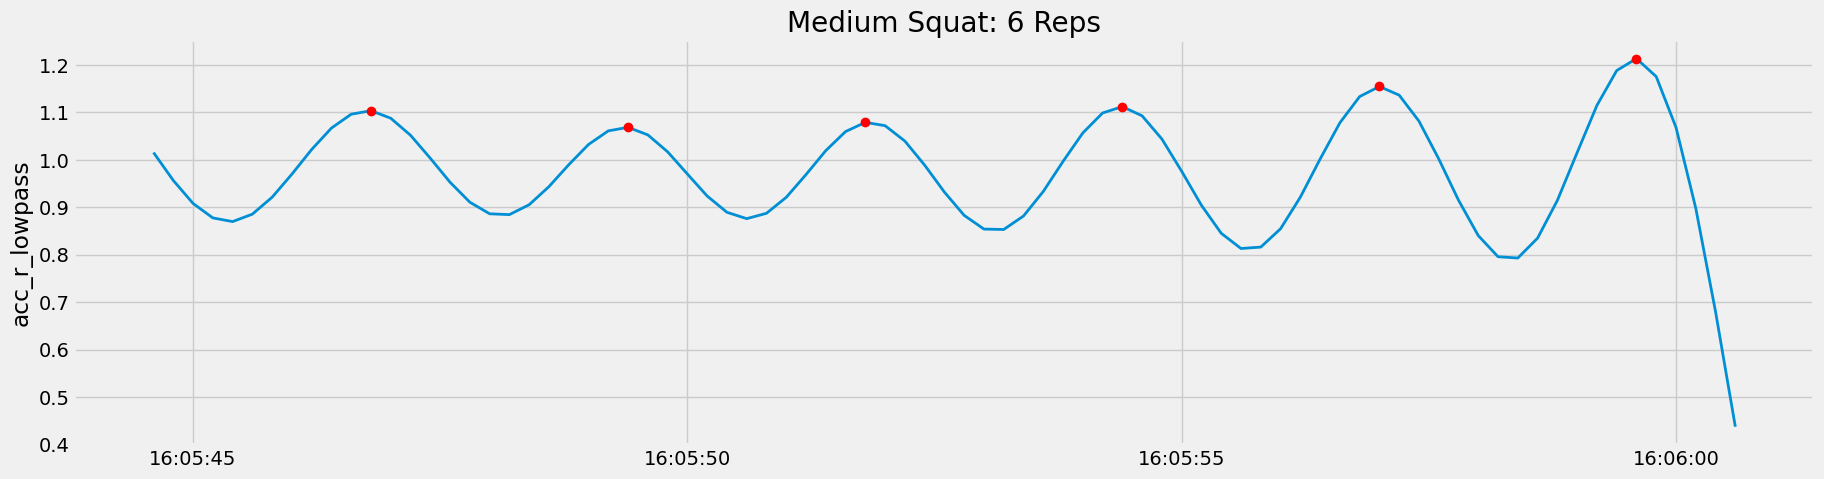

6

In [ ]:
count_reps(squat_set)

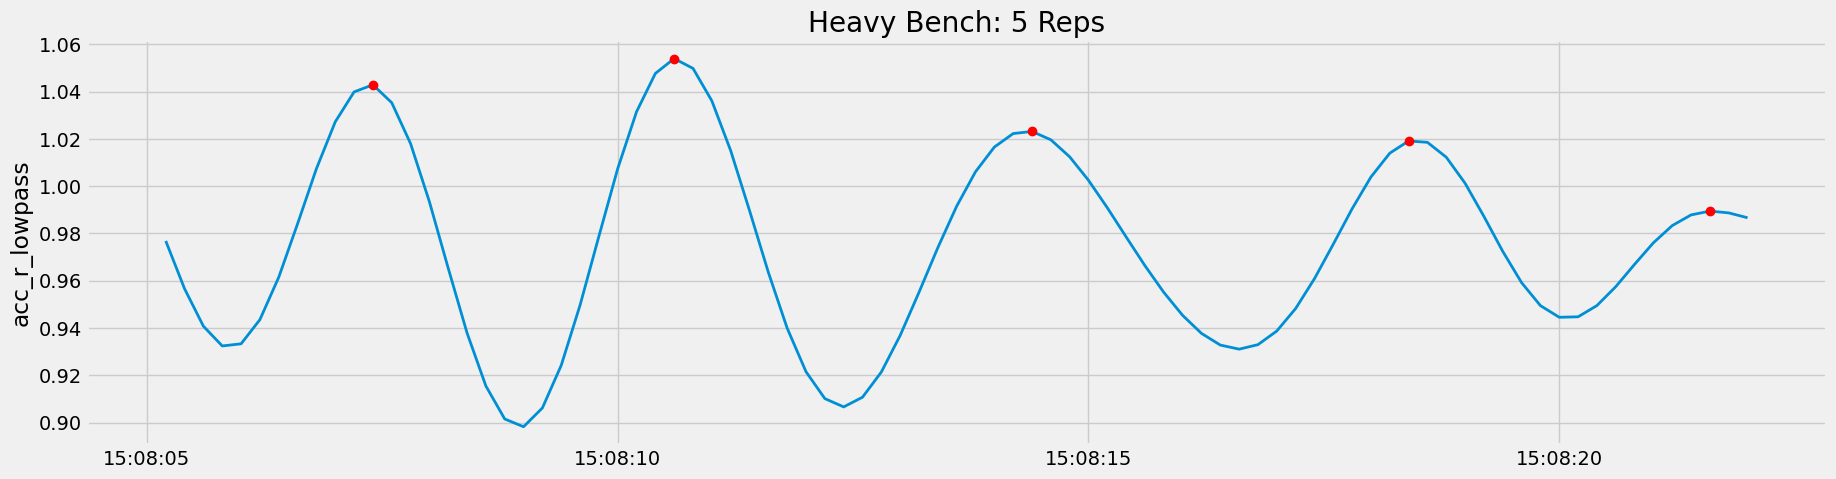

5

In [ ]:
count_reps(bench_set)

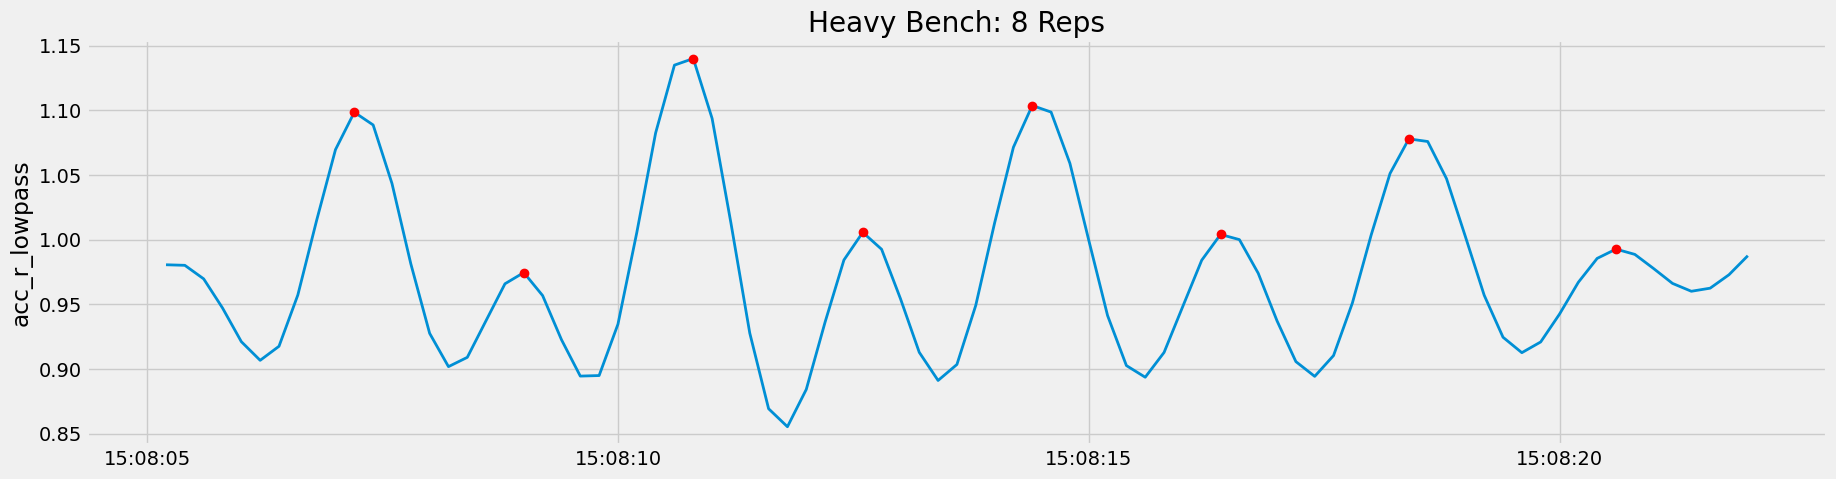

8

In [ ]:
count_reps(bench_set, cutoff=0.6)

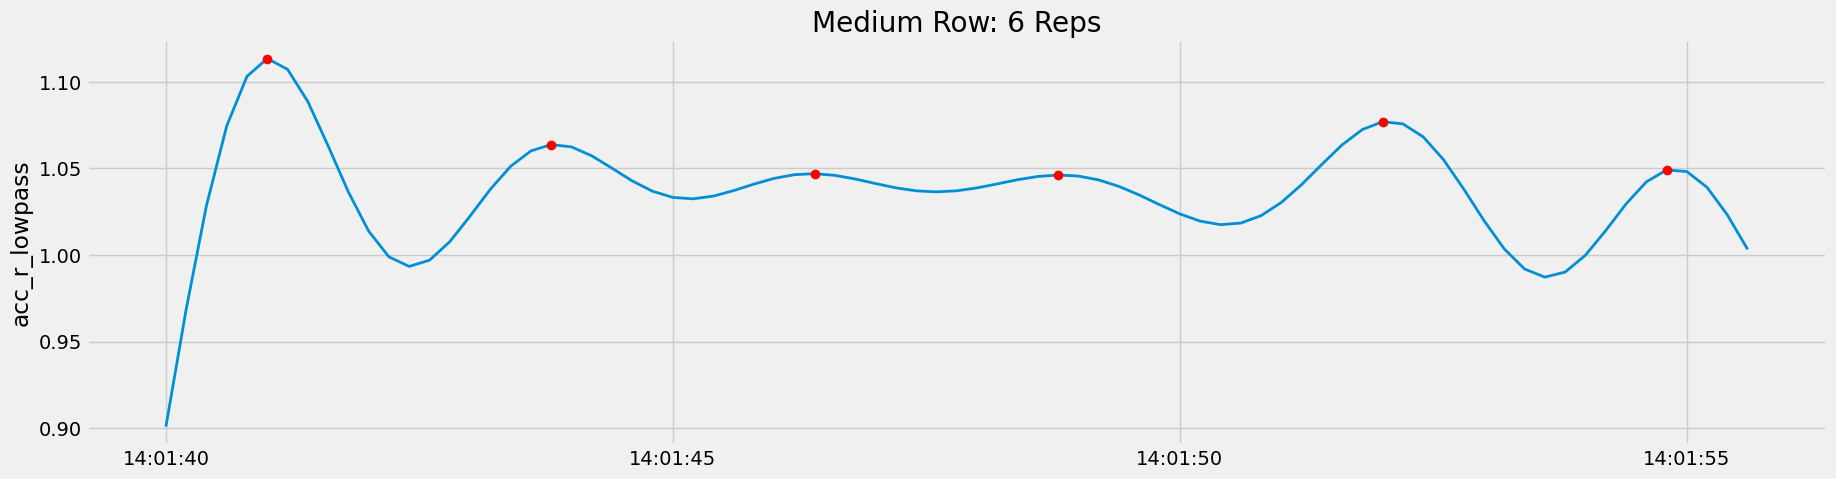

6

In [ ]:
count_reps(row_set)

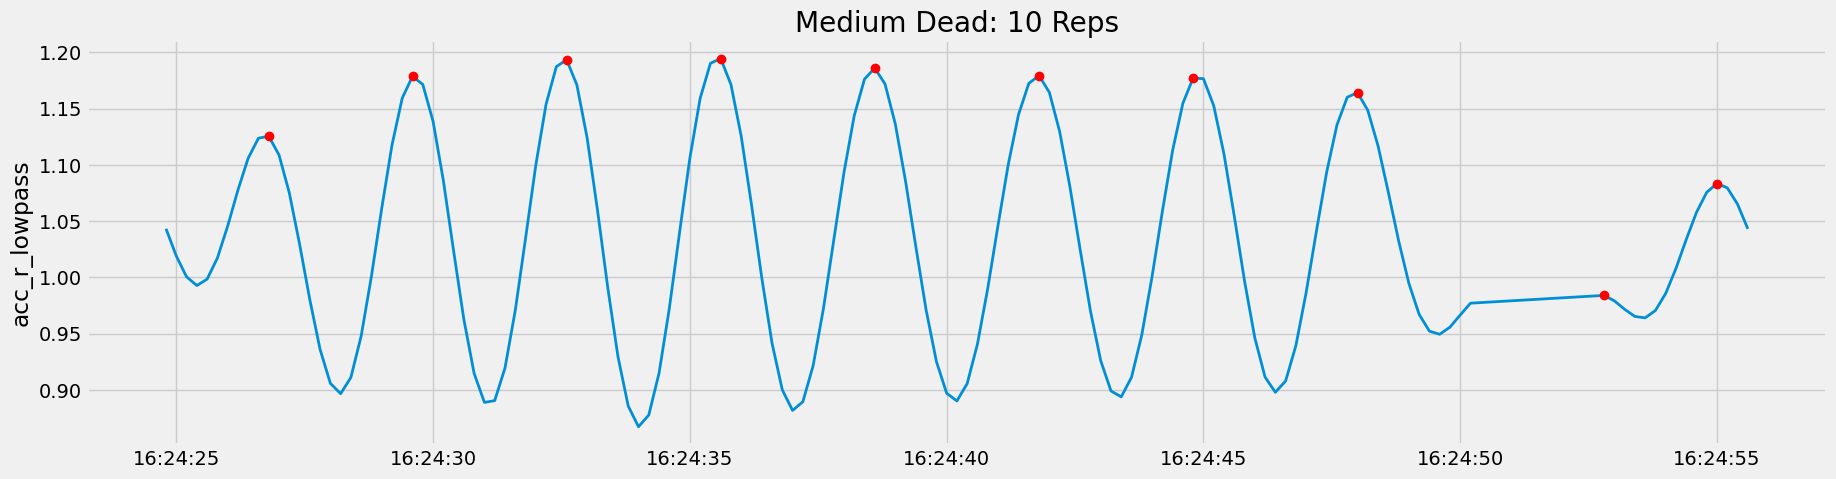

10

In [ ]:
count_reps(dead_set)

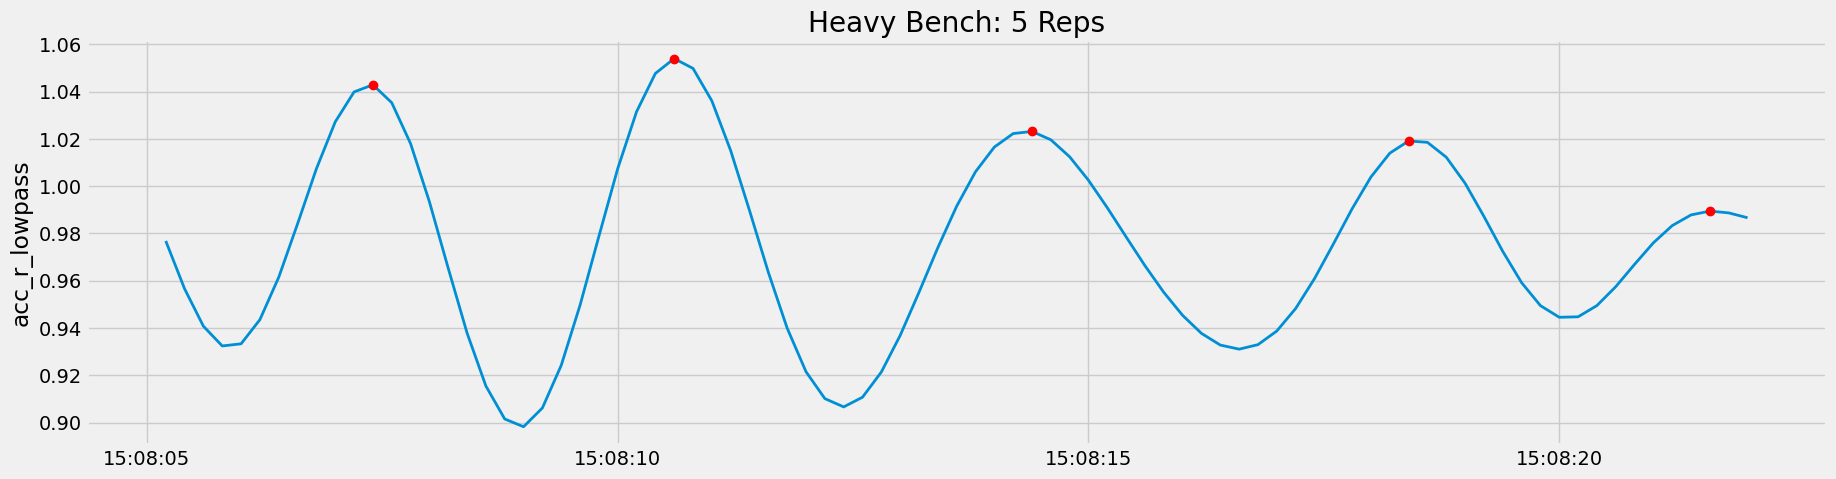

5

In [ ]:
count_reps(bench_set, cutoff=0.4)

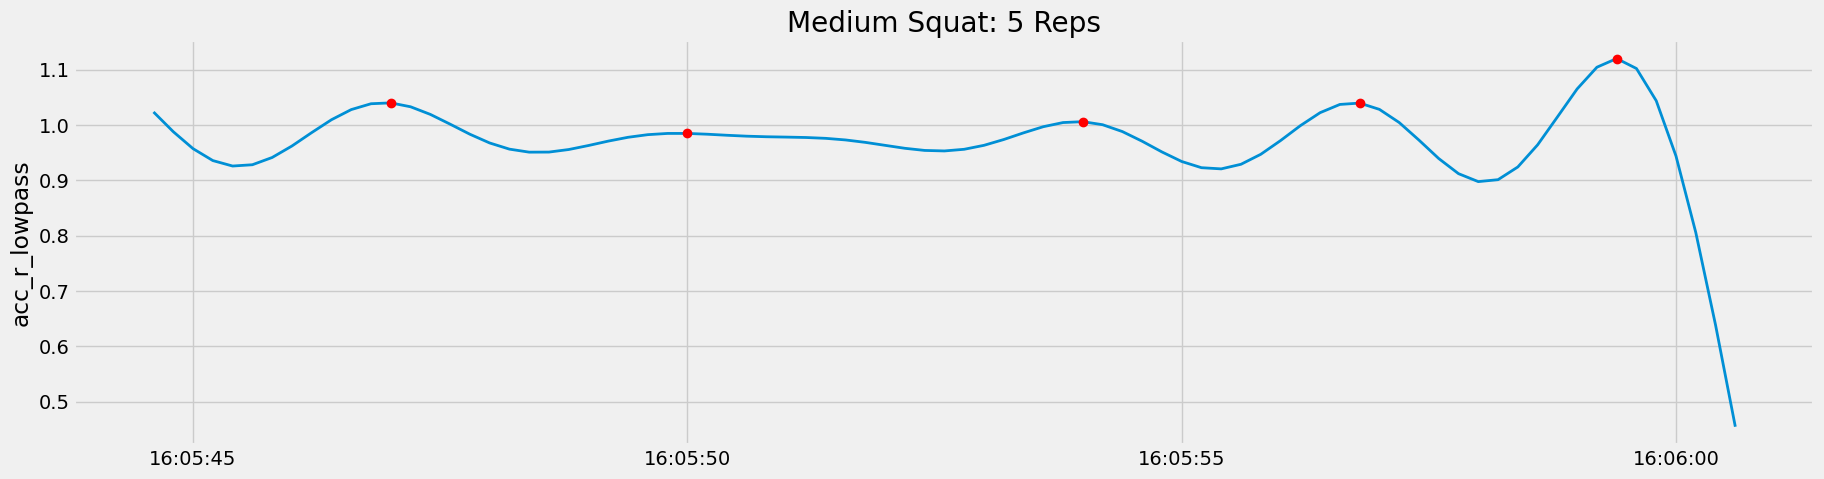

5

In [ ]:
count_reps(squat_set, cutoff=0.35)

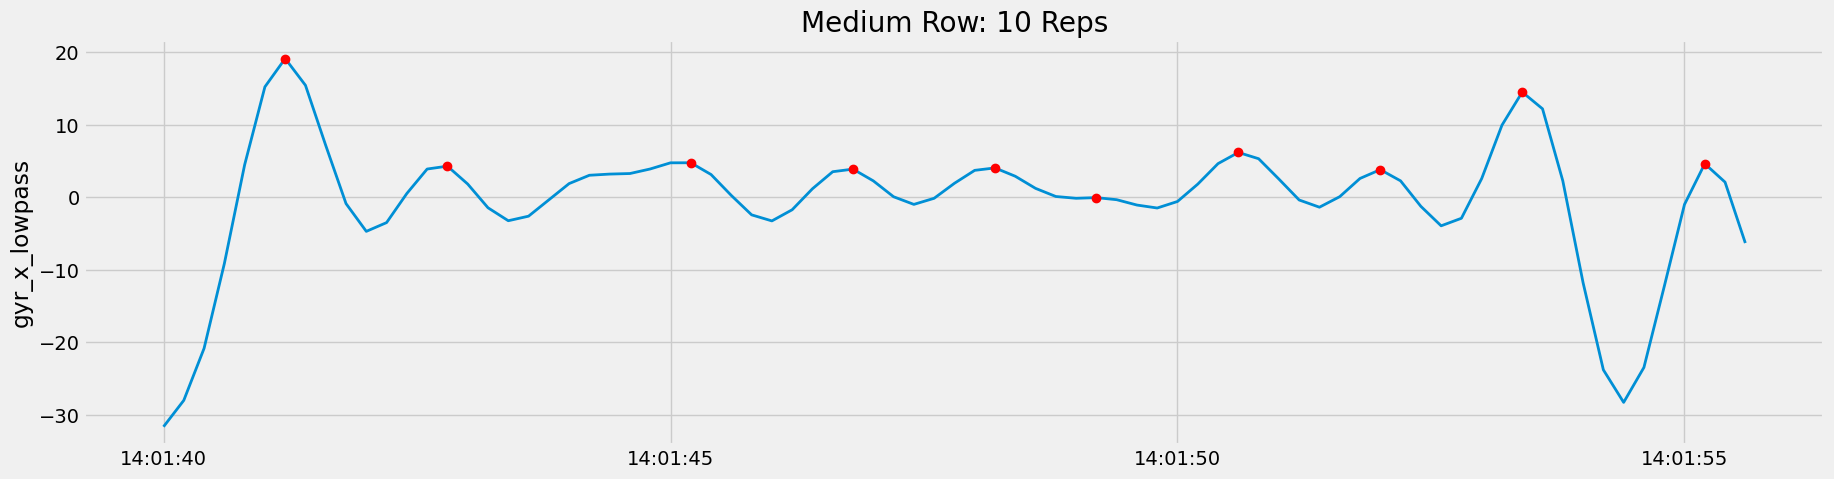

10

In [ ]:
count_reps(row_set, cutoff=0.65, column="gyr_x")

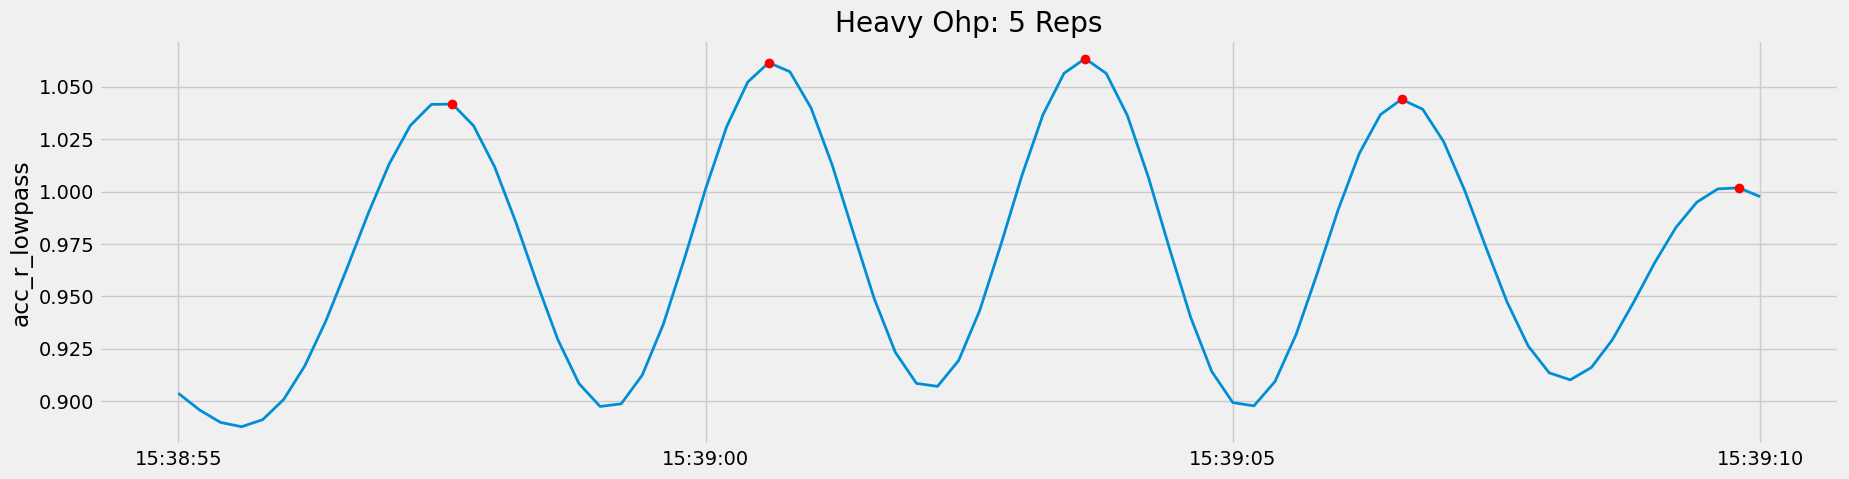

5

In [ ]:
count_reps(ohp_set, cutoff=0.35)

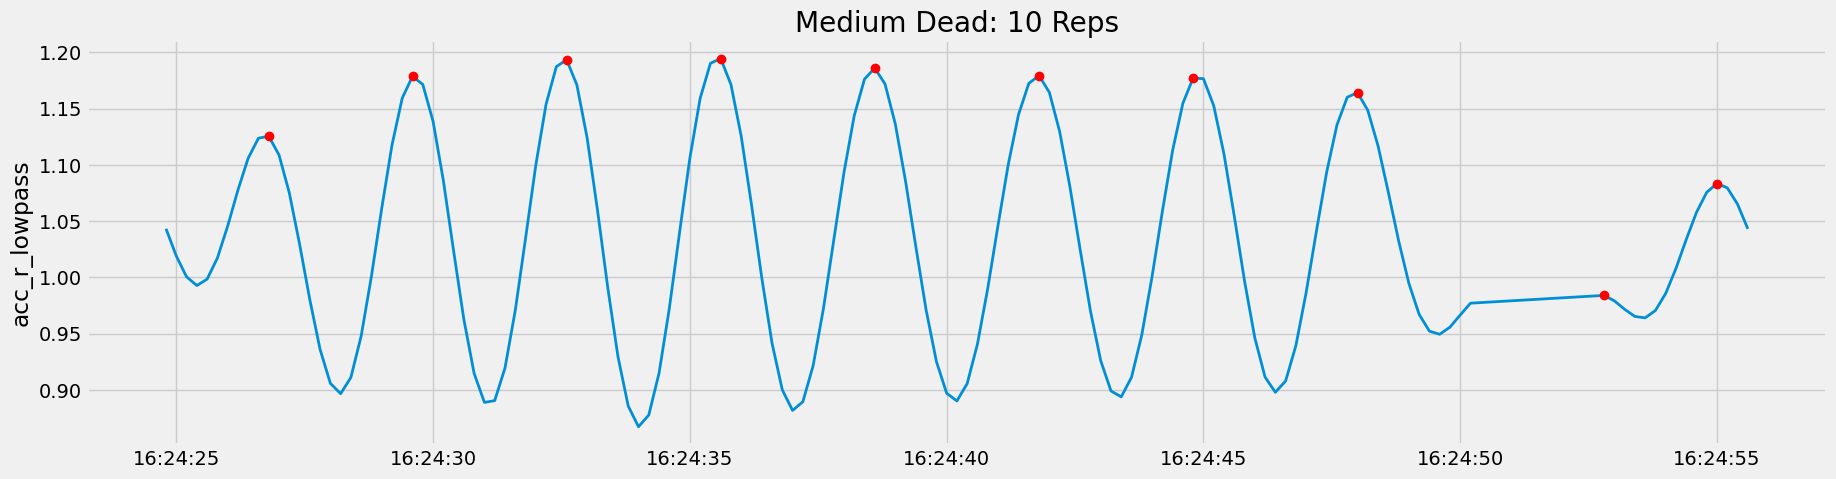

10

In [ ]:
count_reps(dead_set, cutoff=0.4)

In [ ]:
df

acc_y     acc_z     acc_x   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.977000 -0.071000  0.013500 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400  0.970500 -0.079500 -0.001500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.971667 -0.064333  0.001333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800  0.957000 -0.073500 -0.024000  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000  0.957667 -0.115000 -0.028000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -1.041500 -0.076500 -0.048000  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -1.030333 -0.053333 -0.037000 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -1.031000 -0.082000 -0.060000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -1.025667 -0.044667 -0.038667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -1.034000 -0.059000 -0.044000  1.0980 -4.0240  0.9760   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625  
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270  
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720  
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502  
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585  
...                             ...    ...      ...  ...       ...       ...  
2019-01-20 17:33:27.000           E    row   medium   90  1.045408  5.804424  
2019-01-20 17:33:27.200           E    row   medium   90  1.032376  3.611408  
2019-01-20 17:33:27.400           E    row   medium   90  1.035995  5.869377  
2019-01-20 17:33:27.600           E    row   medium   90  1.027367  1.173990  
2019-01-20 17:33:27.800           E    row   medium   90  1.036616  4.283778  

[7899 rows x 12 columns]